In [1]:
import numpy as np, pandas as pd, csv, matplotlib.pyplot as plt, os, re
from numpy import sin
import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy as sci, csv, seaborn as sns
from numpy import exp, pi, sinc, sin, tan, convolve, square, abs, arcsin, arctan, sqrt, cos, shape, array, mean,exp
from scipy.signal import unit_impulse as dirac, find_peaks
period='holder'
directory = '/kaggle/input/measured-diffraction'
test_files = [os.path.join(directory, file) for file in os.listdir(directory)]
test_file = test_files[3]


In [2]:
directory = '/kaggle/input/6um-orpheus/20240206 (copy)'
files = os.listdir(directory)
files = [x for x in files if 'time_13_' in x or 'time_14_' in x]
trans_files = []
reflx_files = []
for file in files:
    pattern = r'um_angle.*?inc'
    matches = re.findall(pattern, file)
    reflx_files.append(file) if abs(int(matches[0][8:-3])) < 90 else trans_files.append(file)

_order-3_


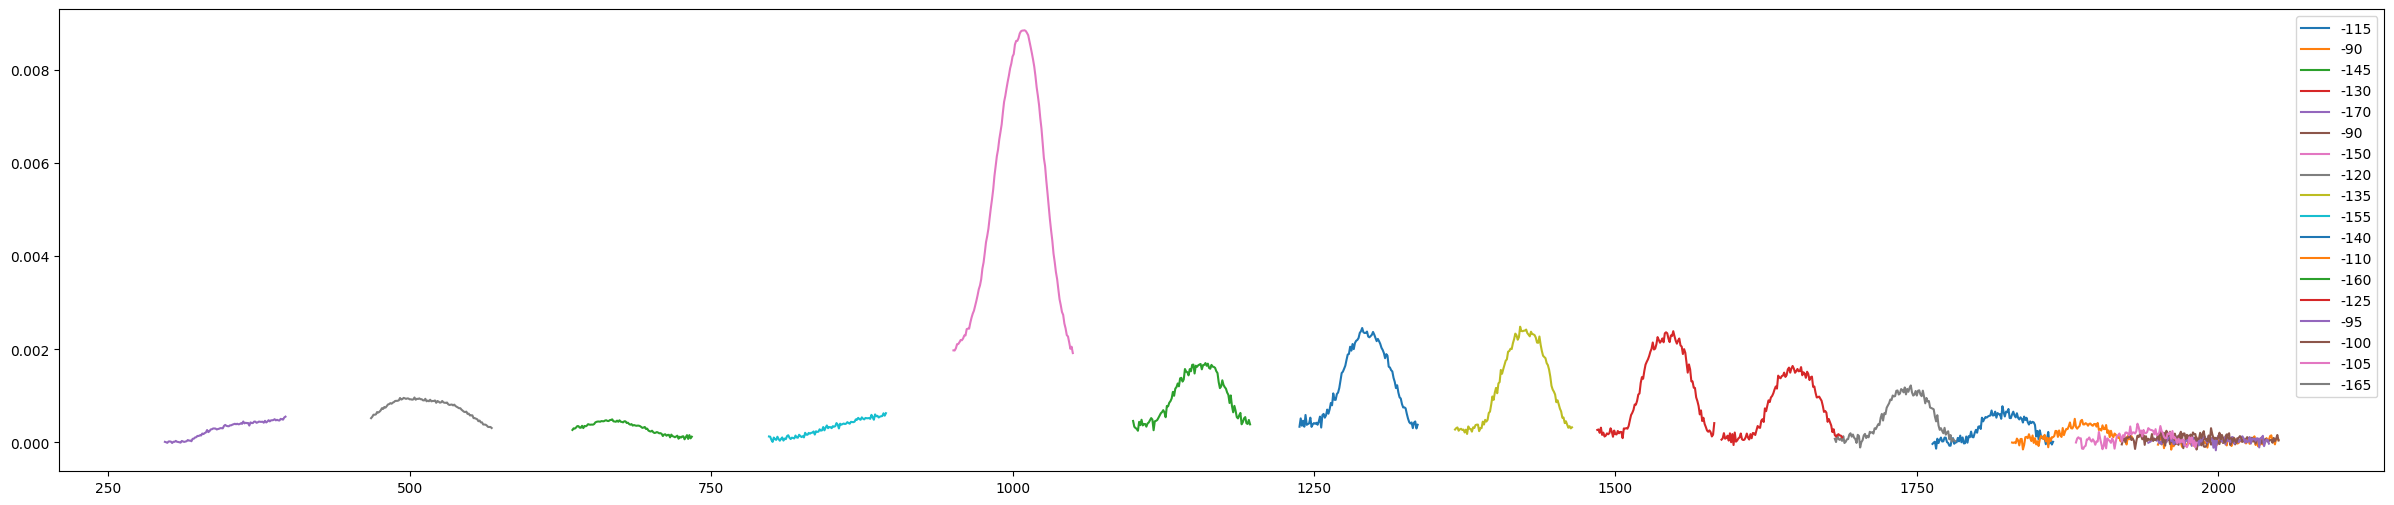

_order-2_


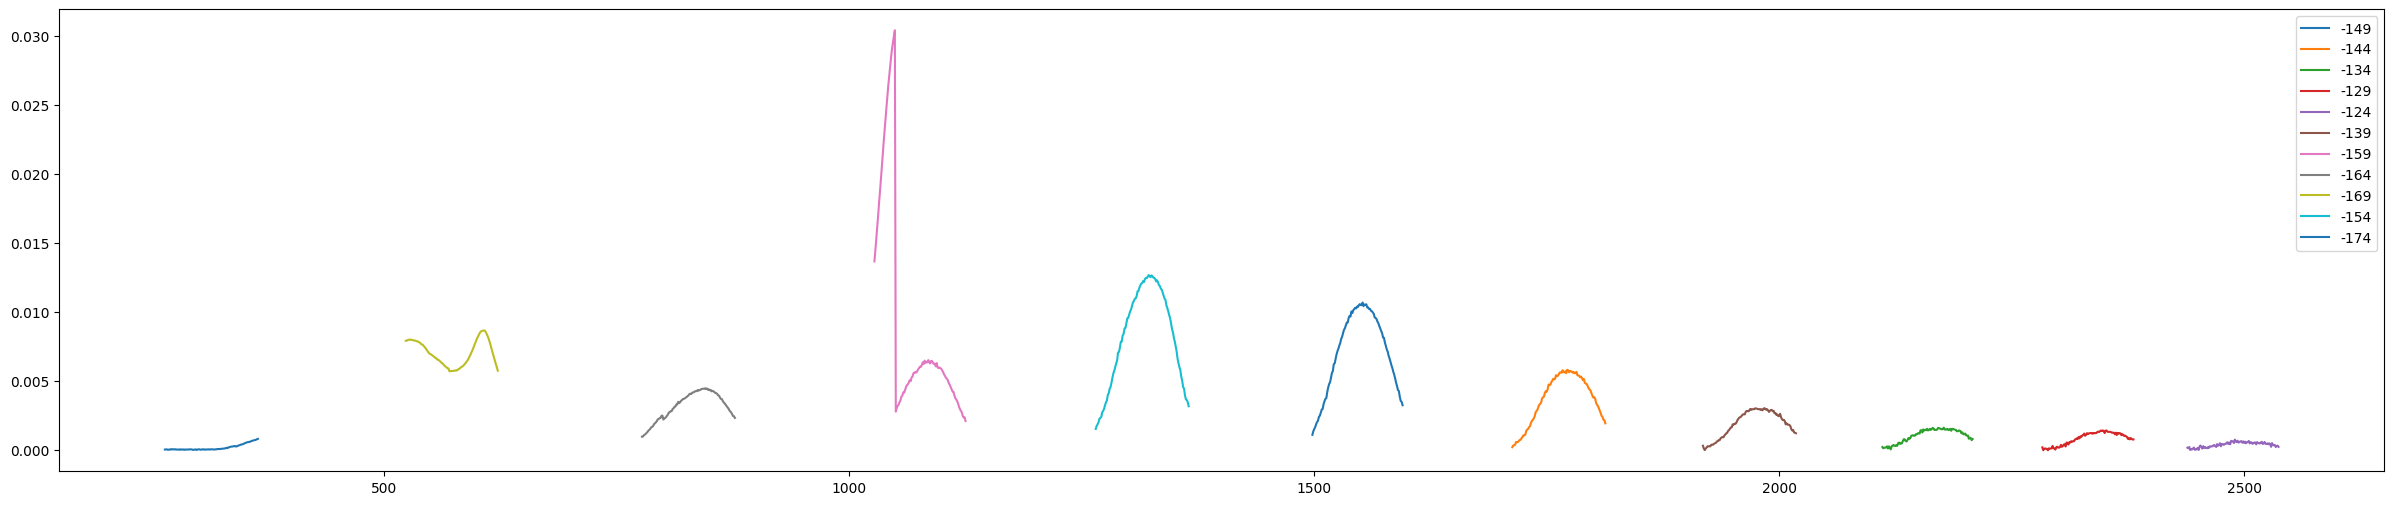

_order-1_


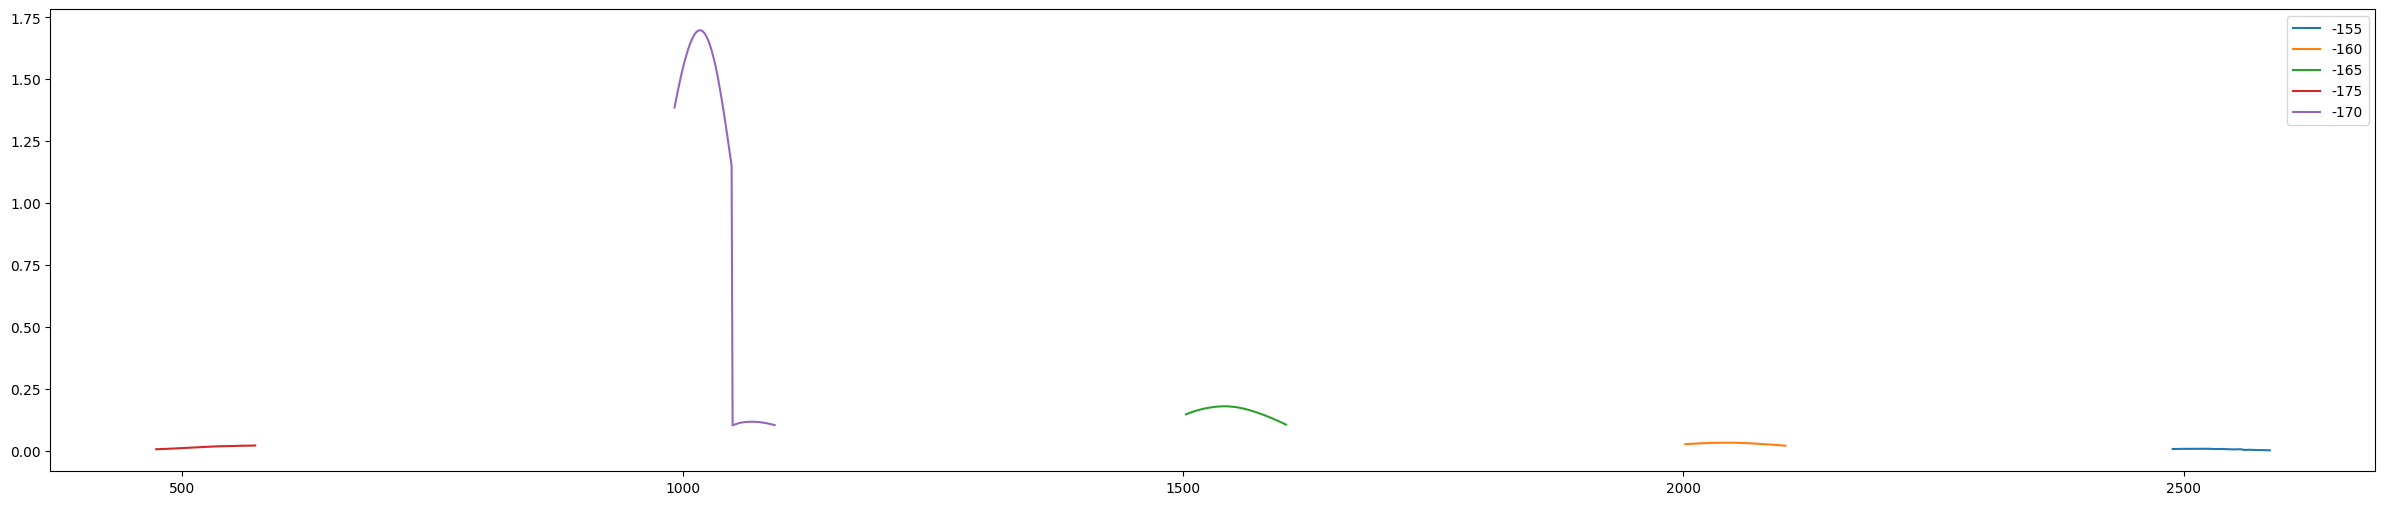

_order0_


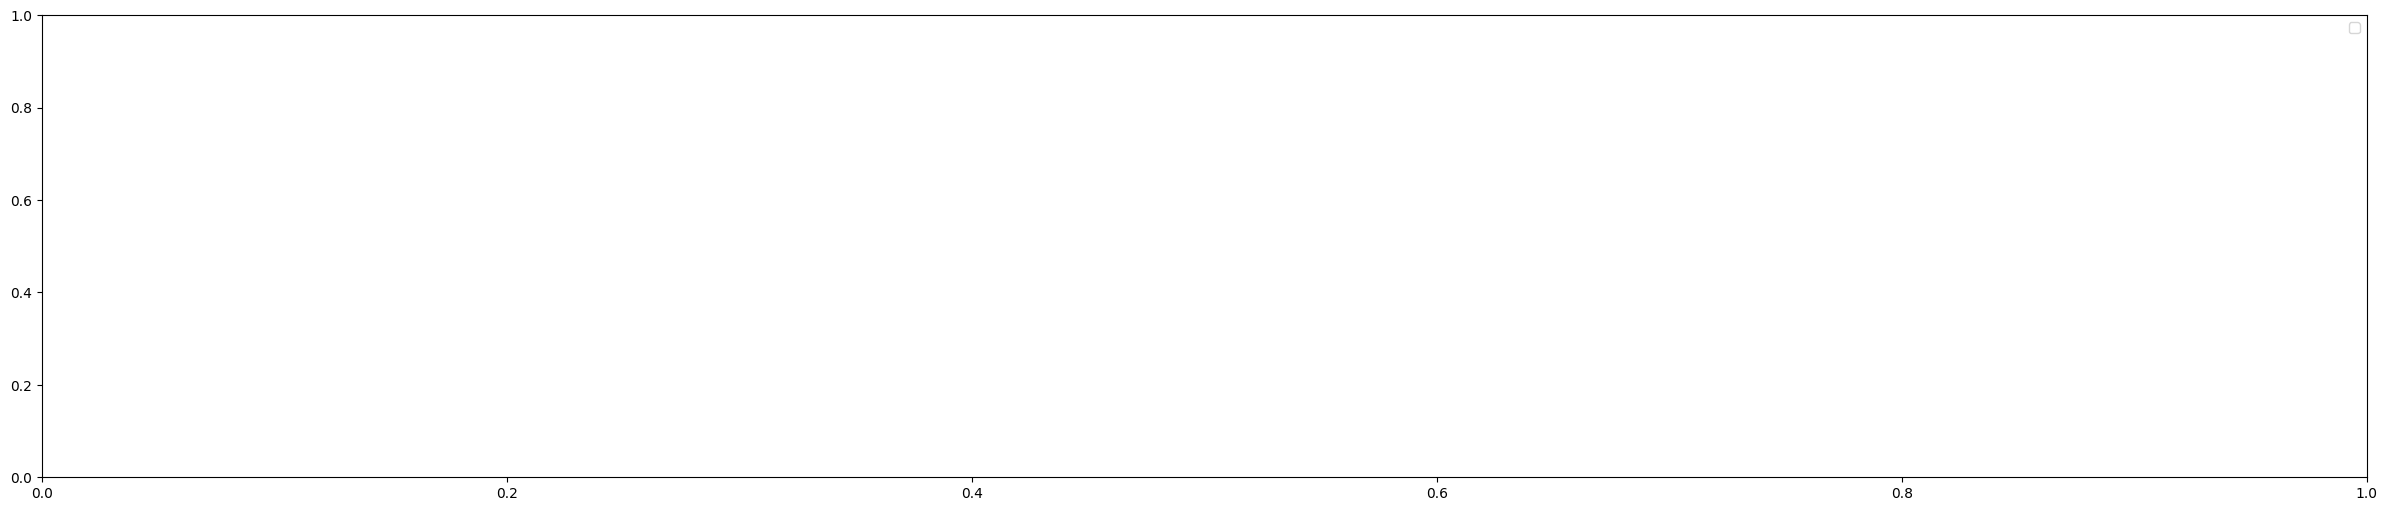

_order1_


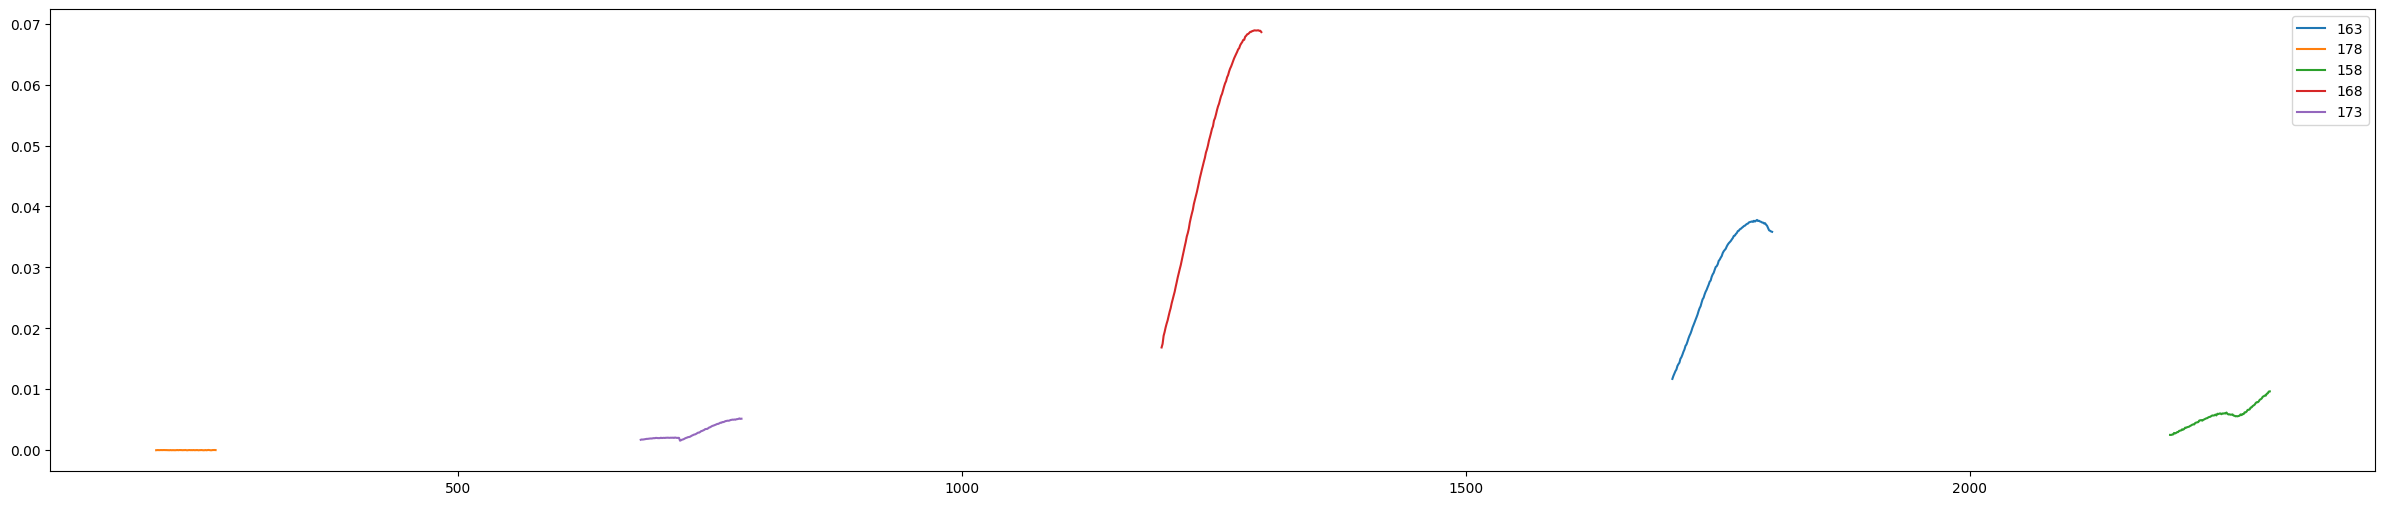

_order2_


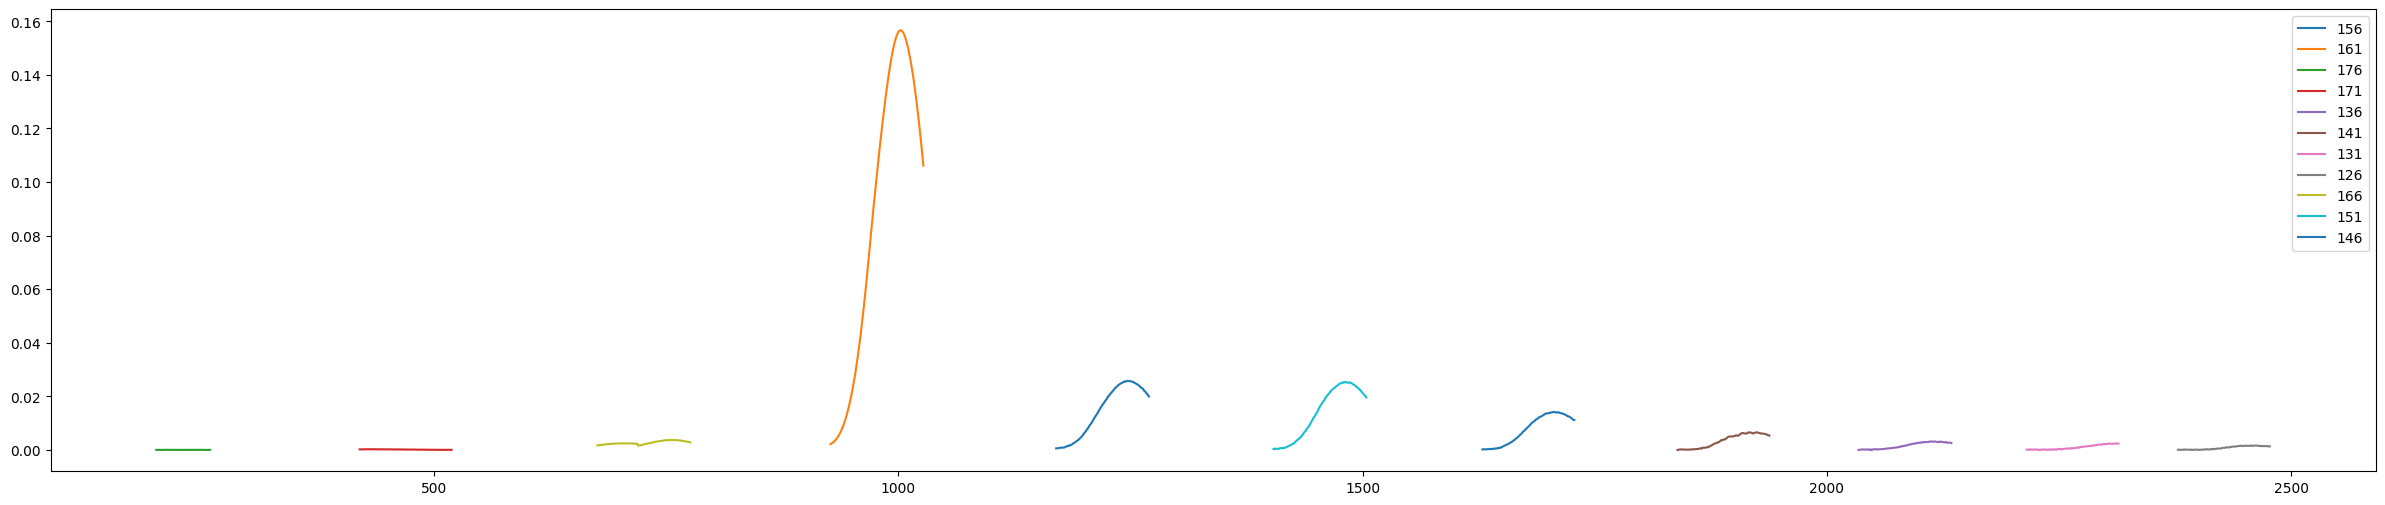

_order3_


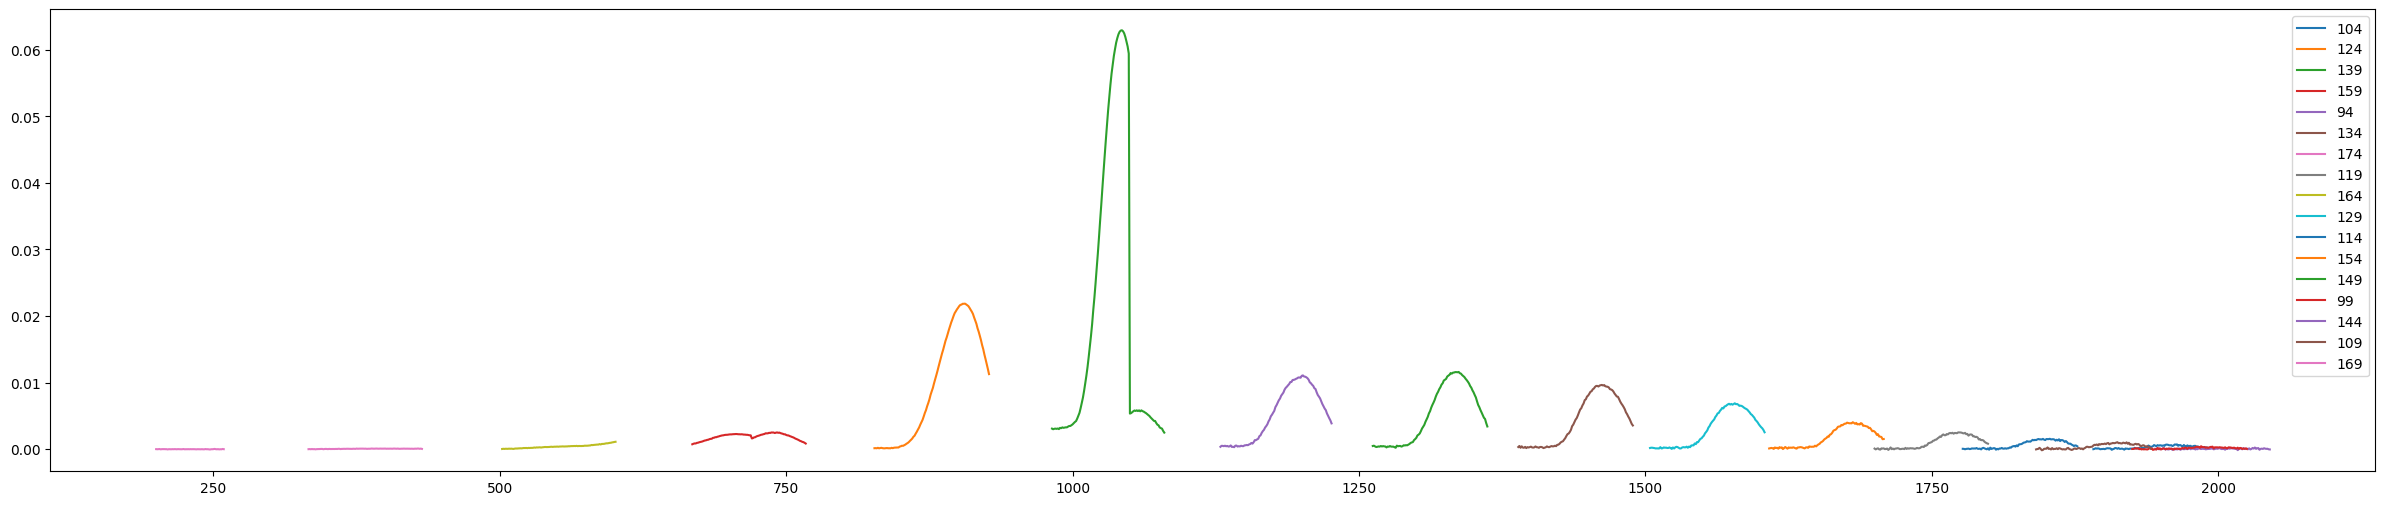

In [3]:
for m in range(-3,4):
    print('_order'+str(m)+'_')
    order_files = [x for x in trans_files if '_order'+str(m)+'_' in x]
    plt.figure(figsize=(30,6))
    for file in order_files:
        pattern = r'um_angle.*?inc'
        angle = re.findall(pattern, file)[0][8:-3]
        curve = pd.read_csv(os.path.join(directory,file), header = 1)
        column = curve.iloc[:, 1]
        sep_index = column[column.isnull()].index[0]
        curve = curve.iloc[:sep_index]
        curve = curve.drop(['Unnamed: 2'], axis = 1)
        plt.plot(pd.to_numeric(curve.iloc[:, 0]), pd.to_numeric(curve.iloc[:, 1]), label = angle)
    plt.legend()
    plt.show()

_order-3_


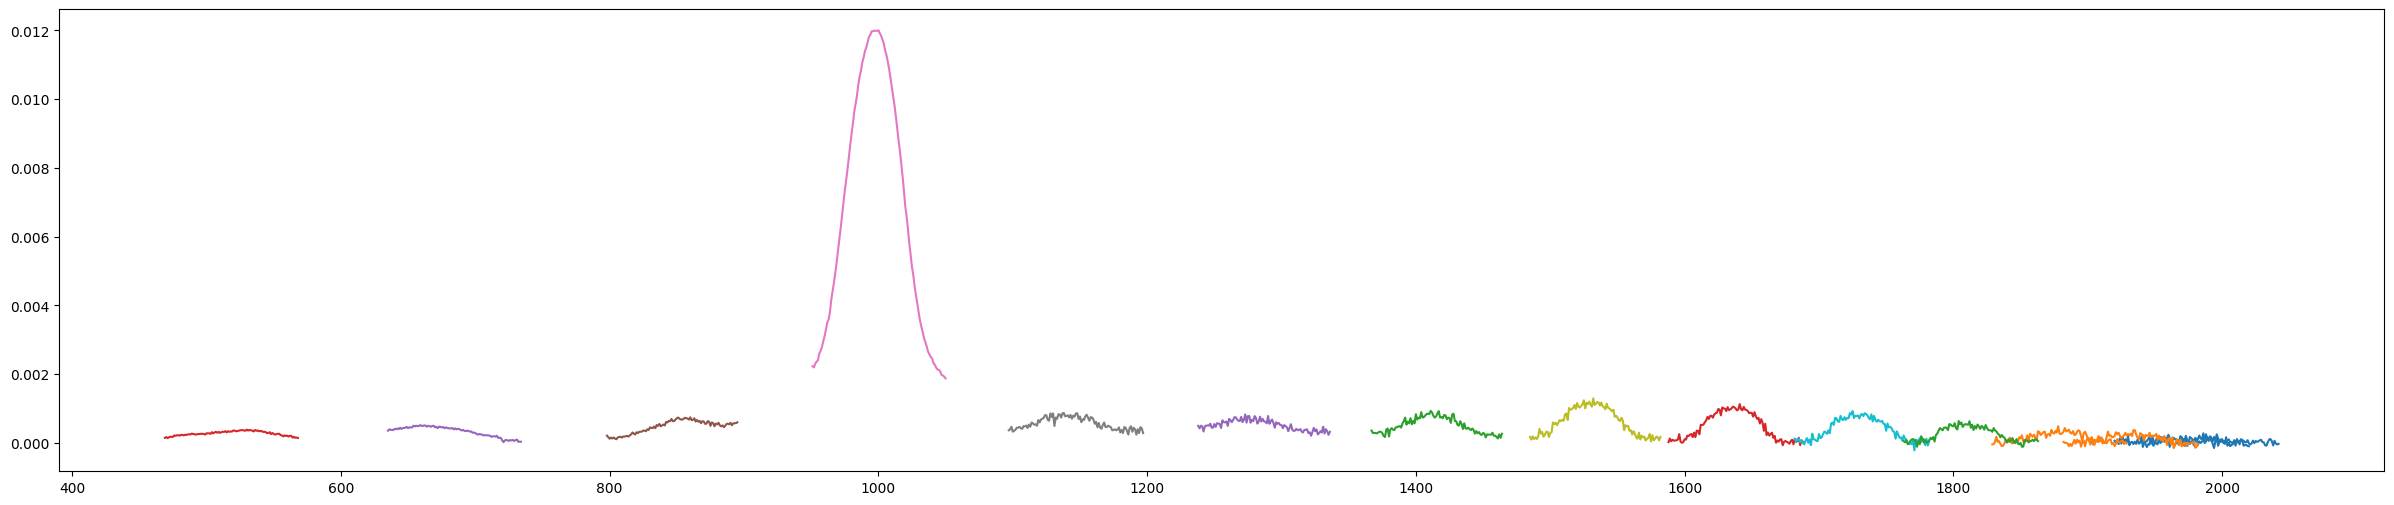

_order-2_


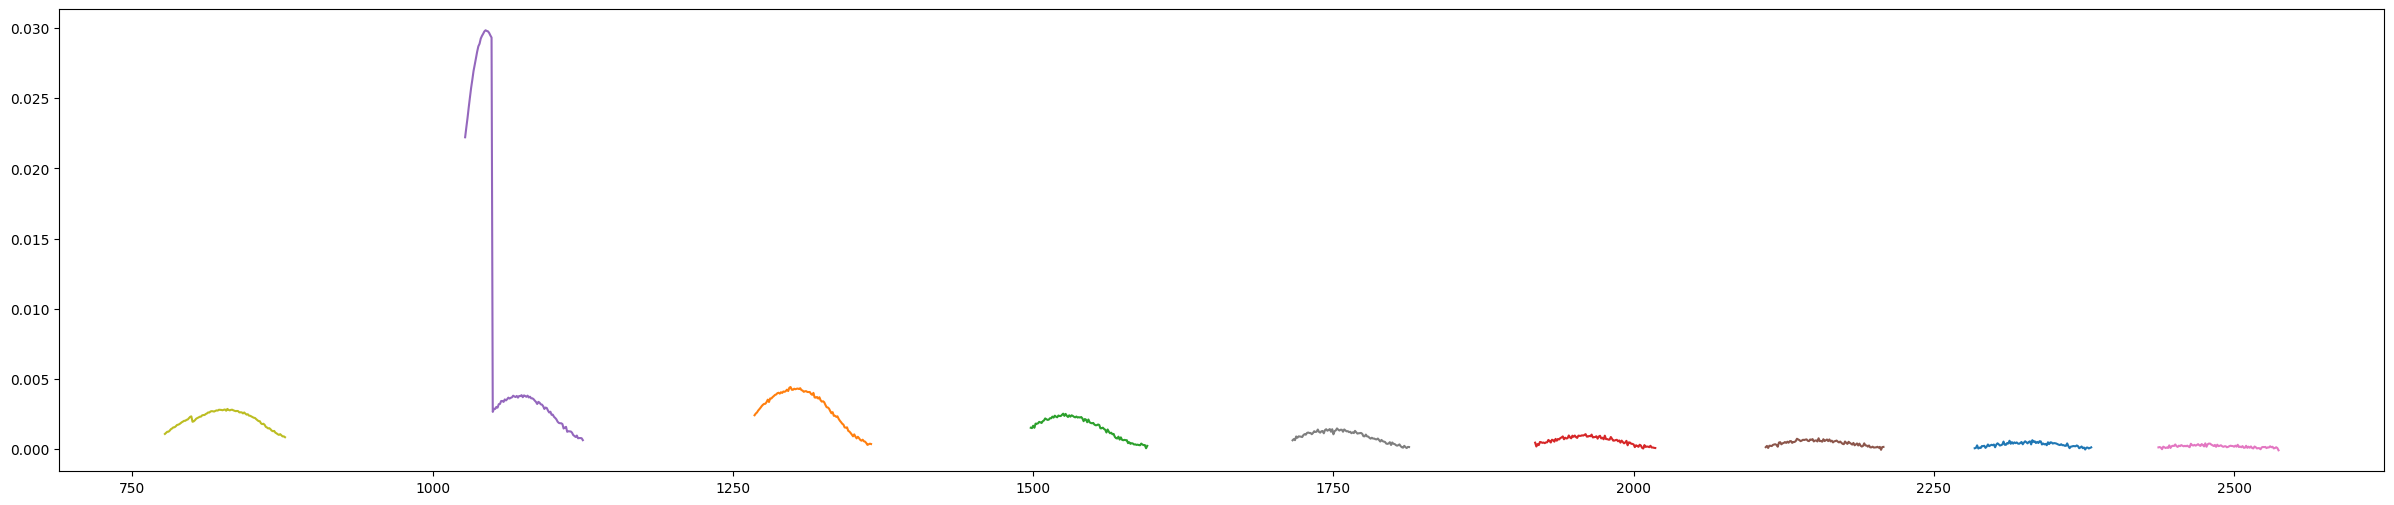

_order-1_


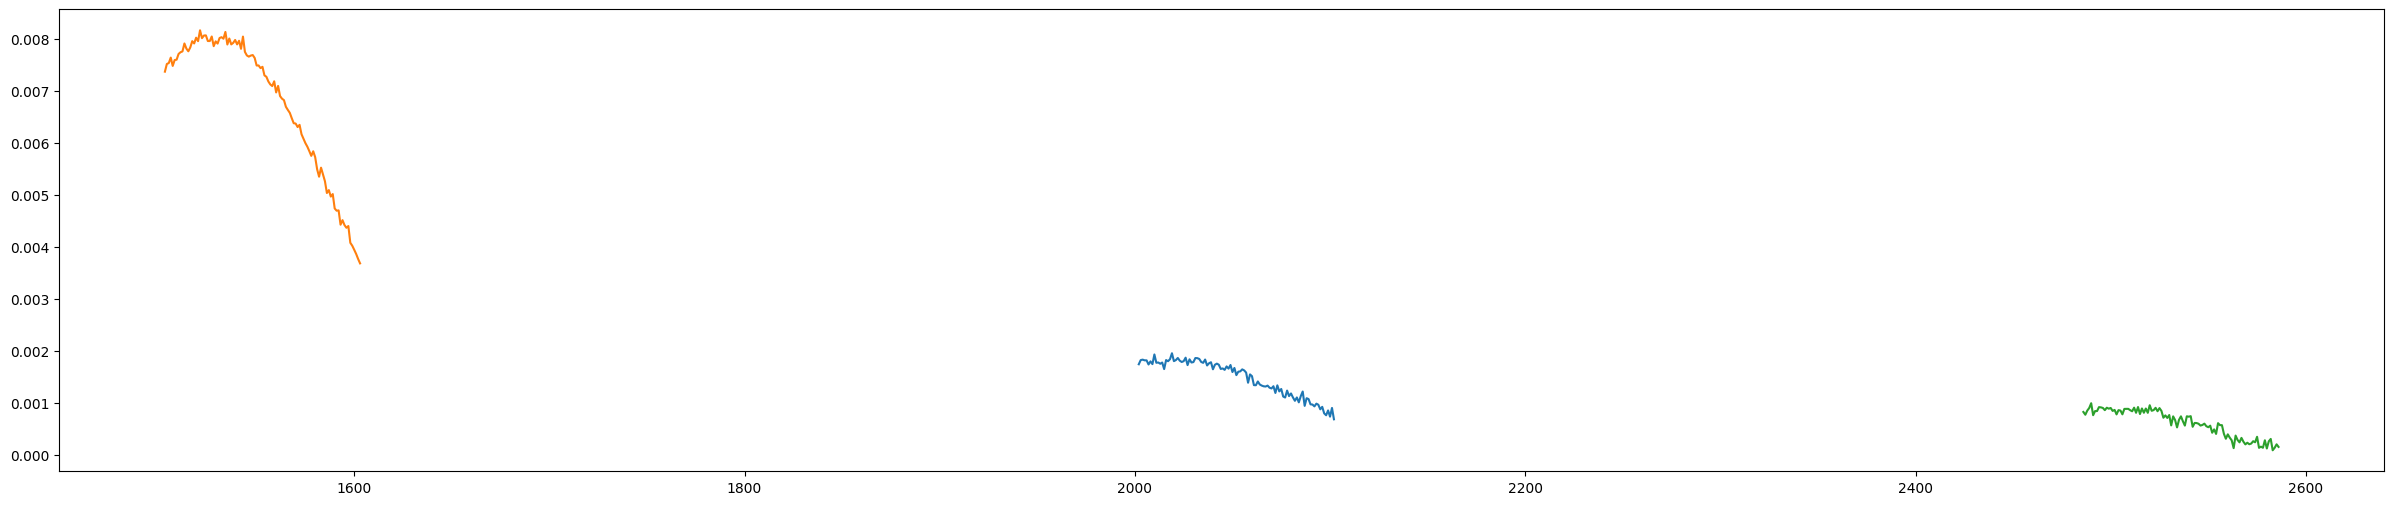

_order0_


<Figure size 3000x600 with 0 Axes>

_order1_


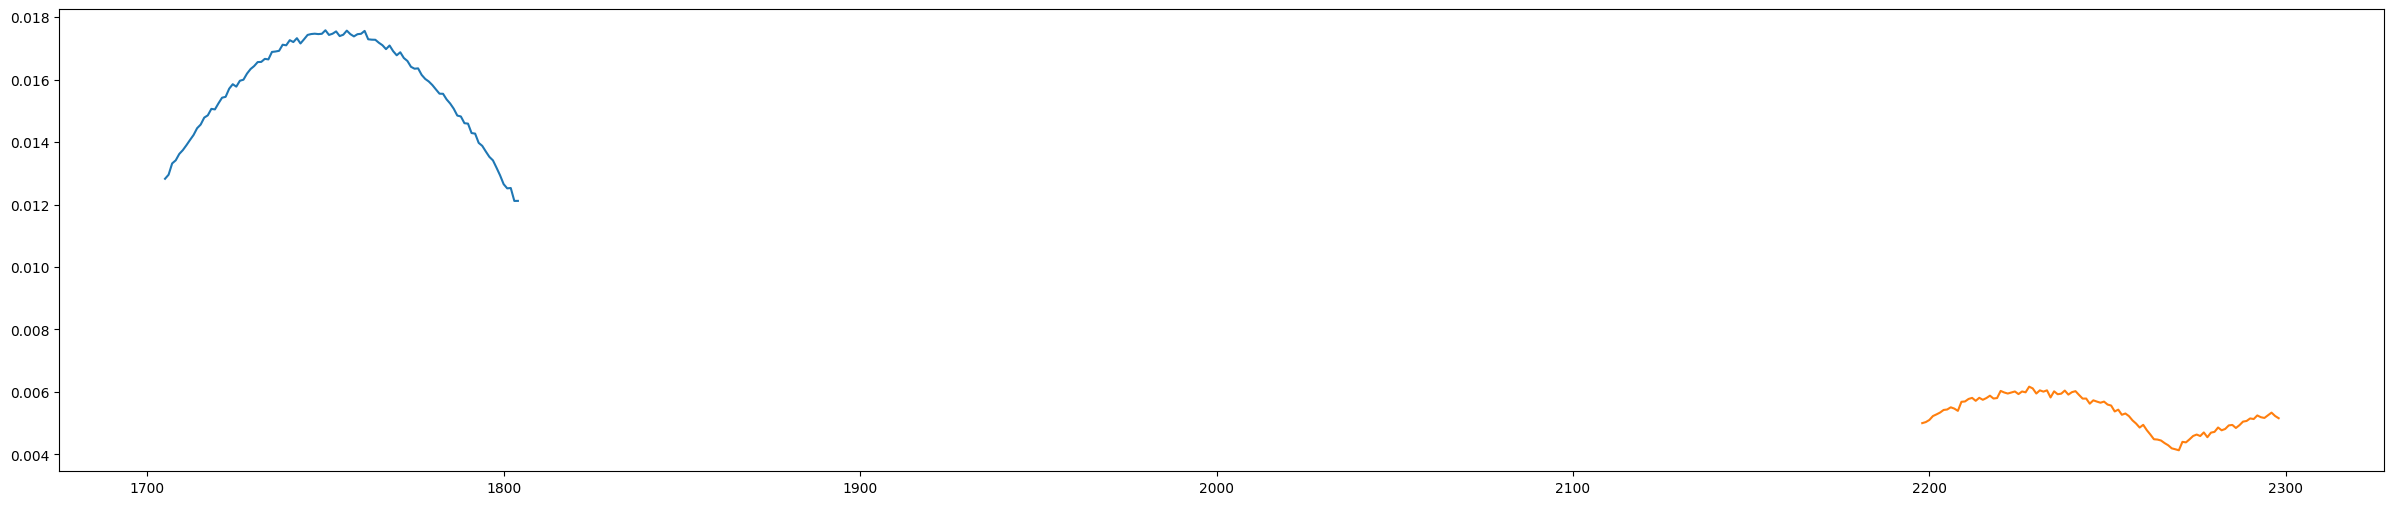

_order2_


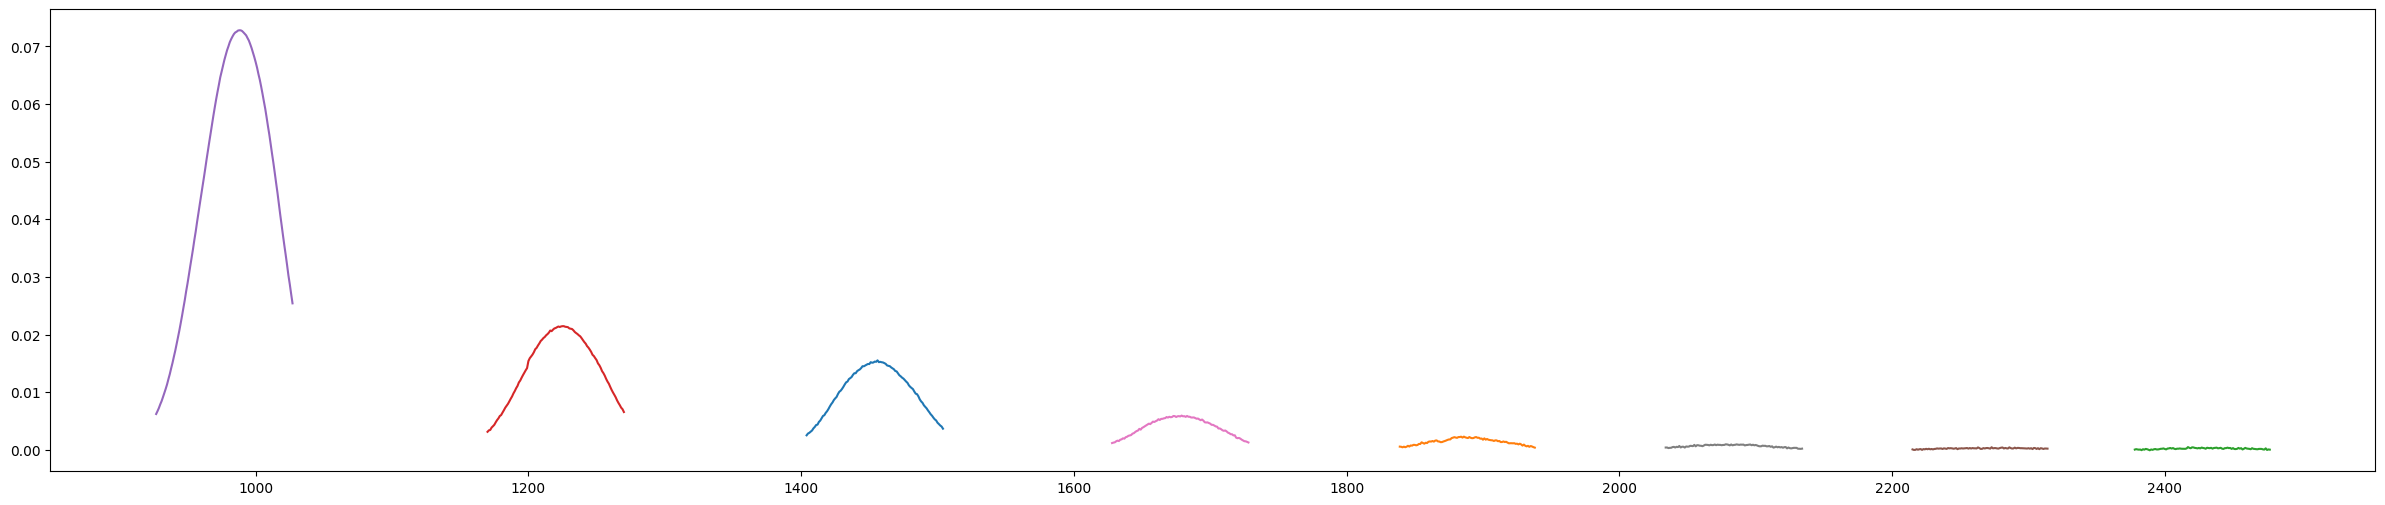

_order3_


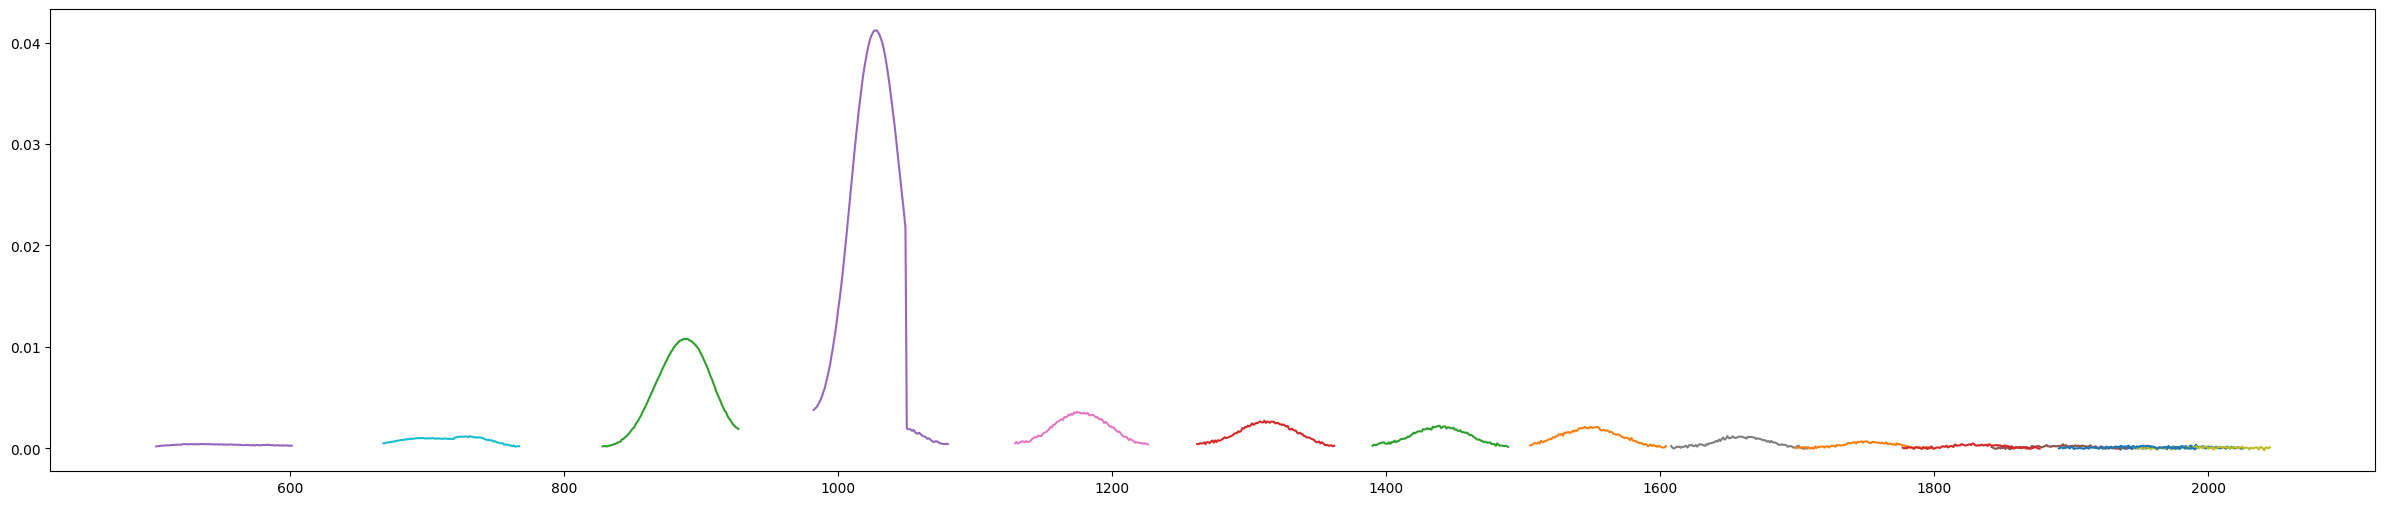

In [4]:
for m in range(-3,4):
    print('_order'+str(m)+'_')
    order_files = [x for x in reflx_files if '_order'+str(m)+'_' in x]
    plt.figure(figsize=(30,6))
    for file in order_files:
        curve = pd.read_csv(os.path.join(directory,file), header = 1)
        column = curve.iloc[:, 1]
        sep_index = column[column.isnull()].index[0]
        curve = curve.iloc[:sep_index]
        curve = curve.drop(['Unnamed: 2'], axis = 1)
        plt.plot(pd.to_numeric(curve.iloc[:, 0]), pd.to_numeric(curve.iloc[:, 1]))
    plt.show()

In [5]:
# reading csv file
with open(test_file, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
     
    # extracting field names through first row
    fields = next(csvreader)
    print(fields)
    print(next(csvreader))

['S polarization baseline', '', 'Spolar', '', 'Ctm_S_polar366-466nm_order-3_period6um_angle-168Reflect21-12-2023time_14_30_11', '', 'Ctm_S_polar400-500nm_order-3_period6um_angle-167Reflect21-12-2023time_14_30_57', '', 'Ctm_S_polar434-534nm_order-3_period6um_angle-166Reflect21-12-2023time_14_31_39', '', 'Ctm_S_polar468-568nm_order-3_period6um_angle-165Reflect21-12-2023time_14_32_22', '', 'Ctm_S_polar501-601nm_order-3_period6um_angle-164Reflect21-12-2023time_14_33_04', '', 'Ctm_S_polar535-635nm_order-3_period6um_angle-163Reflect21-12-2023time_14_33_51', '', 'Ctm_S_polar568-668nm_order-3_period6um_angle-162Reflect21-12-2023time_14_34_37', '', 'Ctm_S_polar601-701nm_order-3_period6um_angle-161Reflect21-12-2023time_14_35_24', '', 'Ctm_S_polar634-734nm_order-3_period6um_angle-160Reflect21-12-2023time_14_36_07', '', 'Ctm_S_polar667-767nm_order-3_period6um_angle-159Reflect21-12-2023time_14_37_14', '', 'Ctm_S_polar699-799nm_order-3_period6um_angle-158Reflect21-12-2023time_14_38_20', '', 'Ctm_S_p

In [6]:
df = pd.read_csv(test_file)
display(df)

S polarization baseline    Unnamed: 1  \
0                                       Wavelength (nm)            %T   
1                                                  1600  0.9816027284   
2                                                  1599  0.9818652868   
3                                                  1598  0.9820247889   
4                                                  1597  0.9824498296   
...                                                 ...           ...   
2983                  TR Changed: 21/12/2023 2:20:06 PM          Old:   
2984                           End Method Modifications           NaN   
2985  Calculated as Spolar divided by S polarization...           NaN   
2986  21/12/2023 3:16:36 PM - ADL Continuum operatio...           NaN   
2987  Continuum name changed to 'Ctm_S_polar1482-158...           NaN   

               Spolar       Unnamed: 3  \
0     Wavelength (nm)               %T   
1                1582  0.0003890992084   
2                1581    0.00133957353   
3                1580   0.001418471686   
4                1579   0.001359516056   
...               ...              ...   
2983      New:Reflect              NaN   
2984              NaN              NaN   
2985              NaN              NaN   
2986              NaN              NaN   
2987              NaN              NaN   

     Ctm_S_polar366-466nm_order-3_period6um_angle-168Reflect21-12-2023time_14_30_11  \
0                                       Wavelength (nm)                               
1                                                   466                               
2                                                   465                               
3                                                   464                               
4                                                   463                               
...                                                 ...                               
2983                                                NaN                               
2984                                                NaN                               
2985                                                NaN                               
2986                                                NaN                               
2987                                                NaN                               

           Unnamed: 5  \
0                  %T   
1     -0.005607279483   
2      0.006735440344   
3     -0.002642531646   
4      0.005065180827   
...               ...   
2983              NaN   
2984              NaN   
2985              NaN   
2986              NaN   
2987              NaN   

     Ctm_S_polar400-500nm_order-3_period6um_angle-167Reflect21-12-2023time_14_30_57  \
0                                       Wavelength (nm)                               
1                                                   500                               
2                                                   499                               
3                                                   498                               
4                                                   497                               
...                                                 ...                               
2983                                                NaN                               
2984                                                NaN                               
2985                                                NaN                               
2986                                                NaN                               
2987                                                NaN                               

           Unnamed: 7  \
0                  %T   
1     -0.002606898779   
2     -0.004758375231   
3     -0.004753587767   
4     0.0005758181796   
...               ...   
2983              NaN   
2984              NaN   
2985              NaN   
2986     

In [7]:
old_columns = list(df.columns)
new_columns = [old_columns[i] if i%2==0 else old_columns[i-1]+'_intensity' for i in range(len(old_columns))]
df.columns = new_columns
reduced_columns = [col for col in new_columns if 'Ctm' in col]
df = df[reduced_columns]
display(df)
all_columns = list(df.columns)
order_dfs = []
for i in range(-3, 4):
    order_columns = [col for col in new_columns if 'order'+str(i) in col]
    order_dfs.append(df[order_columns])
    

Ctm_S_polar366-466nm_order-3_period6um_angle-168Reflect21-12-2023time_14_30_11  \
0                                       Wavelength (nm)                               
1                                                   466                               
2                                                   465                               
3                                                   464                               
4                                                   463                               
...                                                 ...                               
2983                                                NaN                               
2984                                                NaN                               
2985                                                NaN                               
2986                                                NaN                               
2987                                                NaN                               

     Ctm_S_polar366-466nm_order-3_period6um_angle-168Reflect21-12-2023time_14_30_11_intensity  \
0                                                    %T                                         
1                                       -0.005607279483                                         
2                                        0.006735440344                                         
3                                       -0.002642531646                                         
4                                        0.005065180827                                         
...                                                 ...                                         
2983                                                NaN                                         
2984                                                NaN                                         
2985                                                NaN                                         
2986                                                NaN                                         
2987                                                NaN                                         

     Ctm_S_polar400-500nm_order-3_period6um_angle-167Reflect21-12-2023time_14_30_57  \
0                                       Wavelength (nm)                               
1                                                   500                               
2                                                   499                               
3                                                   498                               
4                                                   497                               
...                                                 ...                               
2983                                                NaN                               
2984                                                NaN                               
2985                                                NaN                               
2986                                                NaN                               
2987                                                NaN                               

     Ctm_S_polar400-500nm_order-3_period6um_angle-167Reflect21-12-2023time_14_30_57_intensity  \
0                                                    %T                                         
1                                       -0.002606898779                                         
2                                       -0.004758375231                                         
3                                       -0.004753587767                                         
4                                       0.0005758181796                                         
...                                                 ...                                         
2983                                                NaN                

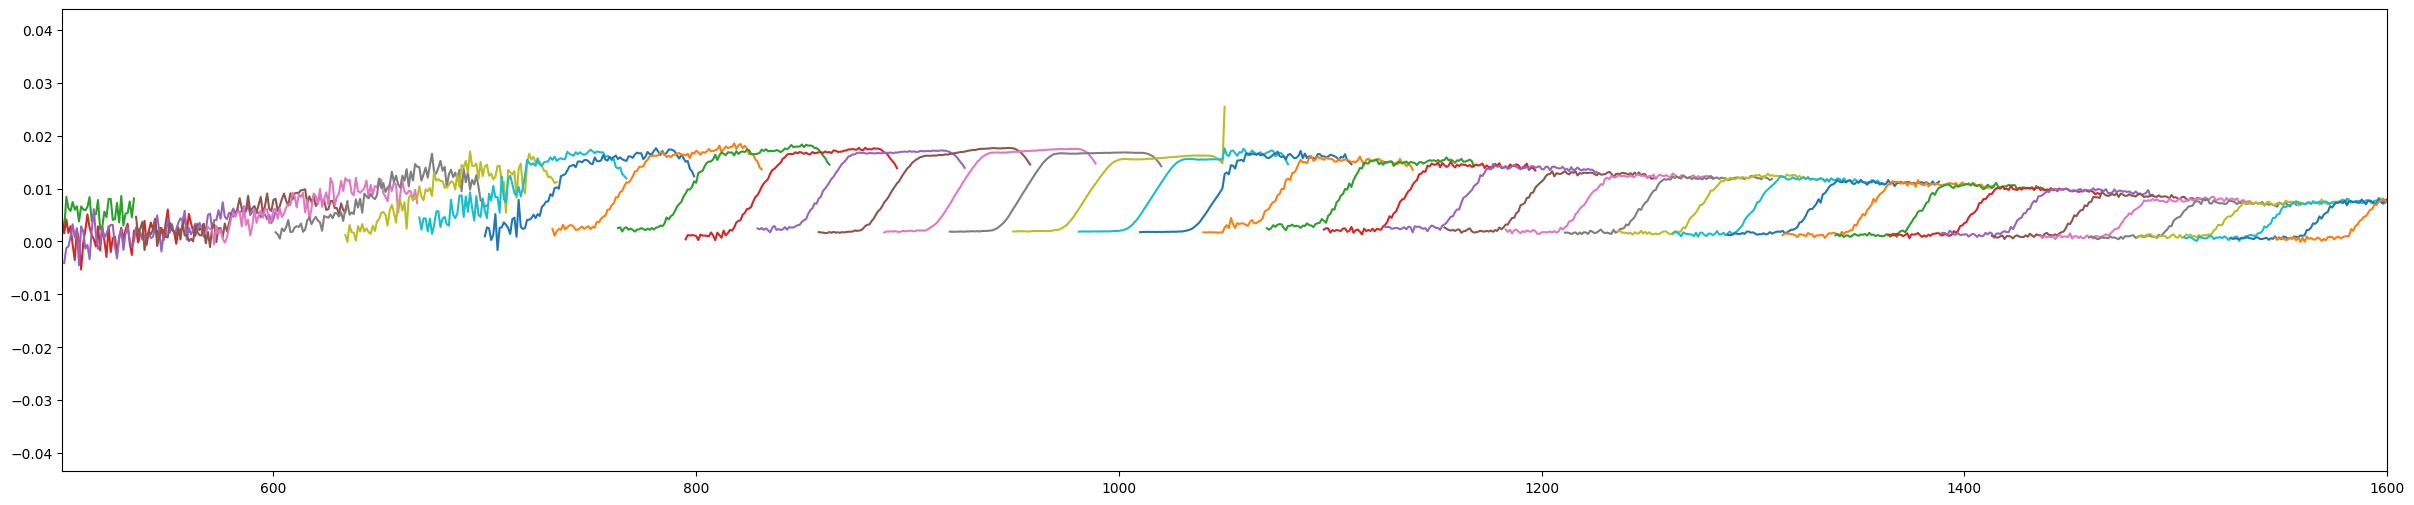

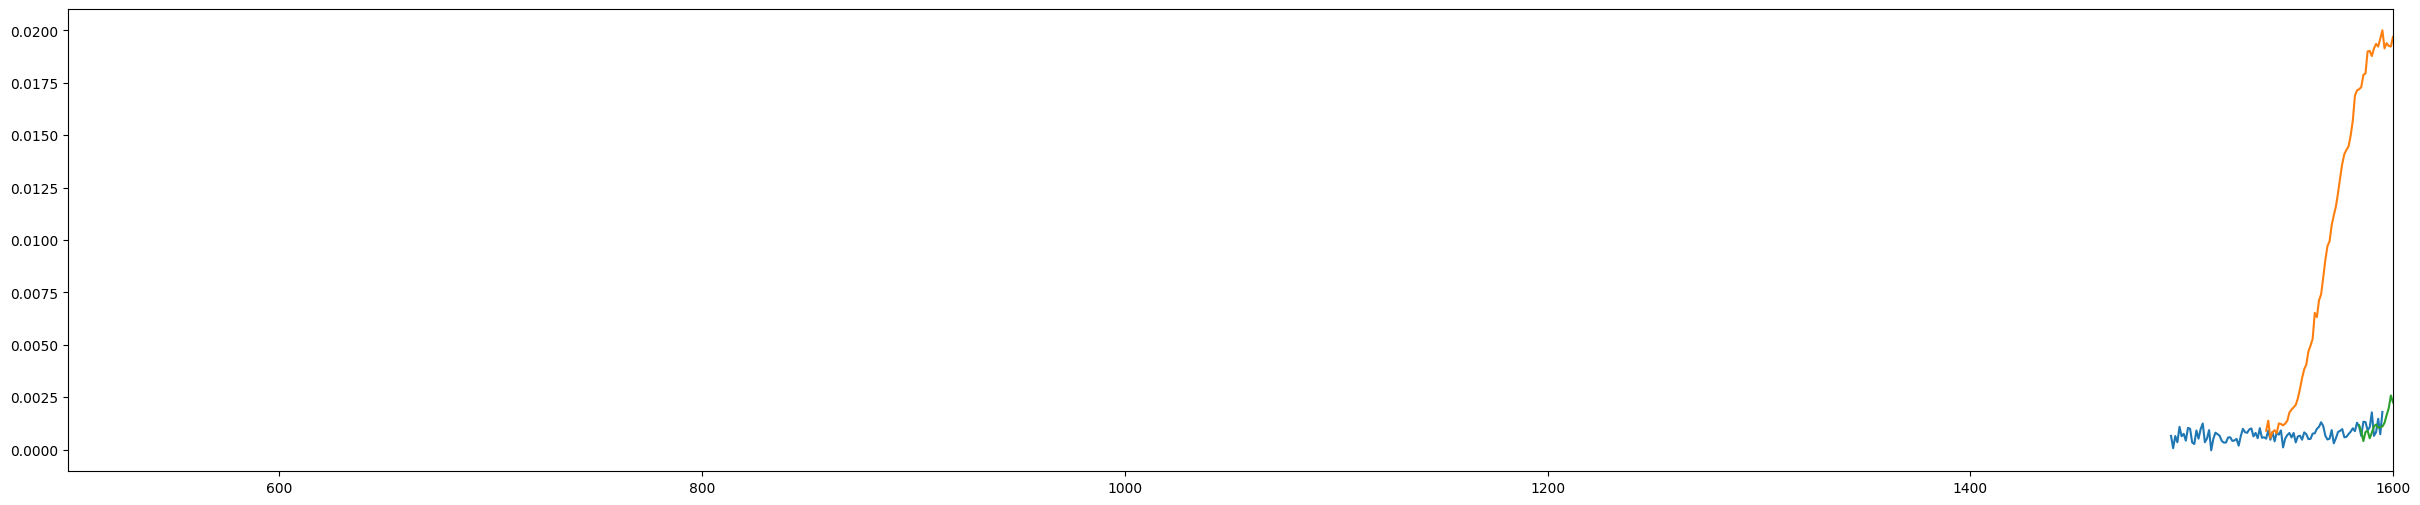

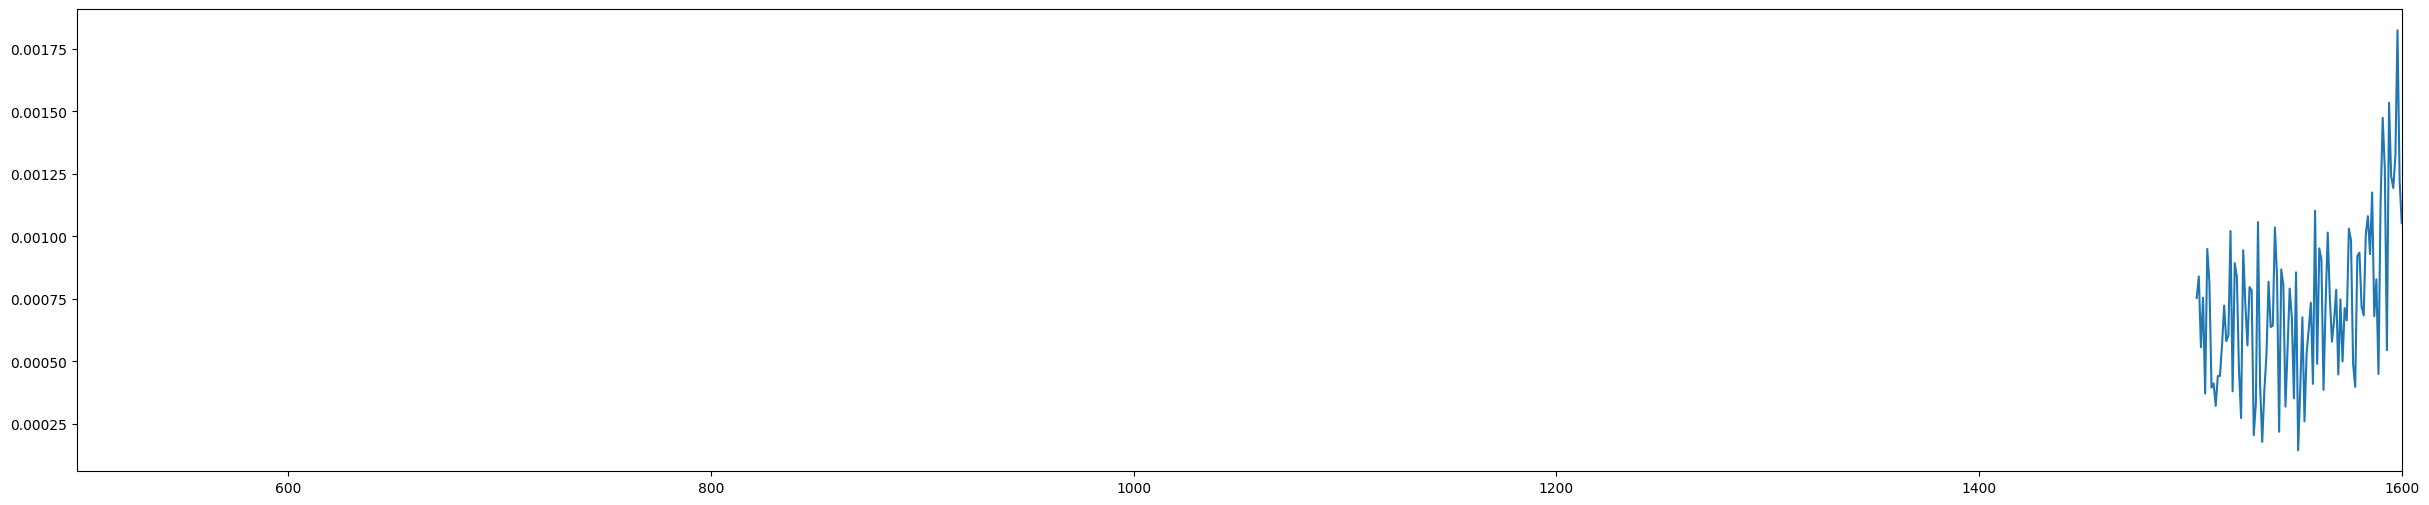

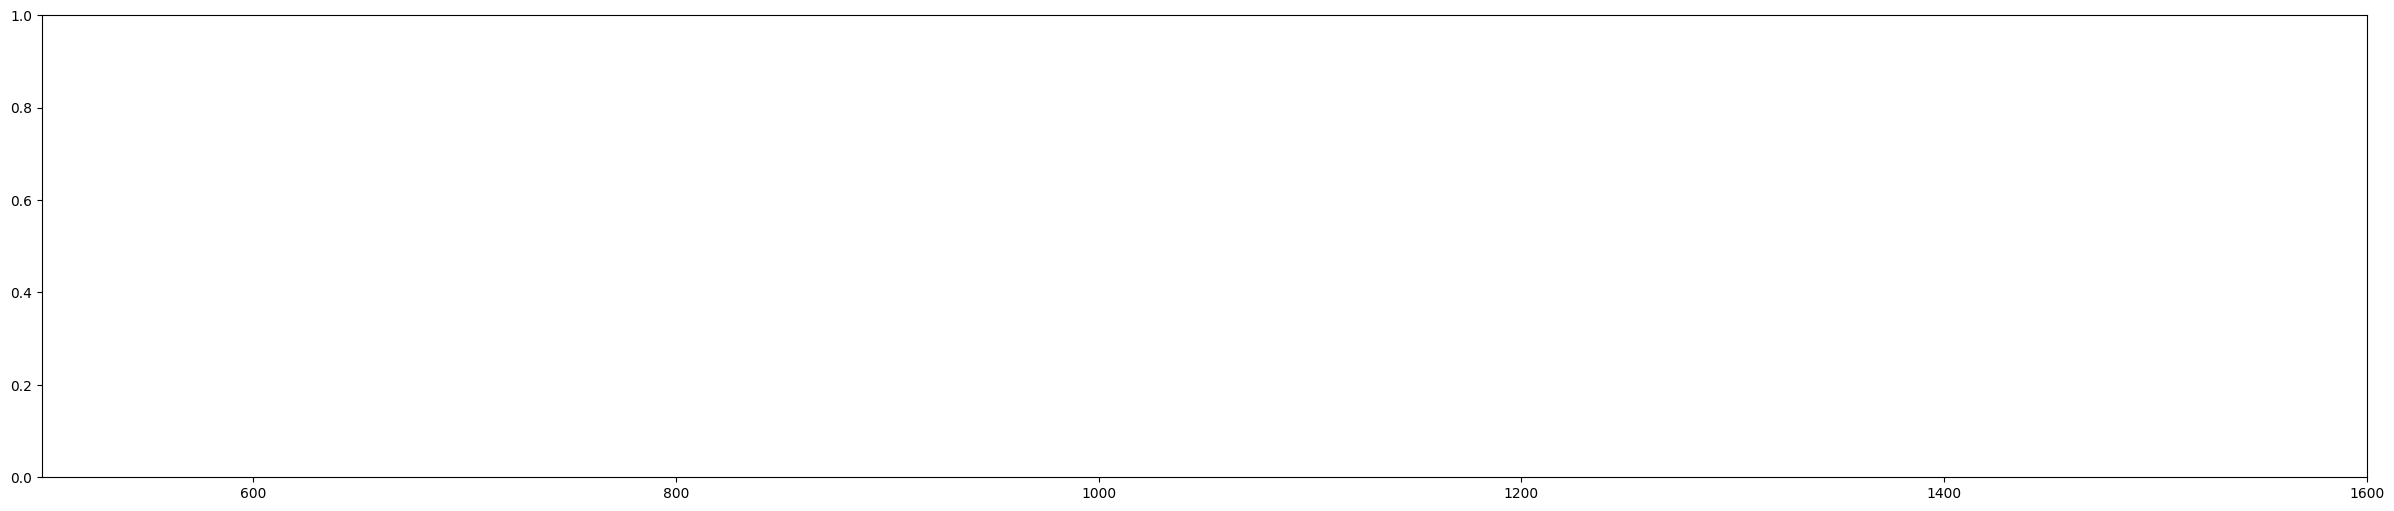

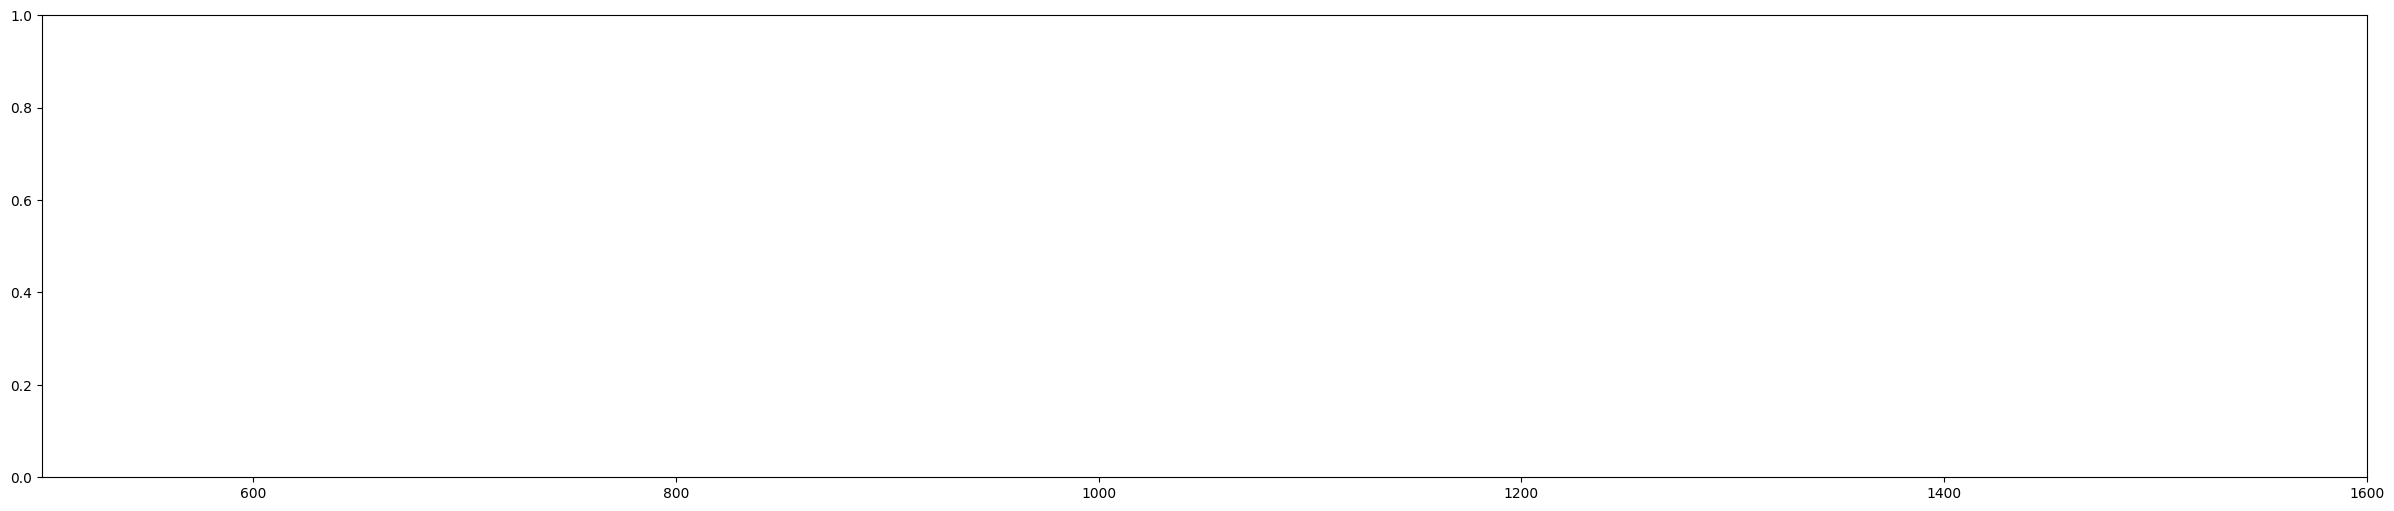

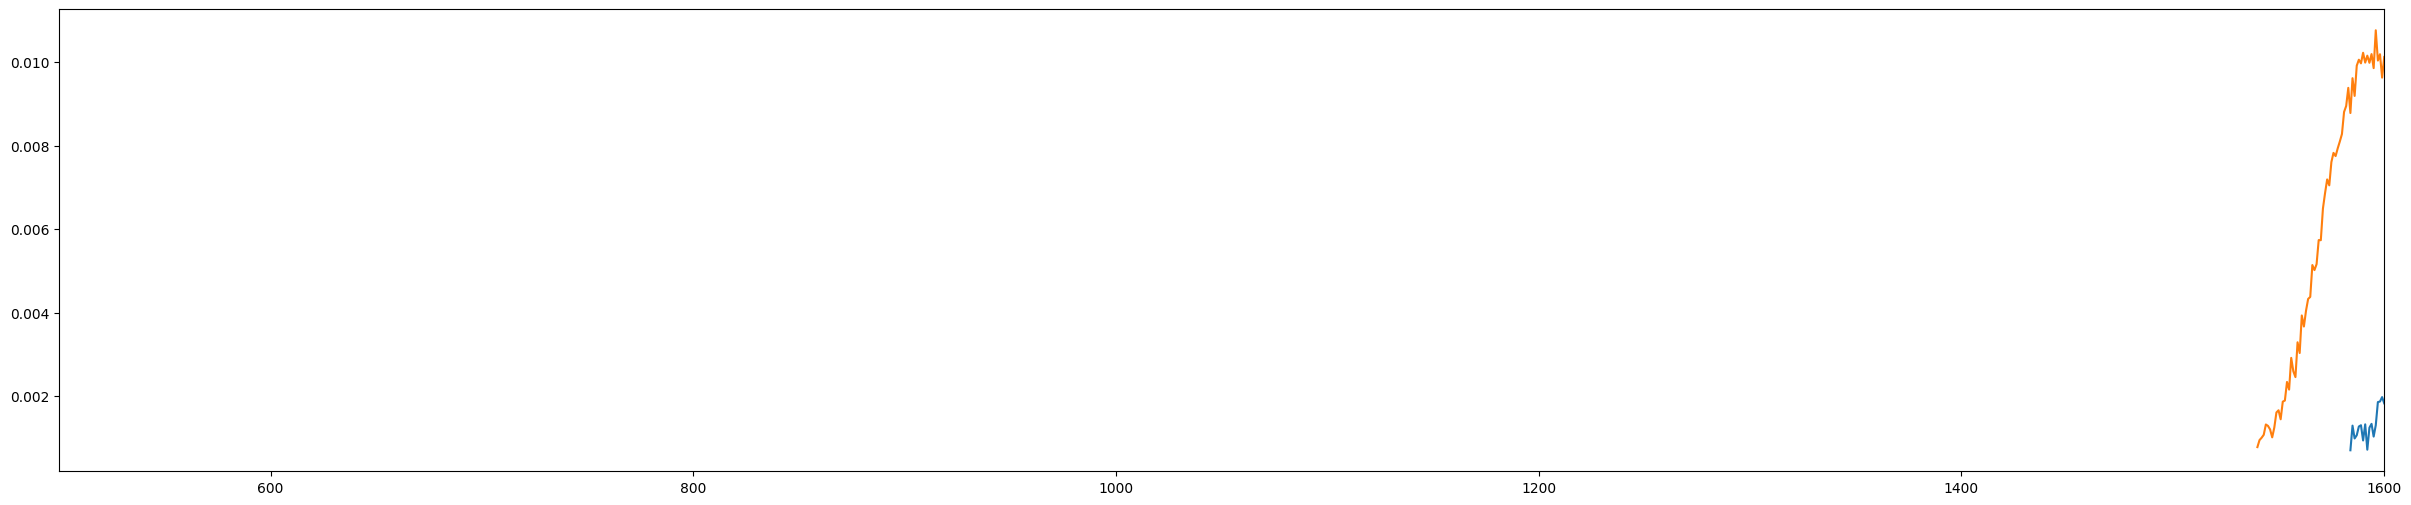

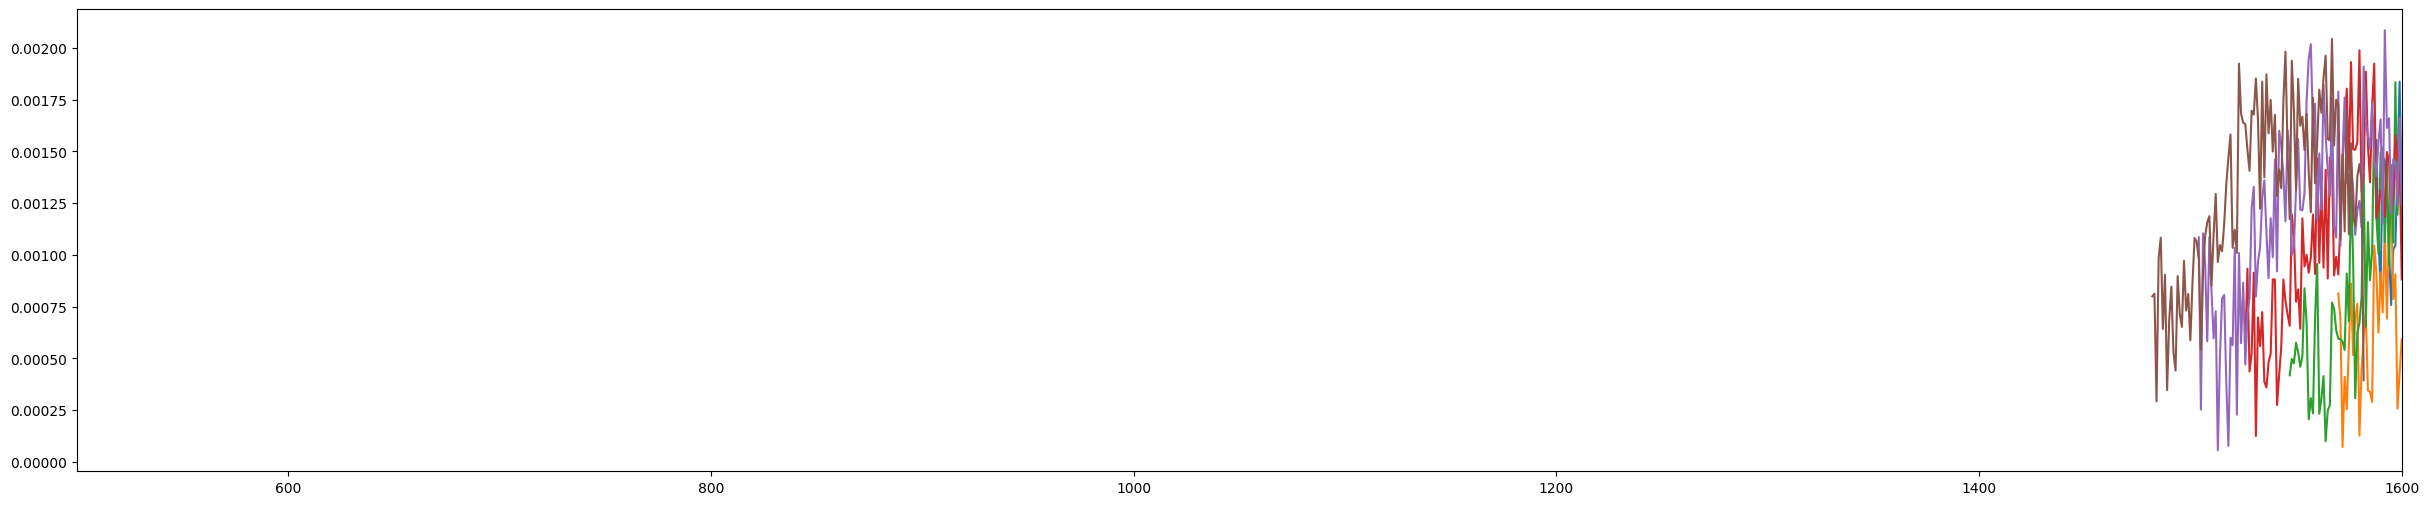

In [8]:
for df in order_dfs:
    columns = df.columns
    plt.figure(figsize=(30,6))
    for i in range(0,len(columns),2):
        wave = pd.to_numeric(df[columns[i]], errors='coerce')
        wave = wave.dropna().astype(float)
        intensity = pd.to_numeric(df[columns[i+1]], errors='coerce')
        intensity = intensity.dropna().astype(float)
        plt.plot(wave, intensity)
    plt.xlim(500,1600)
    plt.show()

In [9]:
envelope_TE = pd.read_csv('/kaggle/input/comsol-envelope/realTE', skiprows=8, sep='\s+', names=['wave', 'intens'])
envelope_TM = pd.read_csv('/kaggle/input/comsol-envelope/realTM', skiprows=8, sep='\s+', names=['wave', 'intens'])
t_i = [10,9,8,7,11,12,13]
r_i = [2,1,0,3,4,5,6]
envelopes = []
for i in range(14):
    te = envelope_TE.iloc[i*23:(i+1)*23]
    tm = envelope_TM.iloc[i*23:(i+1)*23]
    new = te.copy()
    new.intens = (te.intens + tm.intens)/2
    envelopes.append(new)
transmittances = [envelopes[i] for i in t_i]
reflectances = [envelopes[i] for i in r_i]
print(len(envelopes))

14


In [10]:
df = pd.read_csv('/kaggle/input/6um-all/6um_all.csv')
old_columns = list(df.columns)
new_columns = [old_columns[i] if i%2==0 else old_columns[i-1]+'_intensity' for i in range(len(old_columns))]
df.columns = new_columns
reduced_columns = [col for col in new_columns if 'Collect' in col]
df = df[reduced_columns]
display(df)

Collect1 Collect1_intensity         Collect2 Collect2_intensity  \
0     Wavelength (nm)                 %R  Wavelength (nm)                 %R   
1                2500      -0.0257936772             2500    -0.006729053799   
2                2499     -0.01153991278             2499    -0.008592389524   
3                2498     -0.02355778031             2498      0.01411040407   
4                2497       -0.035397131             2497     -0.02420957386   
...               ...                ...              ...                ...   
5324              NaN                NaN              NaN                NaN   
5325              NaN                NaN              NaN                NaN   
5326              NaN                NaN              NaN                NaN   
5327              NaN                NaN              NaN                NaN   
5328              NaN                NaN              NaN                NaN   

             Collect3 Collect3_intensity         Collect4 Collect4_intensity  \
0     Wavelength (nm)                 %R  Wavelength (nm)                 %R   
1                2500     -0.01968658157             2500   -0.0006464772741   
2                2499      0.03202947602             2499      0.02335040271   
3                2498     0.003867836203             2498      0.04558468238   
4                2497      0.01528253313             2497      0.01226398628   
...               ...                ...              ...                ...   
5324              NaN                NaN              NaN                NaN   
5325              NaN                NaN              NaN                NaN   
5326              NaN                NaN              NaN                NaN   
5327              NaN                NaN              NaN                NaN   
5328              NaN                NaN              NaN                NaN   

             Collect5 Collect5_intensity  ...        Collect56  \
0     Wavelength (nm)                 %R  ...  Wavelength (nm)   
1                2500      0.02177211829  ...             2500   
2                2499     -0.02157764509  ...             2499   
3                2498      0.03040547855  ...             2498   
4                2497     -0.02213585936  ...             2497   
...               ...                ...  ...              ...   
5324              NaN                NaN  ...              NaN   
5325              NaN                NaN  ...              NaN   
5326              NaN                NaN  ...              NaN   
5327              NaN                NaN  ...              NaN   
5328              NaN                NaN  ...              NaN   

     Collect56_intensity        Collect57 Collect57_intensity  \
0                     %R  Wavelength (nm)                  %R   
1           0.3285849094             2500      -0.01762718335   
2           0.3457642794             2499      -0.07348755747   
3           0.3541533649             2498      -0.01145810261   
4            0.365114361             2497     -0.003073983593   
...                  ...              ...                 ...   
5324                 NaN              NaN                 NaN   
5325                 NaN              NaN                 NaN   
5326                 NaN              NaN                 NaN   
5327                 NaN              NaN                 NaN   
5328                 NaN              NaN                 NaN   

            Collect58 Collect58_intensity        Collect59  \
0     Wavelength (nm)                  %R  Wavelength (nm)   
1                2500      0.005436519627             2500   
2                2499      -0.01272685919             2499   
3                2498      -0.04359832406             2498   
4                2497        0.0273152031             2497   
...               ...                 ...              ...   
5324              NaN                 NaN              NaN   
5325              NaN

In [11]:
class Diffraction_efficiency:
    def __init__(self, lambda_start, lambda_stop, lambda_step, orders, period ,height, inc_angle):
        self.period = period * 1e-9
        self.lambdas = np.arange(lambda_start *1e-9, lambda_stop * 1e-9, lambda_step * 1e-9)
        self.orders = np.arange(-orders, orders+1)
        self.angles = np.arcsin(np.outer(self.orders, self.lambdas)/self.period)
        self.frequencies = np.sin(self.angles) / self.lambdas
        self.height = (75*self.period/1e-6 + 300)*1e-9
        self.blaze_angle = np.arctan(self.height/self.period)
        self.inc_angle = inc_angle/180*np.pi
        x = self.lambdas*1e6
        #self.n = sqrt(1 + 0.6961663*x**2/(x**2 - 0.0684043**2) + 0.4079426*x**2/(x**2 - 0.1162414**2) + 0.8974794*x**2/(x**2 - 9.896161**2))
        self.n = 1.9
        self.cm = sns.light_palette("blue", as_cmap=True)
        self.reflect_intensity = self.reflect()
        self.trans_intensity = self.trans()
        
    def reflect(self):
        irradiated = cos(self.inc_angle)/cos(self.blaze_angle-self.inc_angle) #* pi*self.period
        offset = irradiated*(sin(self.inc_angle - self.blaze_angle) + sin(- self.blaze_angle))/self.lambdas
        intensity = square(abs(sinc((self.frequencies + offset)*self.period/2)))
        intensity = np.nan_to_num(intensity, nan=0)
        intensity = intensity / np.sum(intensity, axis=0)
        intensity = np.where(intensity == 0, np.nan, intensity)
        return intensity

    def trans(self):
        offset = (- tan(self.blaze_angle) + self.n*tan(self.blaze_angle) + sin(self.inc_angle))/self.lambdas
        f_transform = sinc((self.frequencies - offset)*self.period) * exp(-1j*pi*self.period*(self.frequencies + offset + 2/self.lambdas*tan(self.blaze_angle)))
        intensity =  square(abs(f_transform)) #deleted the second one
        intensity = np.nan_to_num(intensity, nan=0)
        intensity = intensity / np.sum(intensity, axis=0)
        intensity = np.where(intensity == 0, np.nan, intensity)
        return intensity
    
    def reflect_table(self):
        df = pd.DataFrame(self.reflect_intensity, columns = (self.lambdas/1e-9).astype(int), index = self.orders)
        df = df.style.background_gradient(cmap=self.cm)
        display(df)
        
    def trans_table(self):
        df = pd.DataFrame(self.trans_intensity, columns = (self.lambdas/1e-9).astype(int), index = self.orders)
        df = df.style.background_gradient(cmap=self.cm)
        display(df)
        
    def trans_plot(self, order):
        plt.figure(figsize=(30,6))
        plt.xlim(200,2500)
        plt.plot(self.lambdas*1e9, self.trans_intensity[order+30])
        
    def order(self, m):
        return [self.lambdas*1e9, self.trans_intensity[m+30]*100]

In [12]:
useful = 0
total = 0

# Transmittance

[30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 170.0, 175.0, 180.0, -175.0, -170.0, -165.0, -160.0, -155.0, -150.0, -145.0, -140.0, -135.0, -130.0, -125.0, -120.0, -115.0, -110.0, -105.0, -100.0, -95.0, -90.0, -85.0, -80.0, -75.0, -70.0, -65.0, -60.0, -55.0, -50.0, -45.0, -40.0, -35.0]
Collect31
[-85.0, -80.0, -75.0, -70.0, -65.0, -60.0, -55.0, -50.0, -45.0, -40.0, -35.0, -30.0, -25.0, -20.0, -15.0, -10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0]
[30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, -85.0, -80.0, -75.0, -70.0, -65.0, -60.0, -55.0, -50.0, -45.0, -40.0, -35.0]
-7


/tmp/ipykernel_19/201295628.py:6: RuntimeWarning: invalid value encountered in arcsin
  self.angles = np.arcsin(np.outer(self.orders, self.lambdas)/self.period)


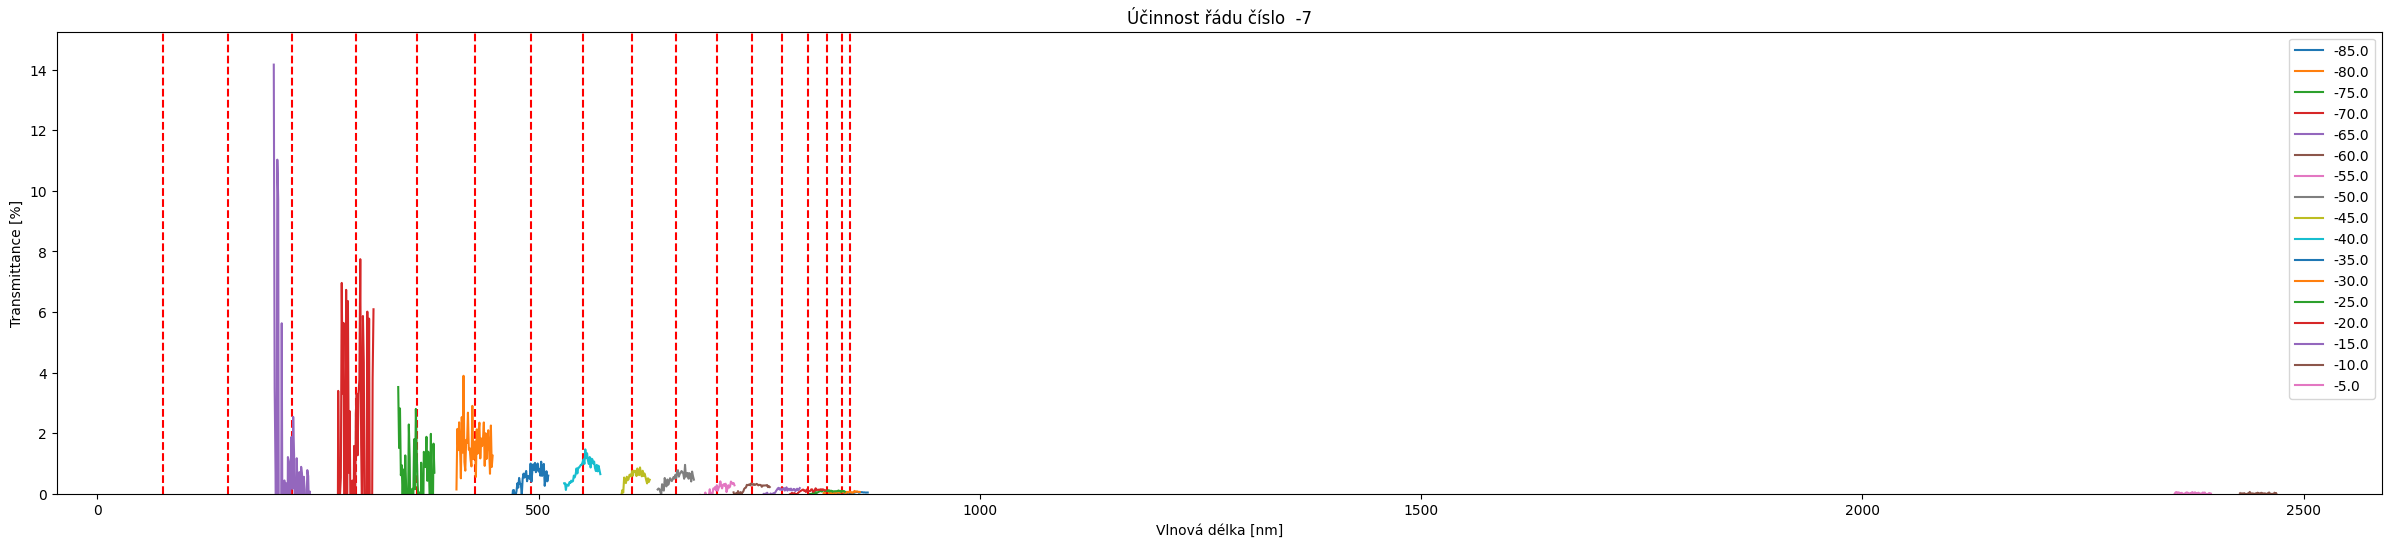

-6


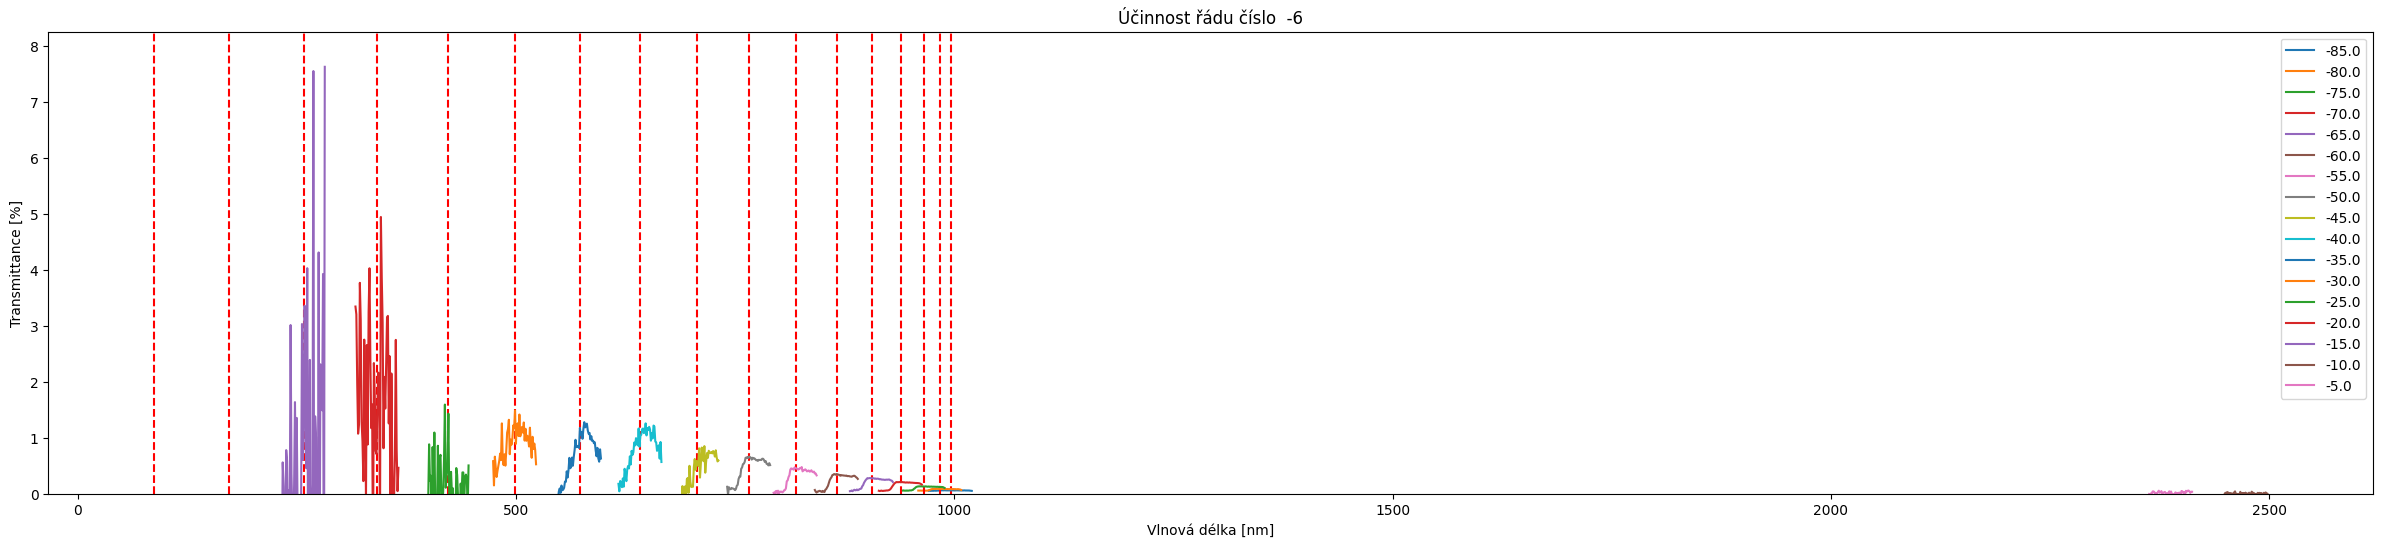

-5


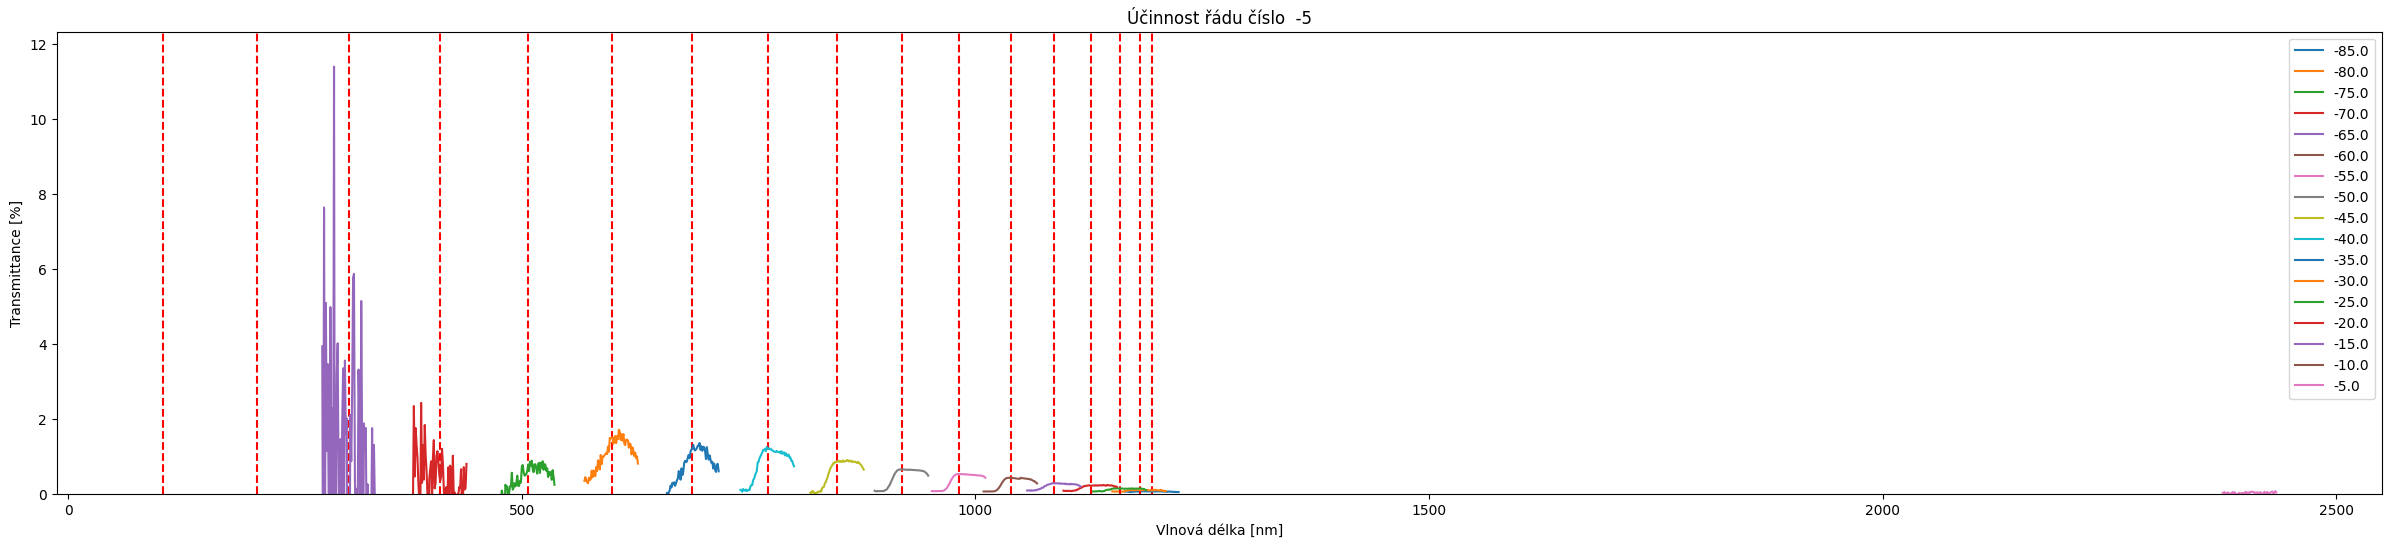

-4


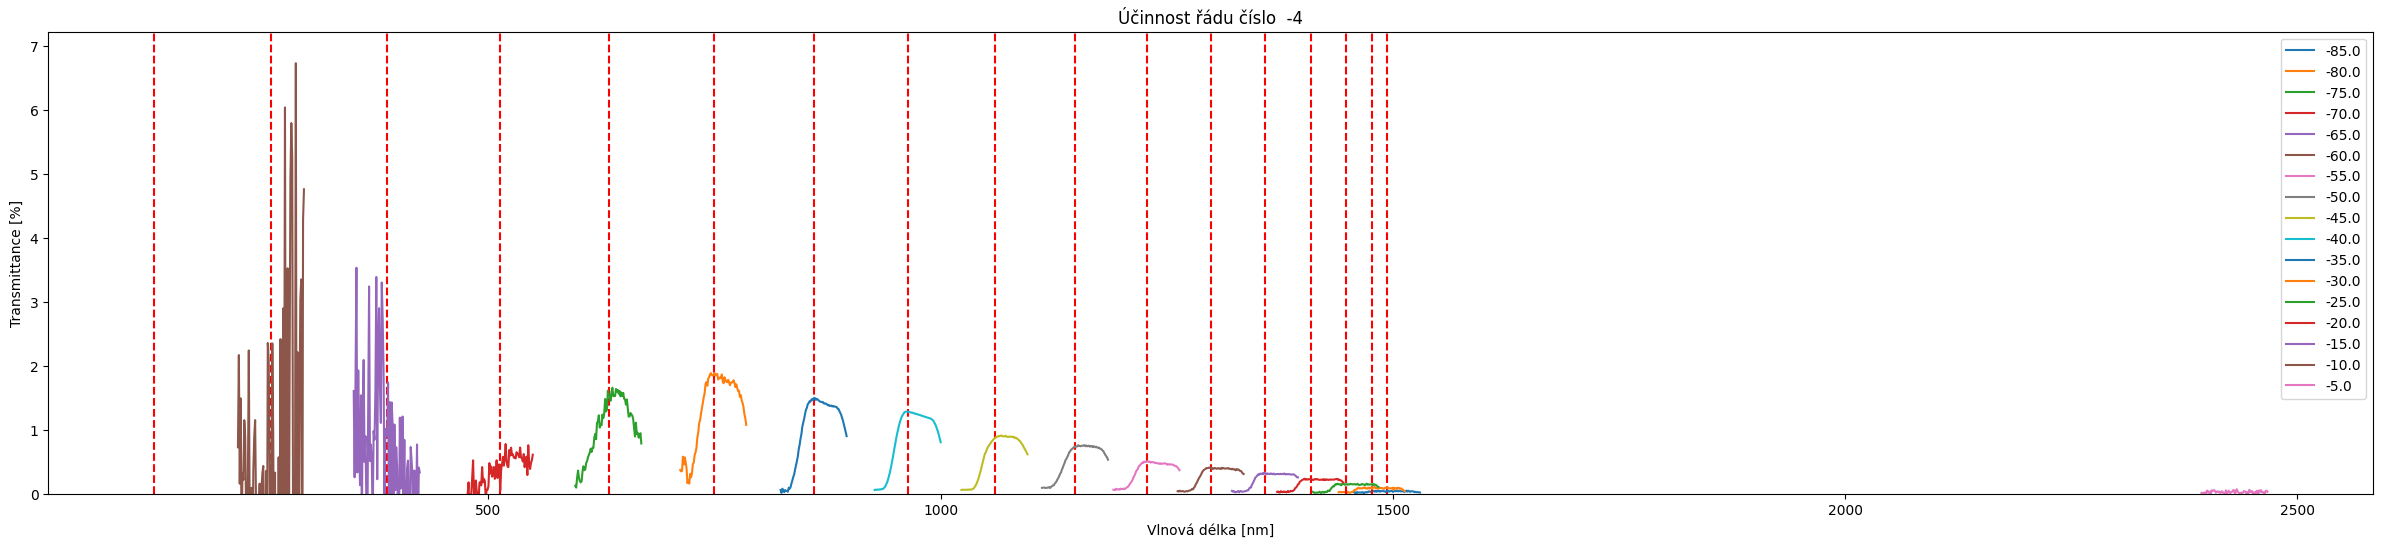

-3


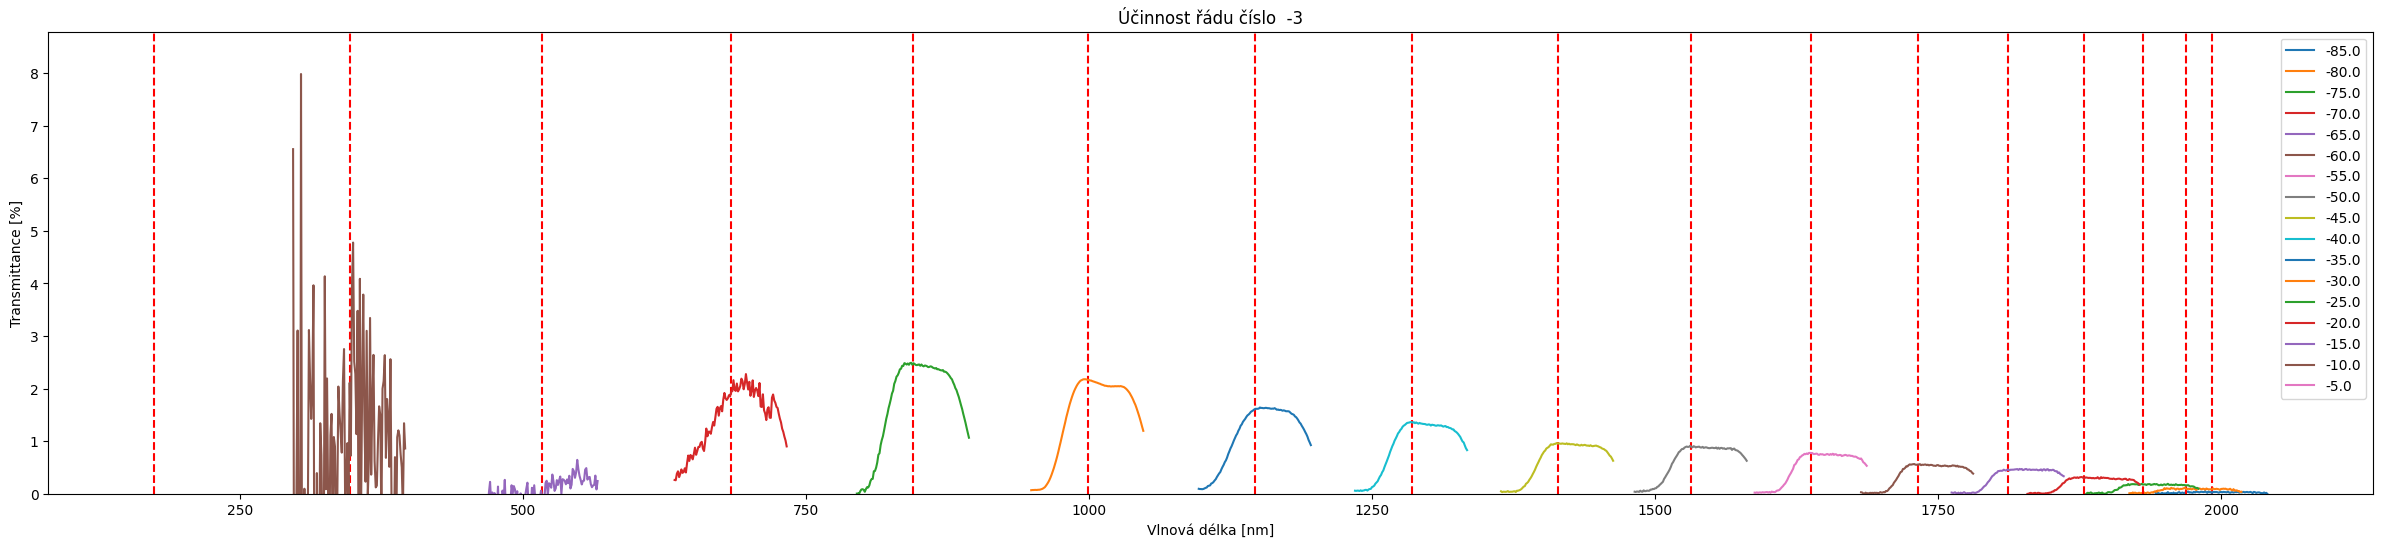

-2


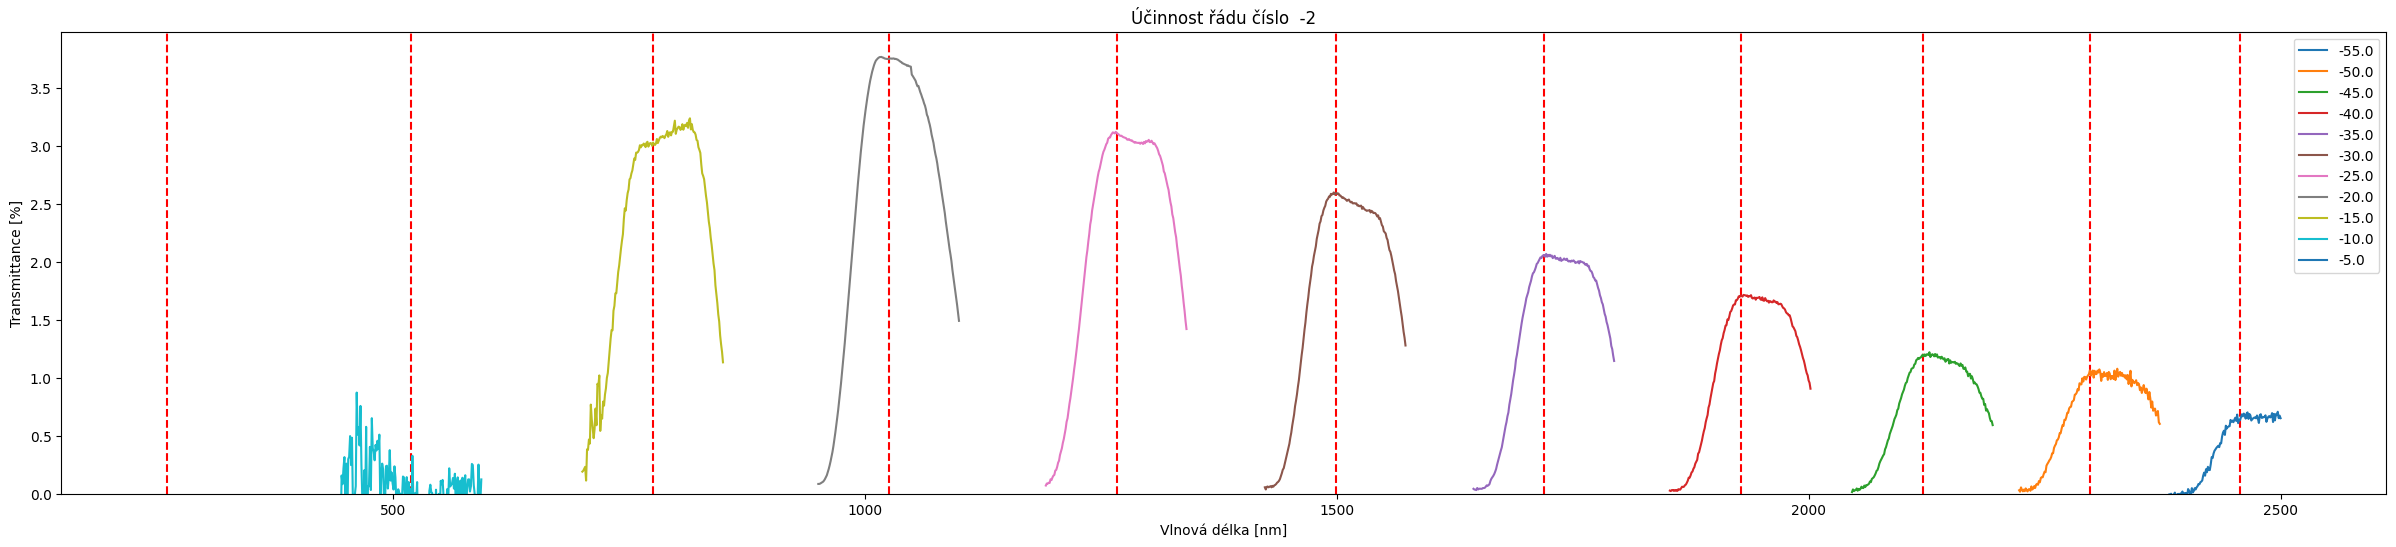

-1


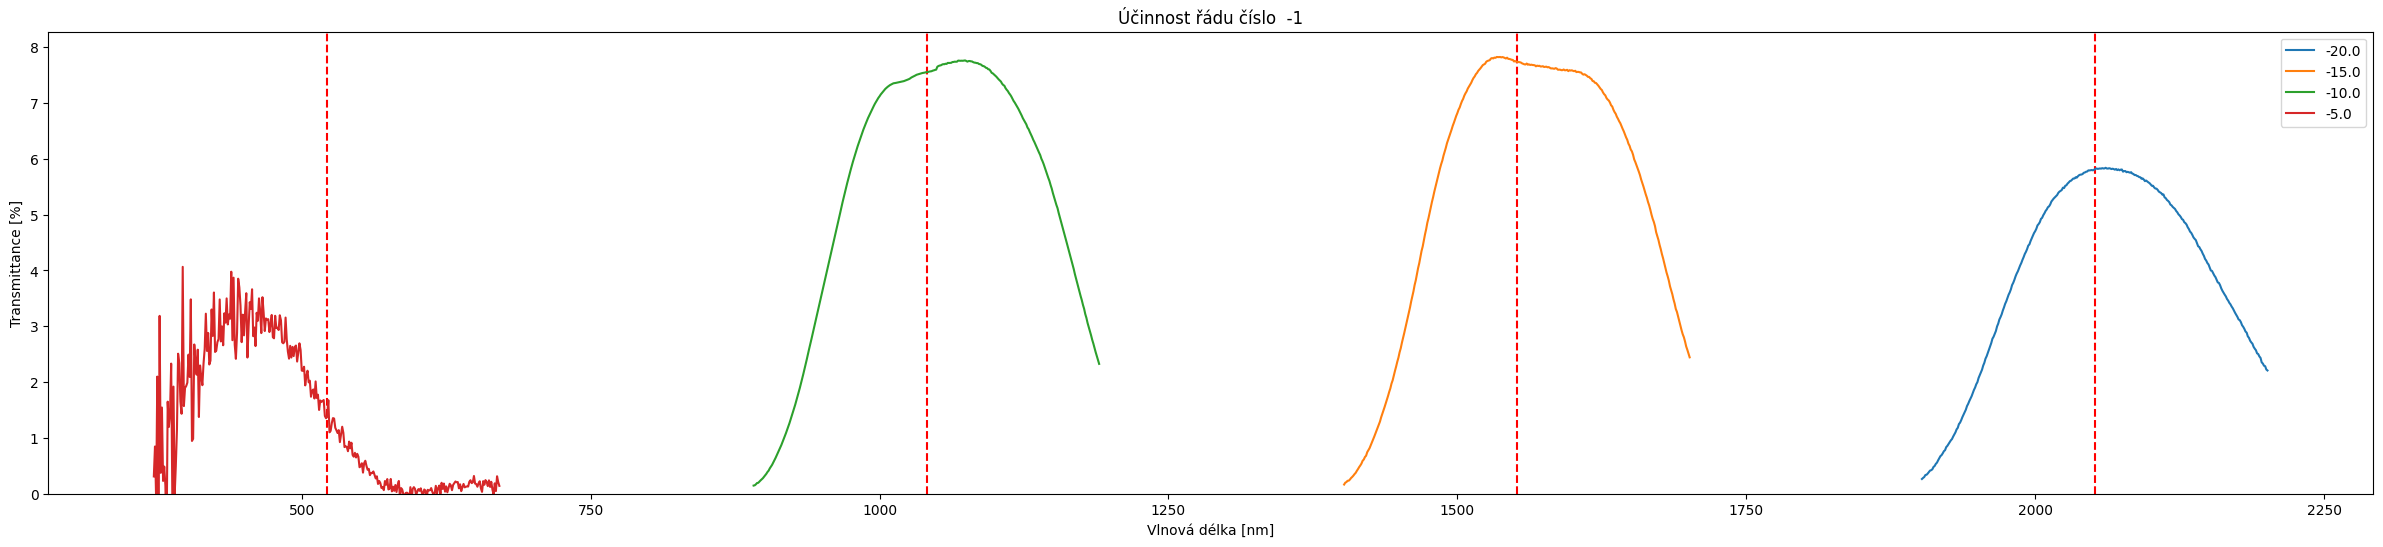

0


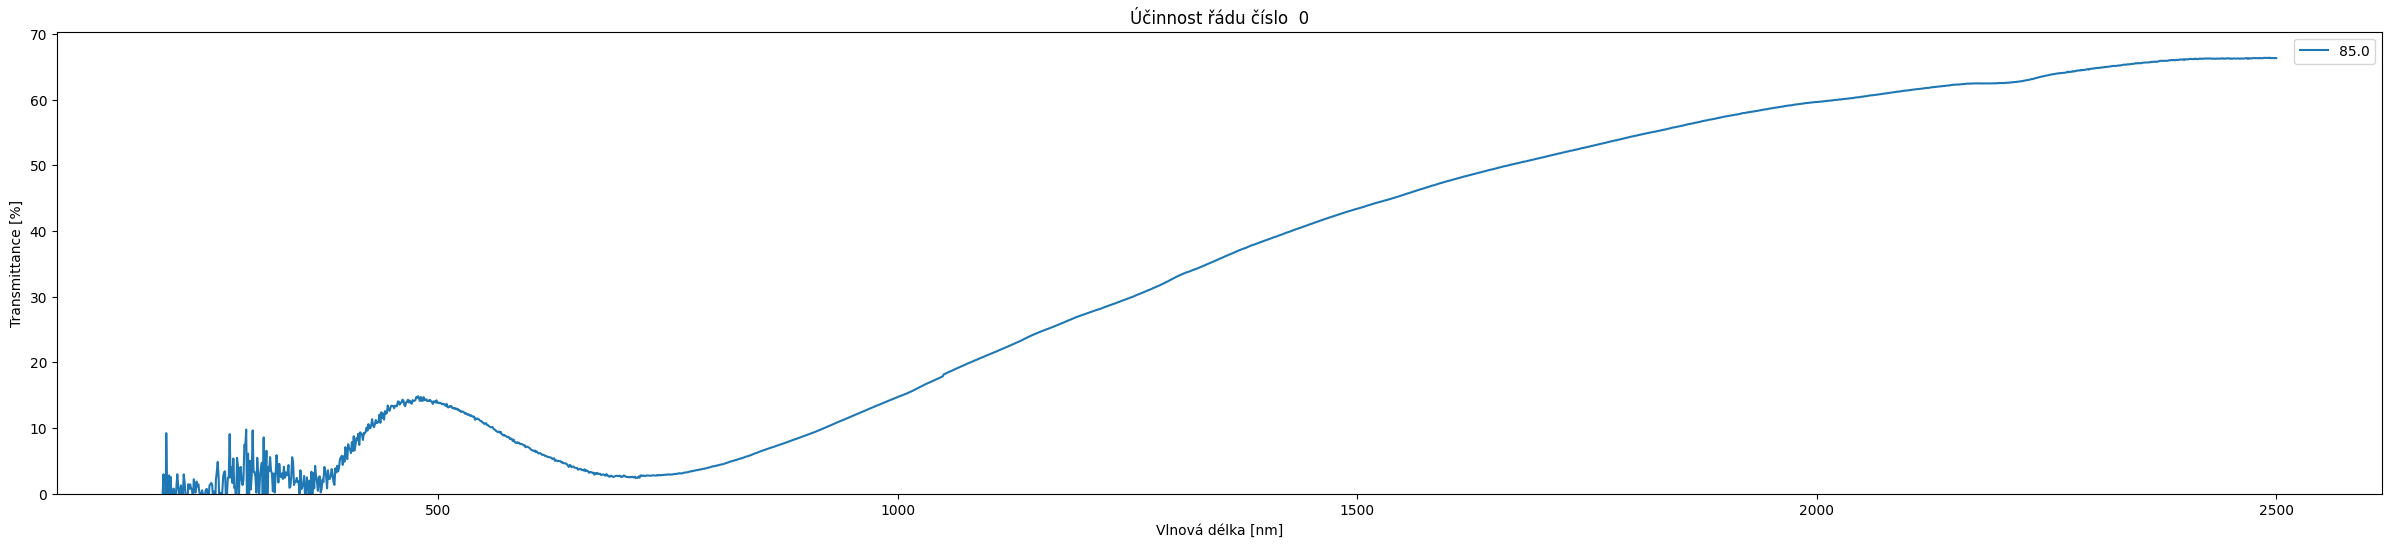

1


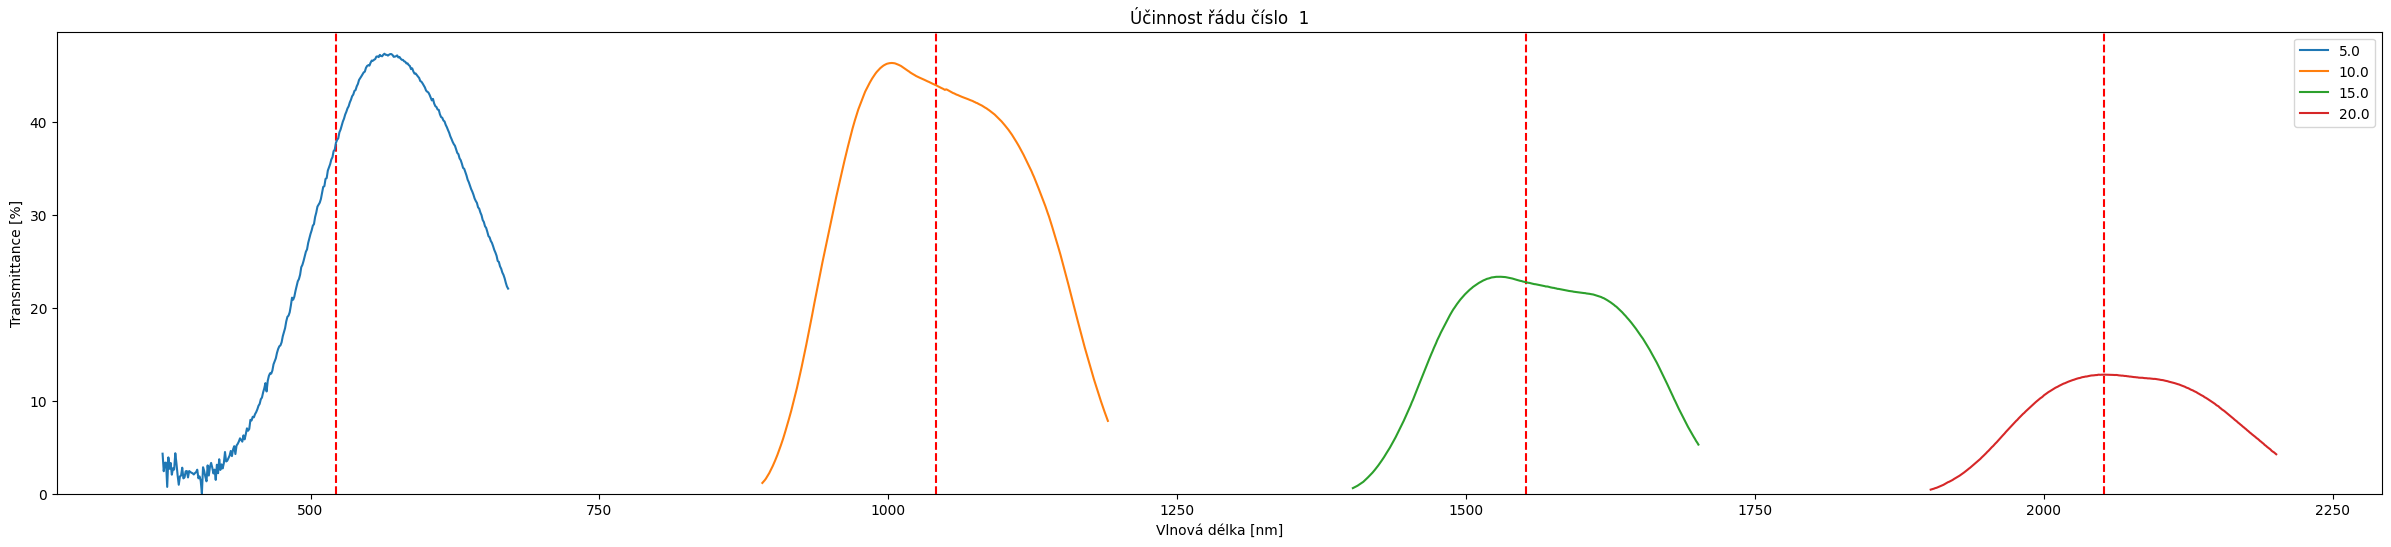

2


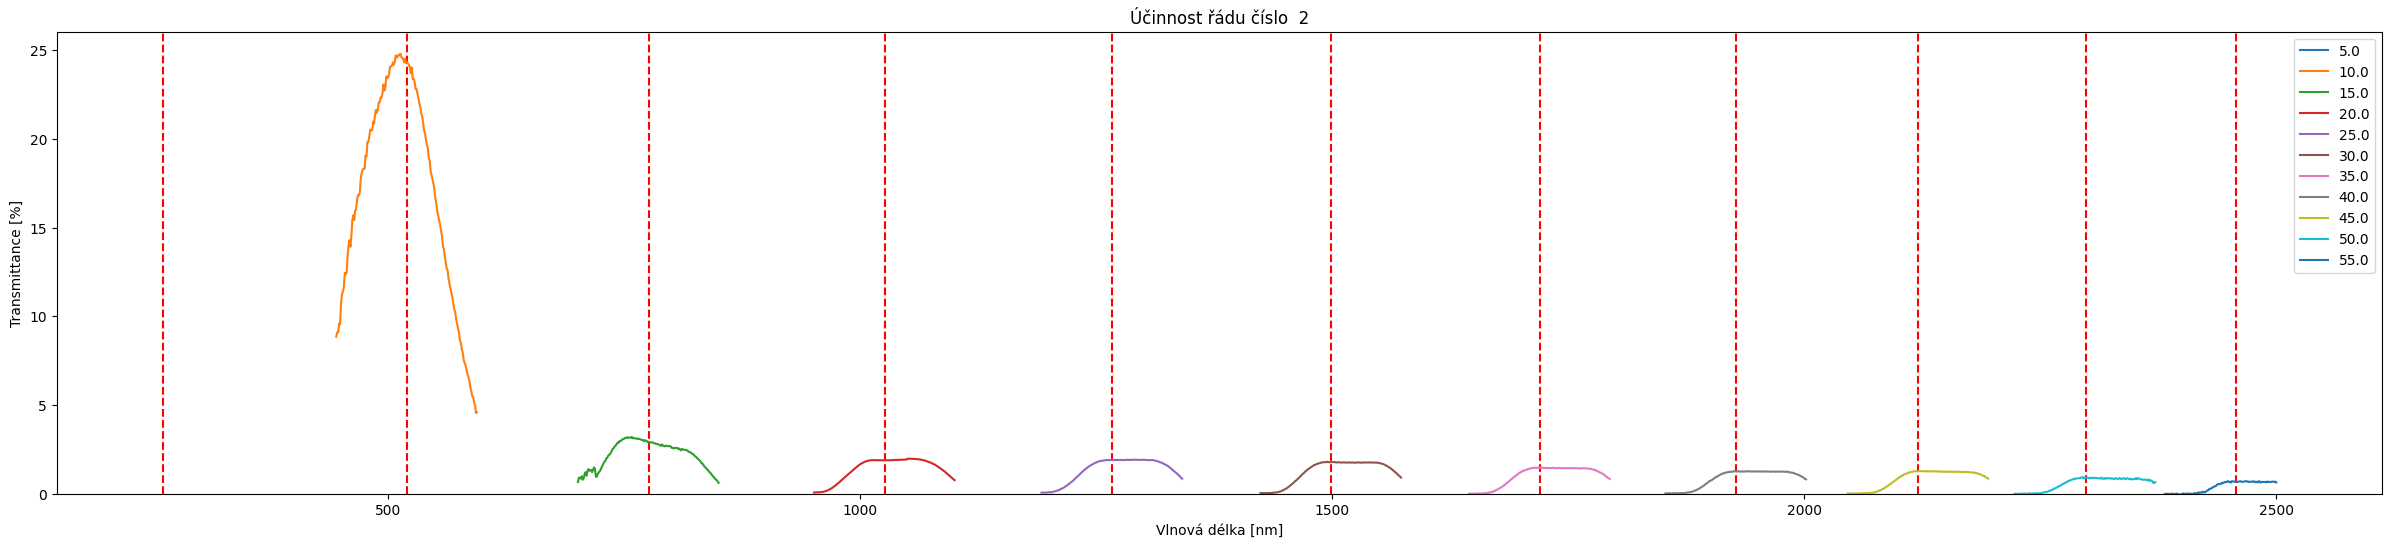

3


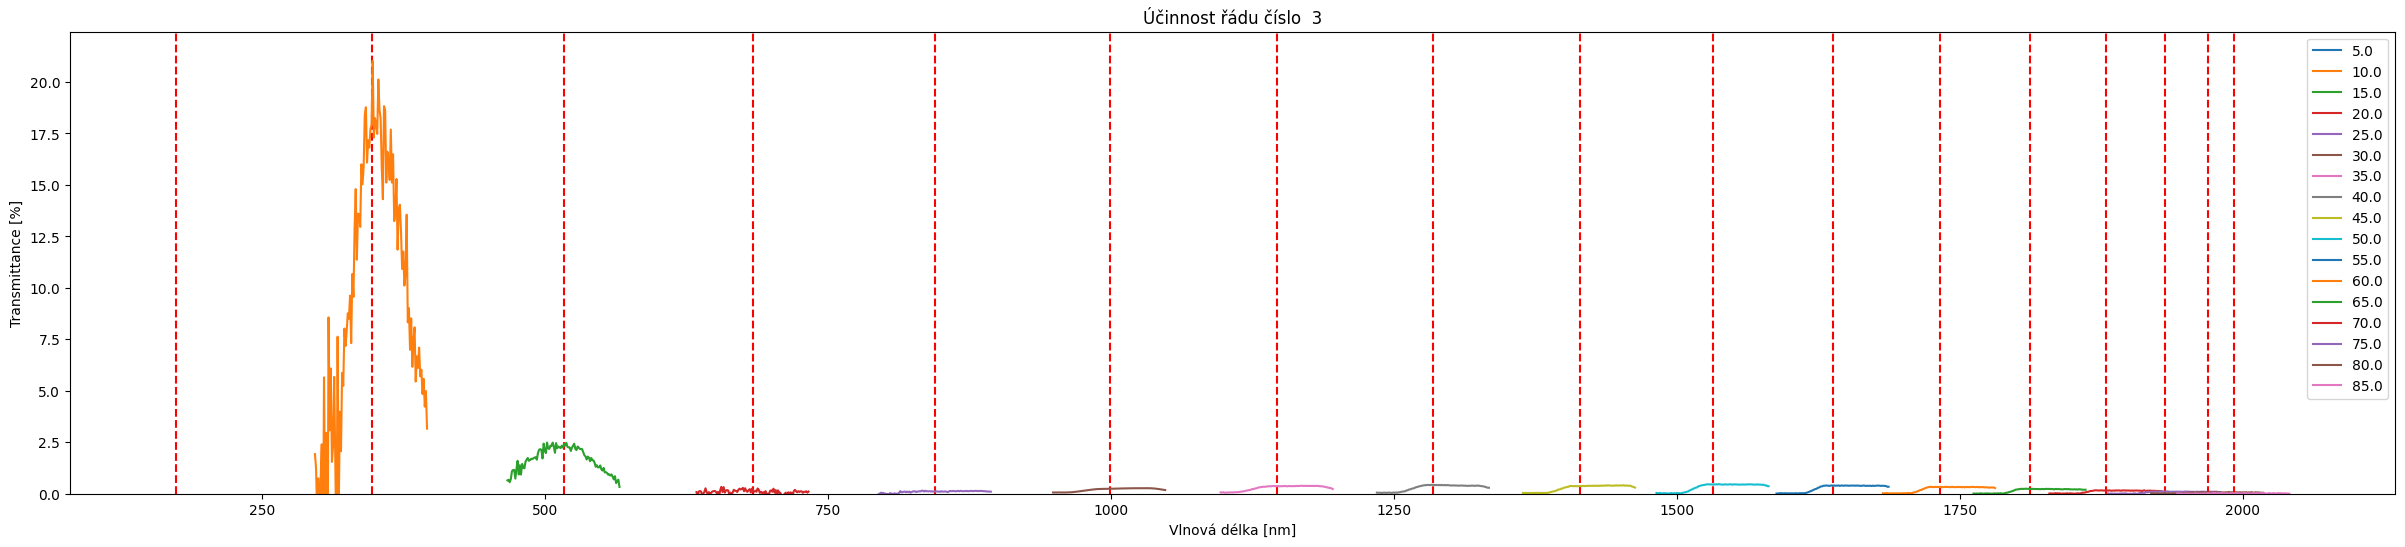

4


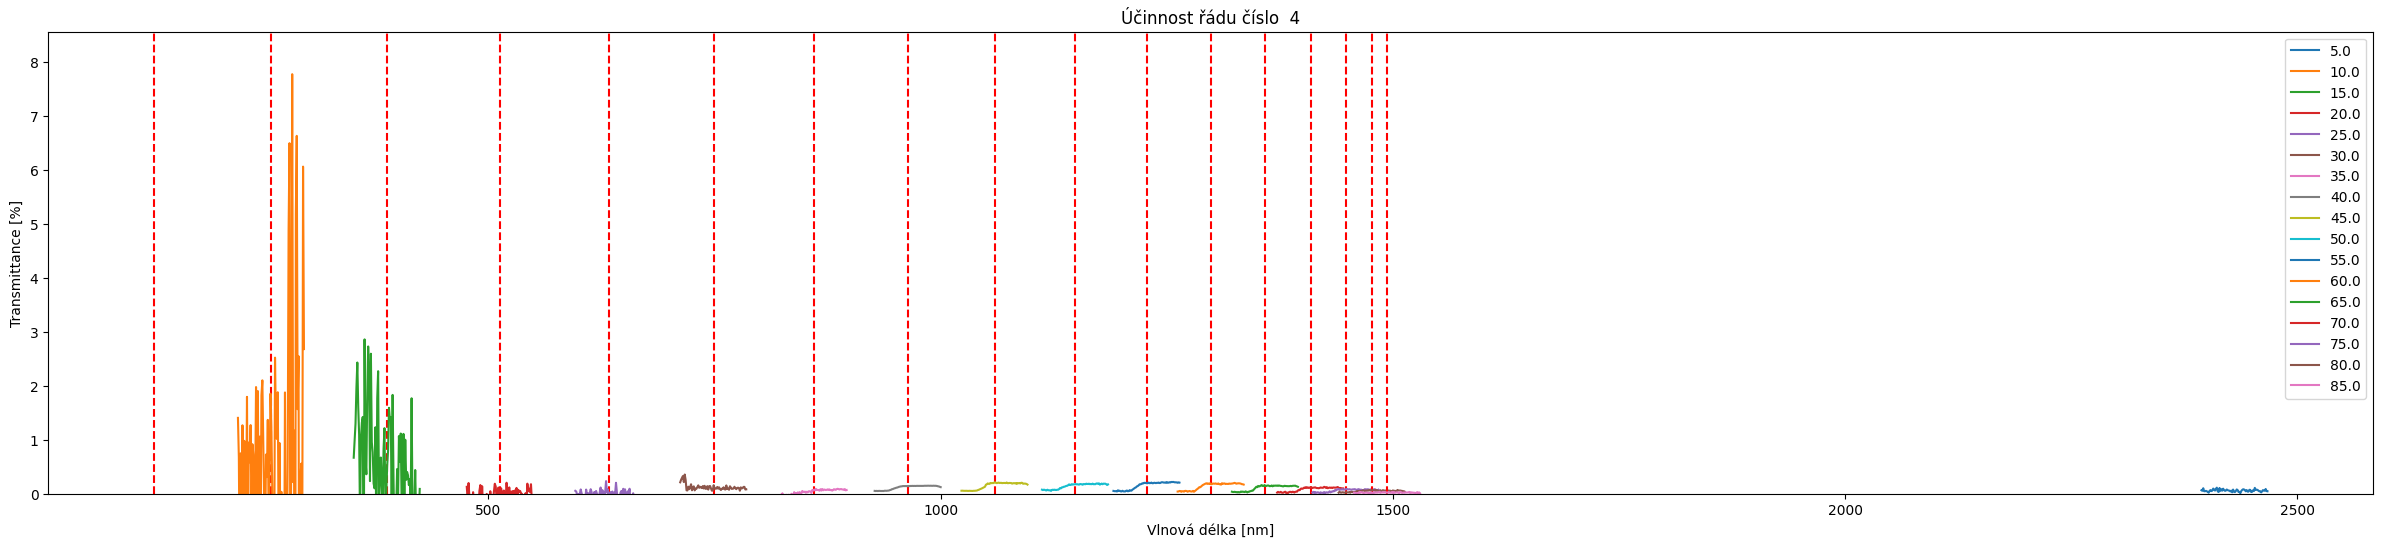

5


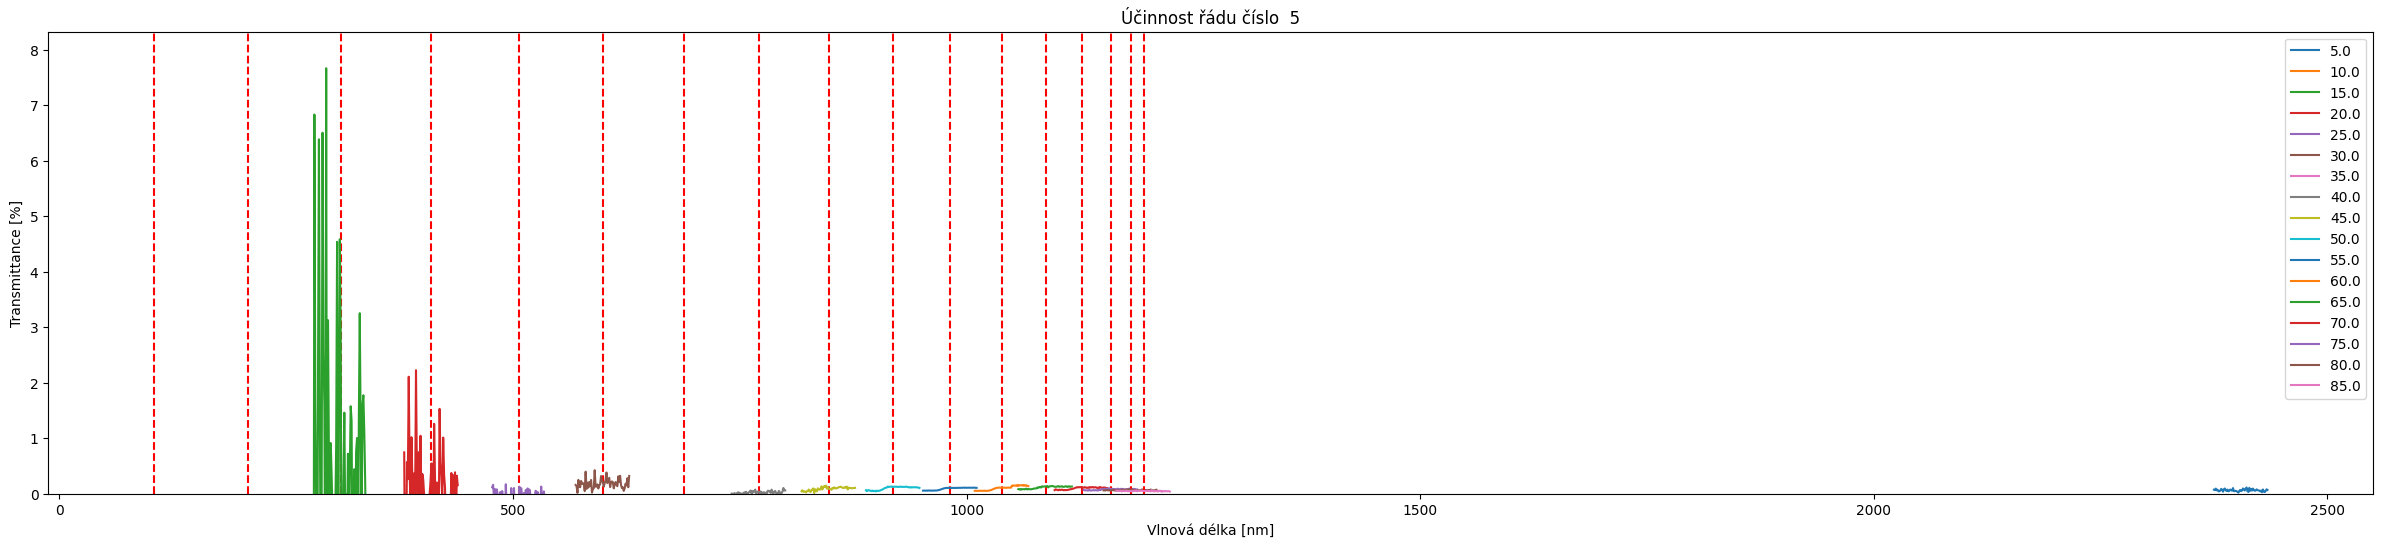

6


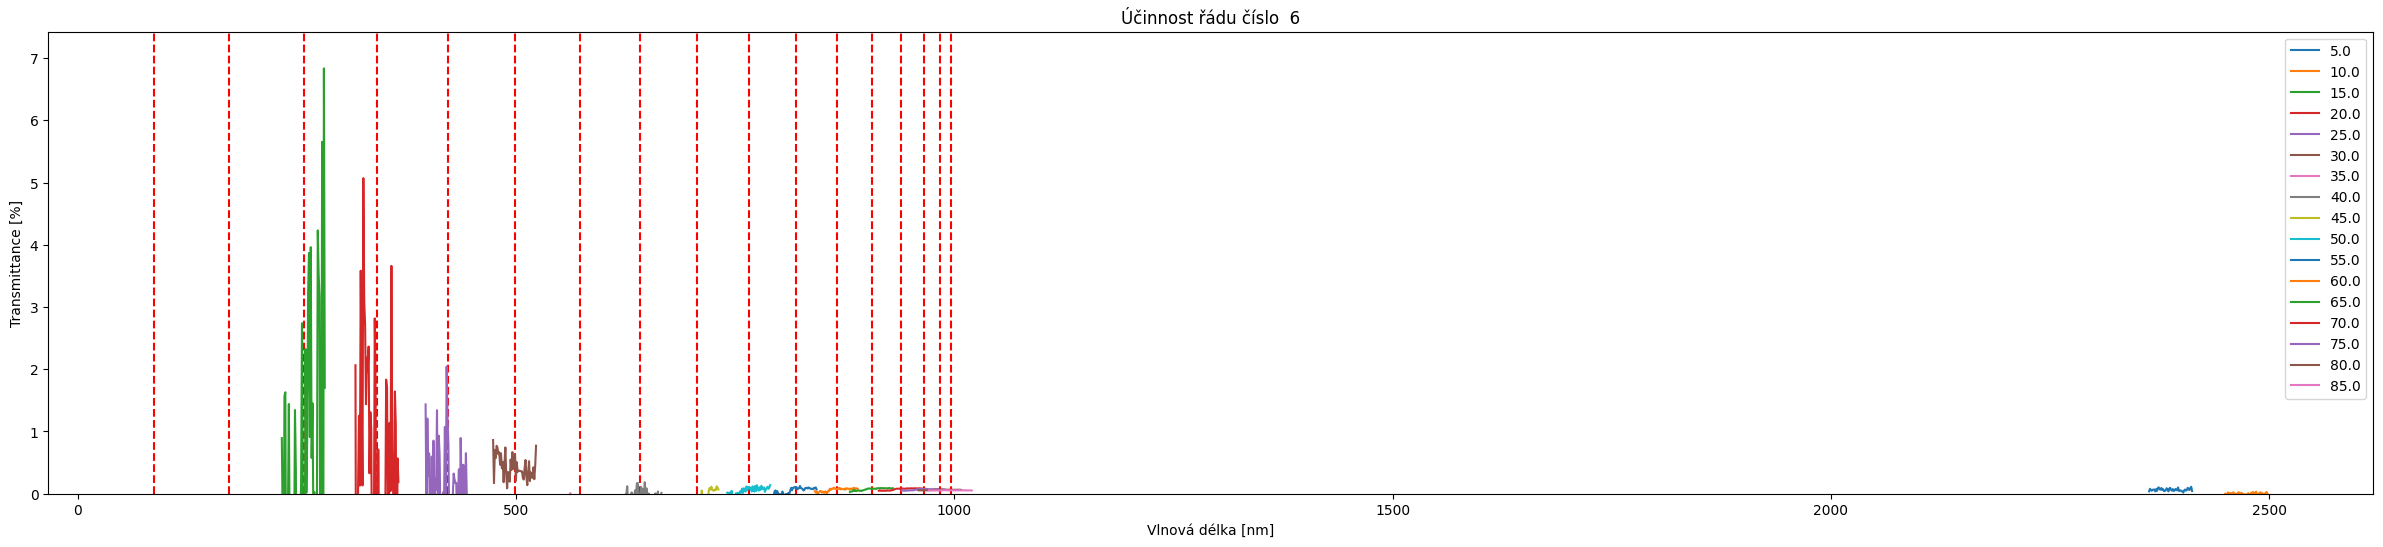

7


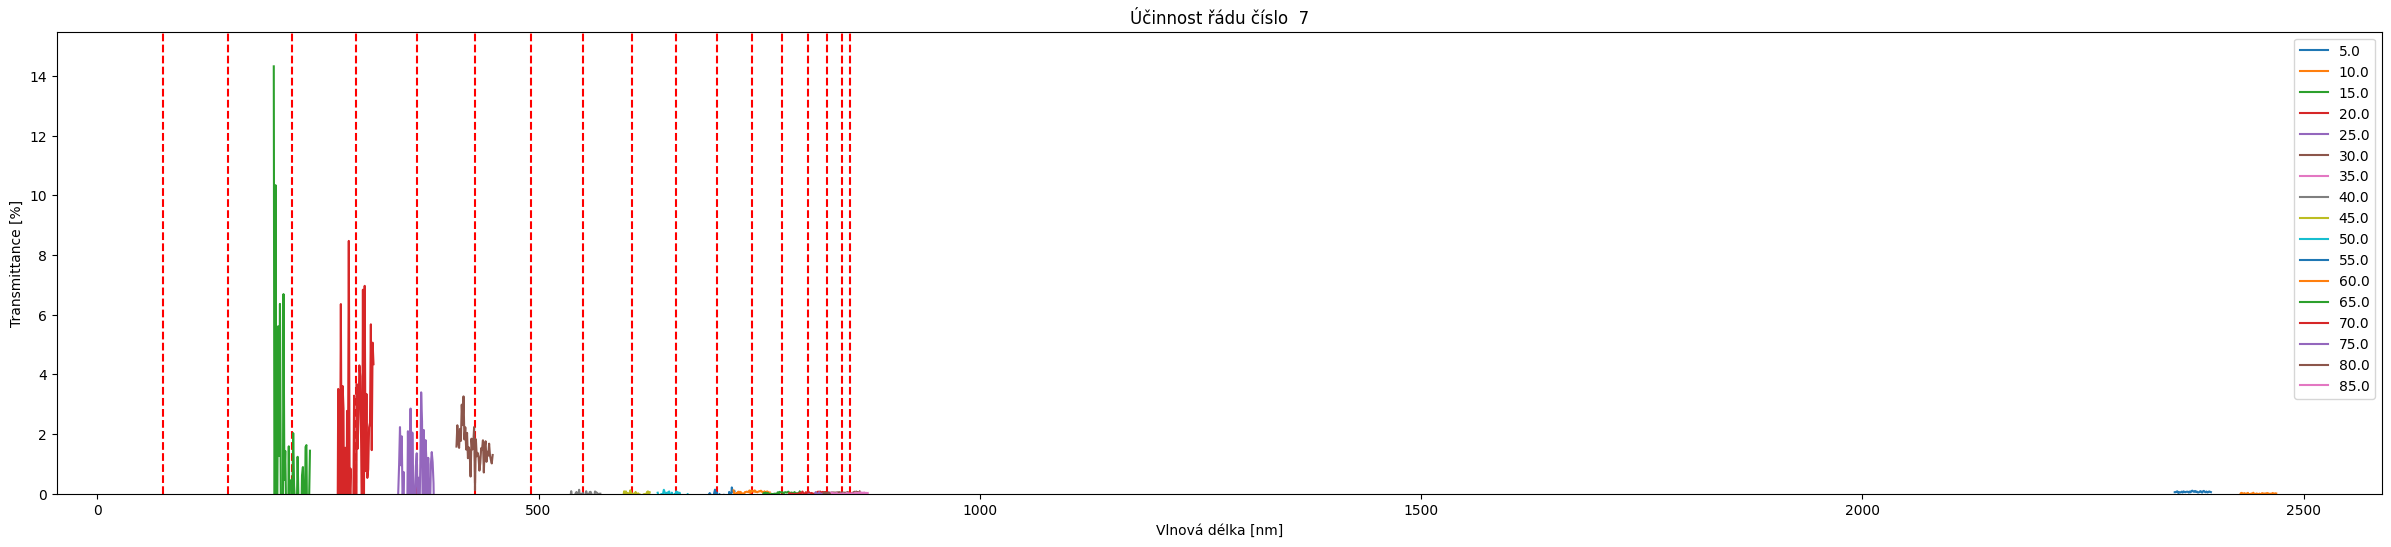

0.017180937123353023


In [13]:
keys = 'Collect1{0.00{0.00{30.00{}Collect2{0.00{0.00{35.00{}Collect3{0.00{0.00{40.00{}Collect4{0.00{0.00{45.00{}Collect5{0.00{0.00{50.00{}Collect6{0.00{0.00{55.00{}Collect7{0.00{0.00{60.00{}Collect8{0.00{0.00{65.00{}Collect9{0.00{0.00{70.00{}Collect10{0.00{0.00{75.00{}Collect11{0.00{0.00{80.00{}Collect12{0.00{0.00{85.00{}Collect13{0.00{0.00{90.00{}Collect14{0.00{0.00{95.00{}Collect15{0.00{0.00{100.00{}Collect16{0.00{0.00{105.00{}Collect17{0.00{0.00{110.00{}Collect18{0.00{0.00{115.00{}Collect19{0.00{0.00{120.00{}Collect20{0.00{0.00{125.00{}Collect21{0.00{0.00{130.00{}Collect22{0.00{0.00{135.00{}Collect23{0.00{0.00{140.00{}Collect24{0.00{0.00{145.00{}Collect25{0.00{0.00{150.00{}Collect26{0.00{0.00{155.00{}Collect27{0.00{0.00{160.00{}Collect28{0.00{0.00{165.00{}Collect29{0.00{0.00{170.00{}Collect30{0.00{0.00{175.00{}Collect31{0.00{0.00{180.00{}Collect32{0.00{0.00{-175.00{}Collect33{0.00{0.00{-170.00{}Collect34{0.00{0.00{-165.00{}Collect35{0.00{0.00{-160.00{}Collect36{0.00{0.00{-155.00{}Collect37{0.00{0.00{-150.00{}Collect38{0.00{0.00{-145.00{}Collect39{0.00{0.00{-140.00{}Collect40{0.00{0.00{-135.00{}Collect41{0.00{0.00{-130.00{}Collect42{0.00{0.00{-125.00{}Collect43{0.00{0.00{-120.00{}Collect44{0.00{0.00{-115.00{}Collect45{0.00{0.00{-110.00{}Collect46{0.00{0.00{-105.00{}Collect47{0.00{0.00{-100.00{}Collect48{0.00{0.00{-95.00{}Collect49{0.00{0.00{-90.00{}Collect50{0.00{0.00{-85.00{}Collect51{0.00{0.00{-80.00{}Collect52{0.00{0.00{-75.00{}Collect53{0.00{0.00{-70.00{}Collect54{0.00{0.00{-65.00{}Collect55{0.00{0.00{-60.00{}Collect56{0.00{0.00{-55.00{}Collect57{0.00{0.00{-50.00{}Collect58{0.00{0.00{-45.00{}Collect59{0.00{0.00{-40.00{}Collect60{0.00{0.00{-35.00{}'
keys = keys.split('{}')[:-1]
angles = [float((x.split('{')[-1])) for x in keys]
print(angles)
trans_angles = [float((x.split('{')[-1])) for x in keys if np.abs(float((x.split('{')[-1])))>90]
trans_angles = [x+180 if x<0 else x-180 for x in trans_angles]
reflx_angles = [float((x.split('{')[-1])) for x in keys if np.abs(float((x.split('{')[-1])))<90]
trans_keys = [x.split('{')[0] for x in keys if np.abs(float((x.split('{')[-1])))>90]
nillt = 'Collect31'
print(nillt)
reflx_keys = [x.split('{')[0]+'_'+x.split('{')[-1] for x in keys if np.abs(float((x.split('{')[-1])))<90]
print(trans_angles)
print(reflx_angles)
#trans spectra
efic = Diffraction_efficiency(200, 2500,30, 30, 6000, 8e-9, 0)
for m in range(-7,8):
    print(m)
    plt.figure(figsize=(30,6))
    if m == 0:
        wave = pd.to_numeric(df[nillt], errors='coerce')
        wave = list(wave.dropna().astype(float))[::-1]
        intensity = pd.to_numeric(df[nillt+'_intensity'], errors='coerce')
        total = total + len(intensity)
        intensity = list(intensity.dropna().astype(float))[::-1]
        useful = useful + len(intensity)
        plt.plot(wave, intensity,label = angle)
    else:
        wavelengths = 6000*np.sin((np.array(trans_angles))*np.pi/180)/m
        #print(trans_angles)
        #print(wavelengths)
        wavelengths = [int(w) if w>00 and w<2500 else 0 for w in wavelengths]
        columns = trans_keys
        env_wav = []
        env_int = []
        for w, column, angle in zip(wavelengths, columns, trans_angles):
            if w == 0: continue
            i = w - 200
            plt.axvline(x=w, color='red', linestyle='--')
            # correction for different angles
            start = i-int(50/(abs(m)/3))
            stop = i+int(50/(abs(m)/3))
            wave = pd.to_numeric(df[column], errors='coerce')
            wave = list(wave.dropna().astype(float))[::-1]
            wave = wave[start:stop]
            intensity = pd.to_numeric(df[column+'_intensity'], errors='coerce')
            total = total + len(intensity)
            intensity = list(intensity.dropna().astype(float))[::-1]
            intensity = intensity[start:stop]
            useful = useful + len(intensity)
            plt.plot(wave, intensity,label = angle)
            #index = intensity.index(max(intensity))
            #env_wav.append(wave[index])
            #env_int.append(intensity[index])
        plt.plot(env_wav, env_int)
    #envelope = transmittances[m+3]
    #plt.plot(envelope.wave, envelope.intens*100, 'o-', color = 'black', label = 'COMSOL model')
    model = efic.order(m)
    #plt.plot(model[0], model[1], label = 'my model')
    #plt.xlim(None,None)
    plt.ylim(0,None)
    plt.ylabel('Transmittance [%]')
    plt.xlabel('Vlnová délka [nm]')
    plt.title('Účinnost řádu číslo  ' + str(m))
    plt.legend()
    plt.savefig('Trans'+str(m), bbox_inches='tight')
    plt.show()
    
print(useful/total)

In [14]:

old_columns = list(df.columns)
new_columns = [old_columns[i] if i%2==0 else old_columns[i-1]+'_intensity' for i in range(len(old_columns))]
df.columns = new_columns
reduced_columns = [col for col in new_columns if 'Collect' in col]
df = df[reduced_columns]
display(df)

Collect1 Collect1_intensity         Collect2 Collect2_intensity  \
0     Wavelength (nm)                 %R  Wavelength (nm)                 %R   
1                2500      -0.0257936772             2500    -0.006729053799   
2                2499     -0.01153991278             2499    -0.008592389524   
3                2498     -0.02355778031             2498      0.01411040407   
4                2497       -0.035397131             2497     -0.02420957386   
...               ...                ...              ...                ...   
5324              NaN                NaN              NaN                NaN   
5325              NaN                NaN              NaN                NaN   
5326              NaN                NaN              NaN                NaN   
5327              NaN                NaN              NaN                NaN   
5328              NaN                NaN              NaN                NaN   

             Collect3 Collect3_intensity         Collect4 Collect4_intensity  \
0     Wavelength (nm)                 %R  Wavelength (nm)                 %R   
1                2500     -0.01968658157             2500   -0.0006464772741   
2                2499      0.03202947602             2499      0.02335040271   
3                2498     0.003867836203             2498      0.04558468238   
4                2497      0.01528253313             2497      0.01226398628   
...               ...                ...              ...                ...   
5324              NaN                NaN              NaN                NaN   
5325              NaN                NaN              NaN                NaN   
5326              NaN                NaN              NaN                NaN   
5327              NaN                NaN              NaN                NaN   
5328              NaN                NaN              NaN                NaN   

             Collect5 Collect5_intensity  ...        Collect56  \
0     Wavelength (nm)                 %R  ...  Wavelength (nm)   
1                2500      0.02177211829  ...             2500   
2                2499     -0.02157764509  ...             2499   
3                2498      0.03040547855  ...             2498   
4                2497     -0.02213585936  ...             2497   
...               ...                ...  ...              ...   
5324              NaN                NaN  ...              NaN   
5325              NaN                NaN  ...              NaN   
5326              NaN                NaN  ...              NaN   
5327              NaN                NaN  ...              NaN   
5328              NaN                NaN  ...              NaN   

     Collect56_intensity        Collect57 Collect57_intensity  \
0                     %R  Wavelength (nm)                  %R   
1           0.3285849094             2500      -0.01762718335   
2           0.3457642794             2499      -0.07348755747   
3           0.3541533649             2498      -0.01145810261   
4            0.365114361             2497     -0.003073983593   
...                  ...              ...                 ...   
5324                 NaN              NaN                 NaN   
5325                 NaN              NaN                 NaN   
5326                 NaN              NaN                 NaN   
5327                 NaN              NaN                 NaN   
5328                 NaN              NaN                 NaN   

            Collect58 Collect58_intensity        Collect59  \
0     Wavelength (nm)                  %R  Wavelength (nm)   
1                2500      0.005436519627             2500   
2                2499      -0.01272685919             2499   
3                2498      -0.04359832406             2498   
4                2497        0.0273152031             2497   
...               ...                 ...              ...   
5324              NaN                 NaN              NaN   
5325              NaN

# Reflection

[30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 170.0, 175.0, 180.0, -175.0, -170.0, -165.0, -160.0, -155.0, -150.0, -145.0, -140.0, -135.0, -130.0, -125.0, -120.0, -115.0, -110.0, -105.0, -100.0, -95.0, -90.0, -85.0, -80.0, -75.0, -70.0, -65.0, -60.0, -55.0, -50.0, -45.0, -40.0, -35.0]
Collect31
[-85.0, -80.0, -75.0, -70.0, -65.0, -60.0, -55.0, -50.0, -45.0, -40.0, -35.0, -30.0, -25.0, -20.0, -15.0, -10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0]
[30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, -85.0, -80.0, -75.0, -70.0, -65.0, -60.0, -55.0, -50.0, -45.0, -40.0, -35.0]
-7


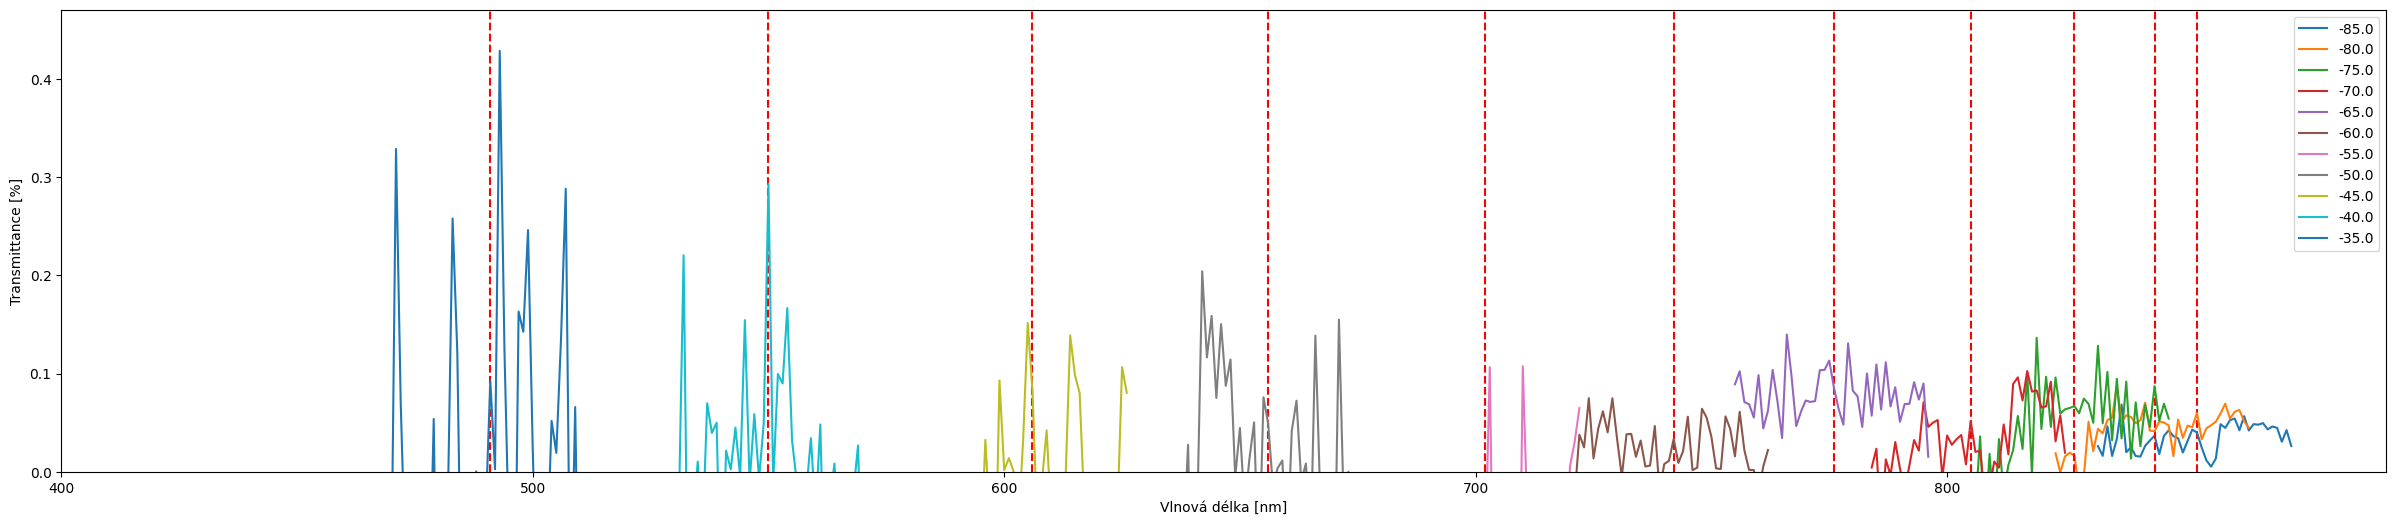

-6


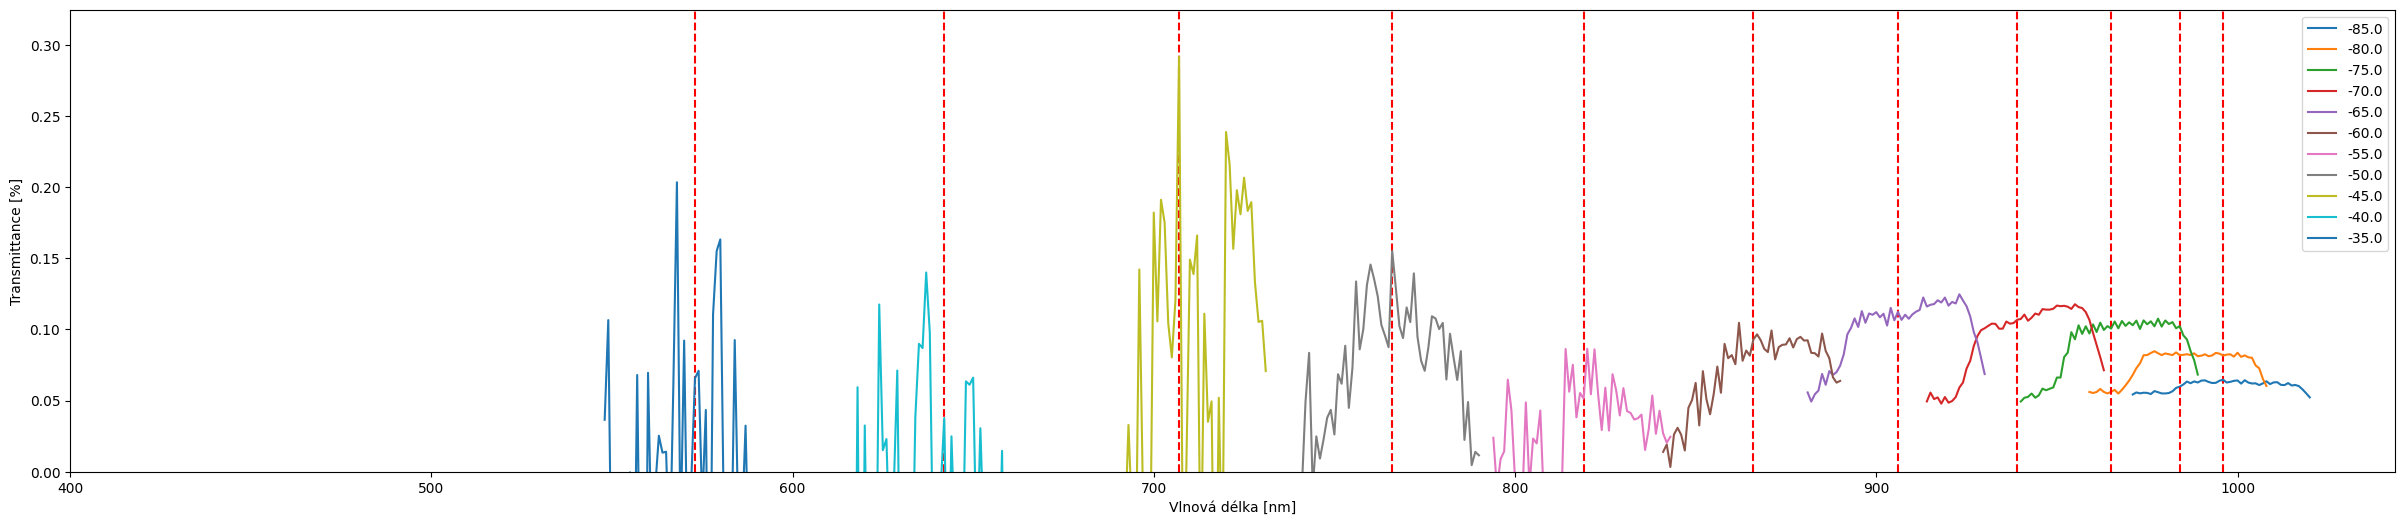

-5


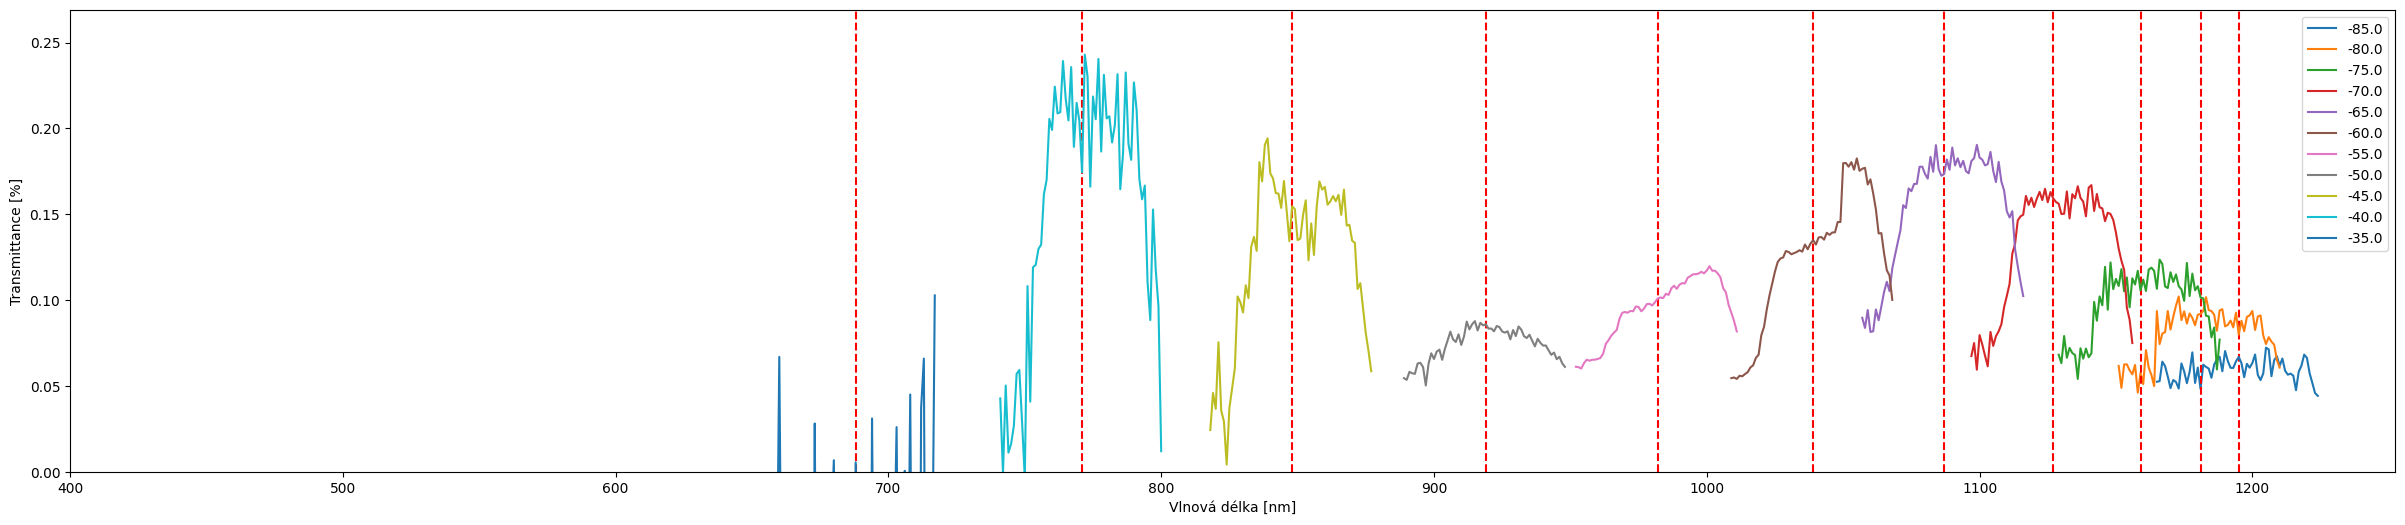

-4


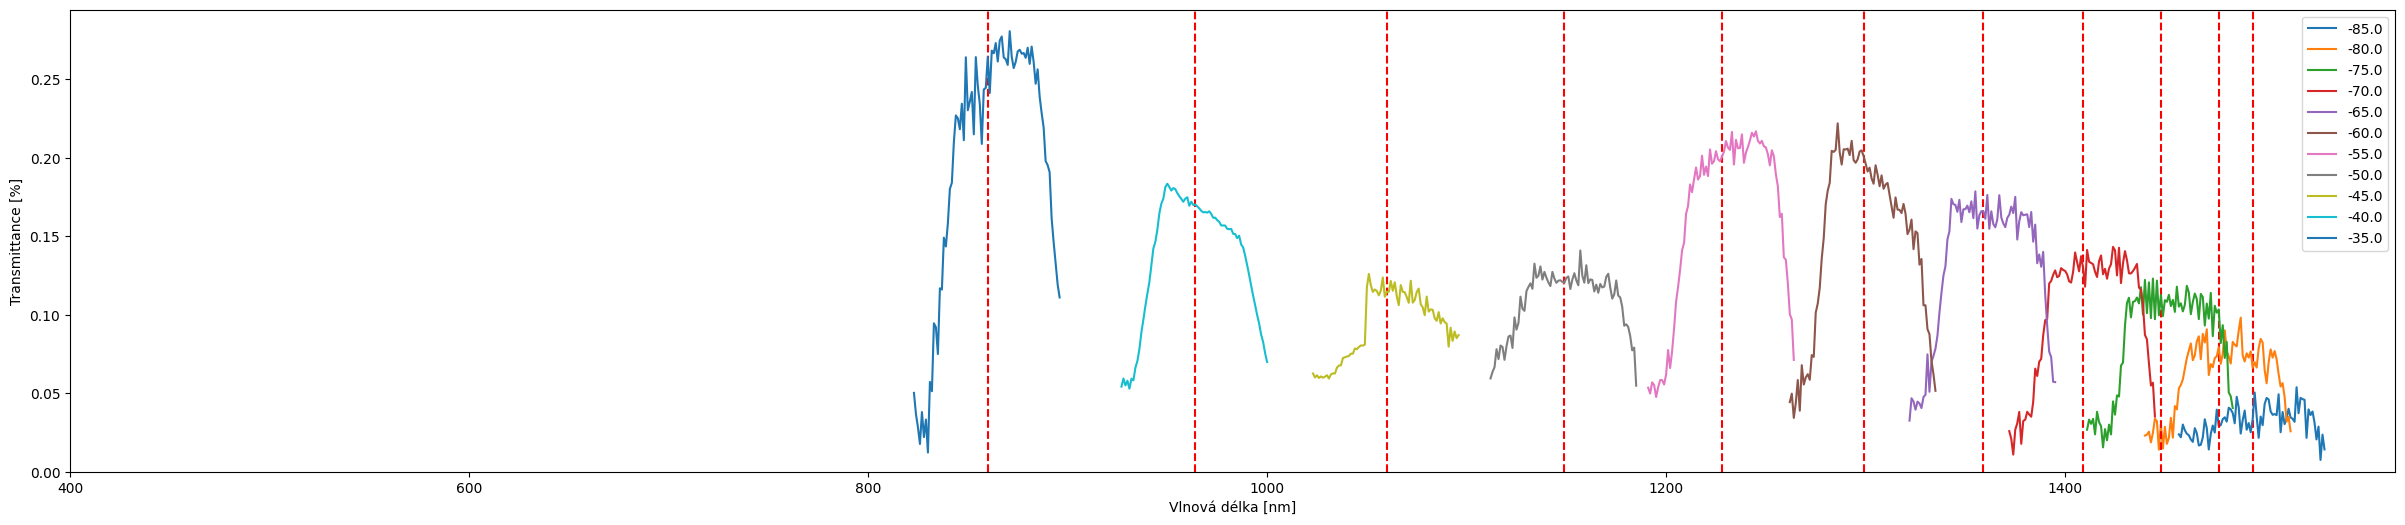

-3


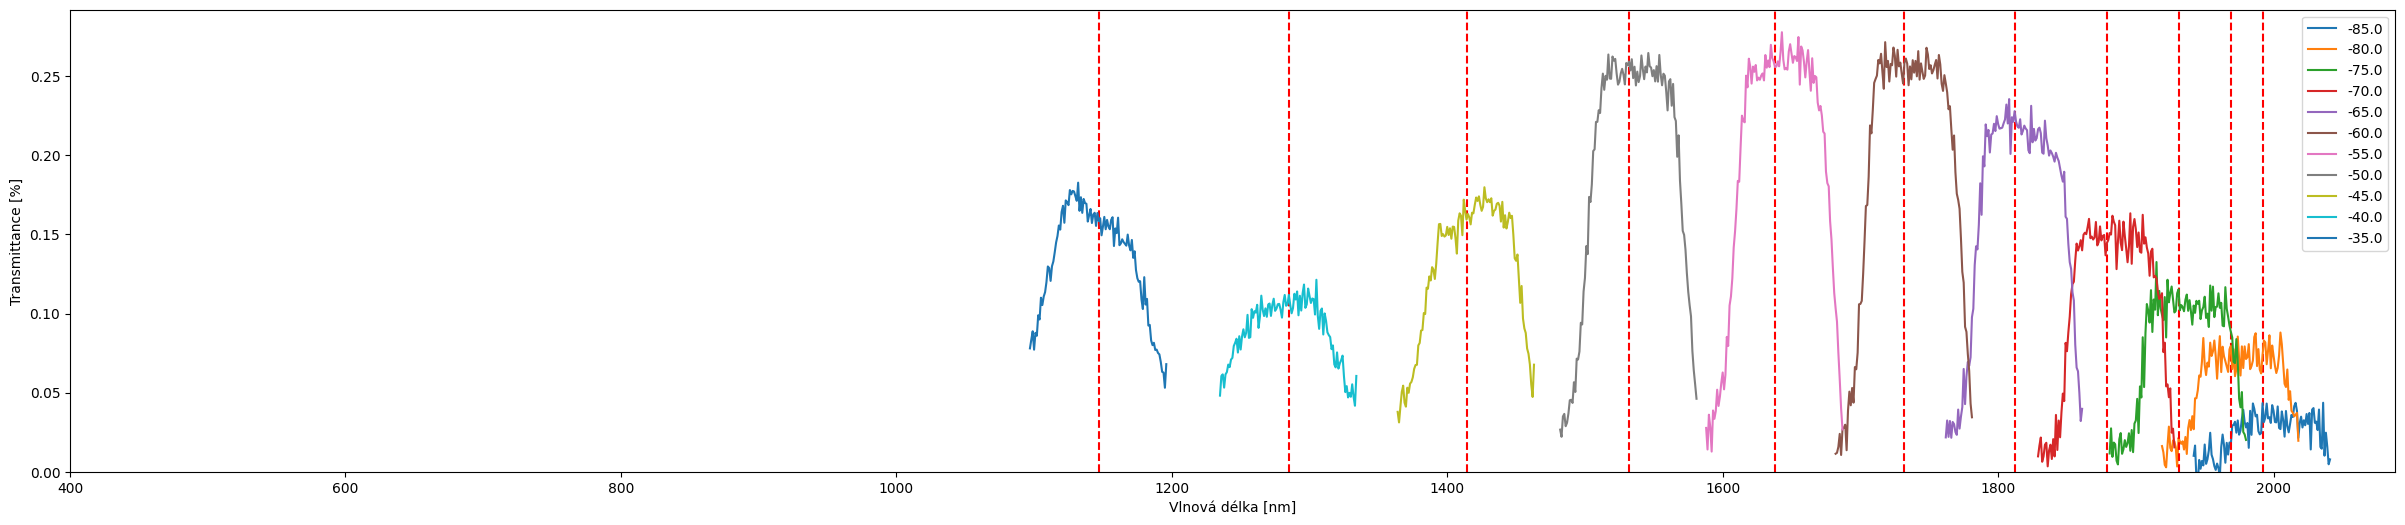

-2


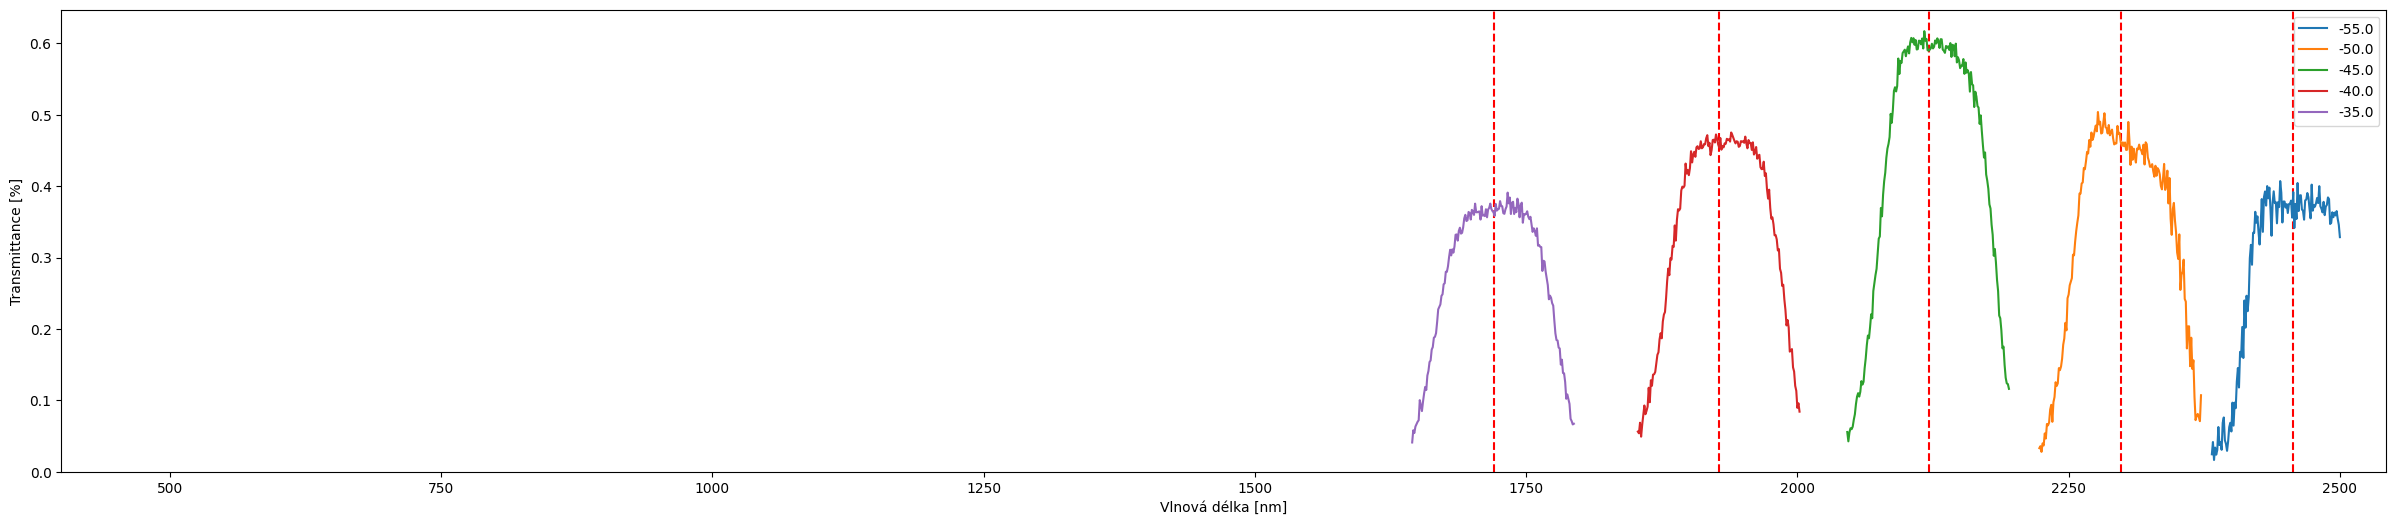

-1


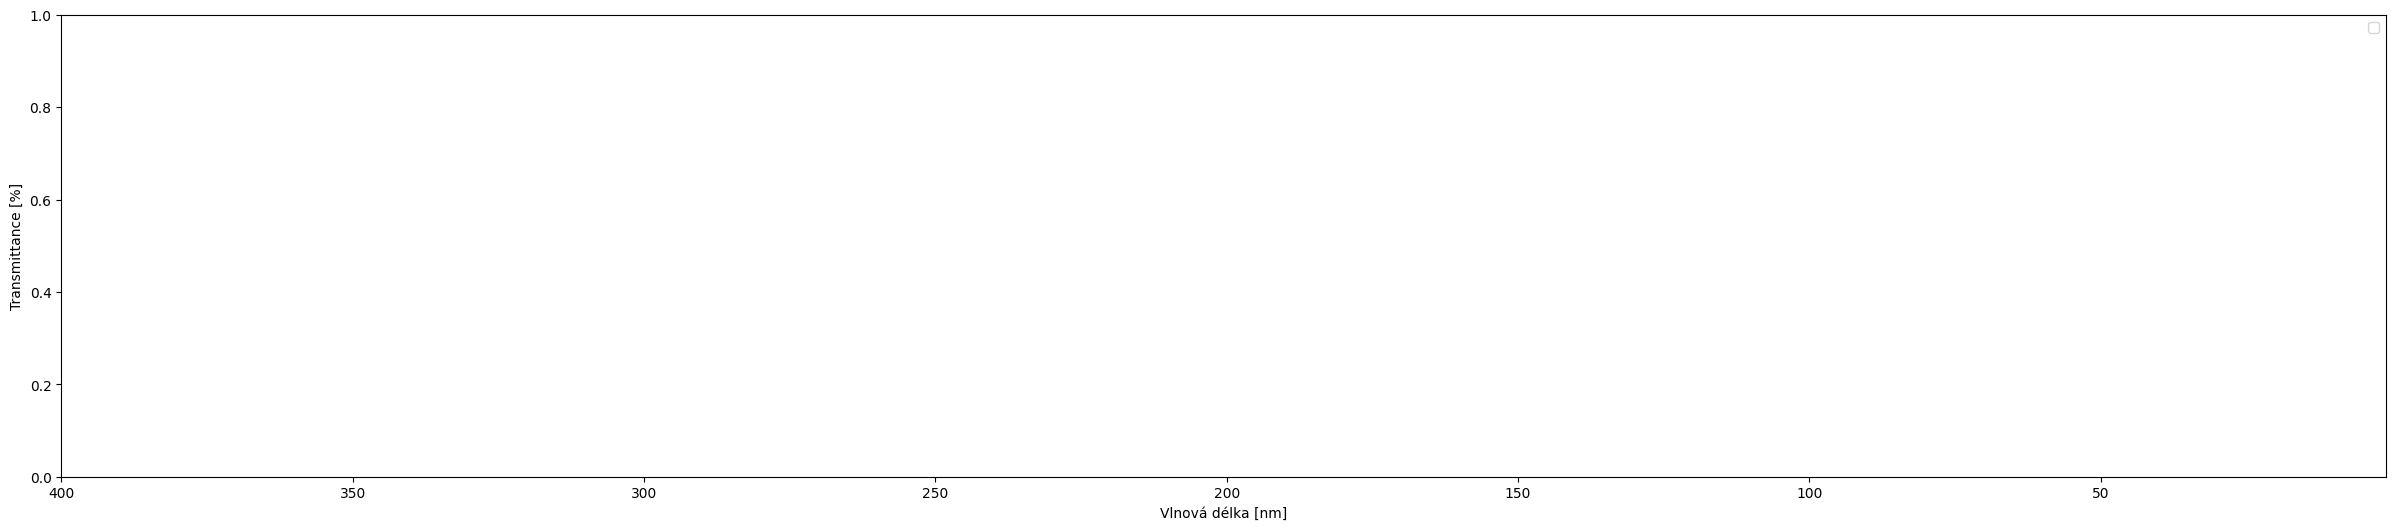

0
1


<Figure size 3000x600 with 0 Axes>

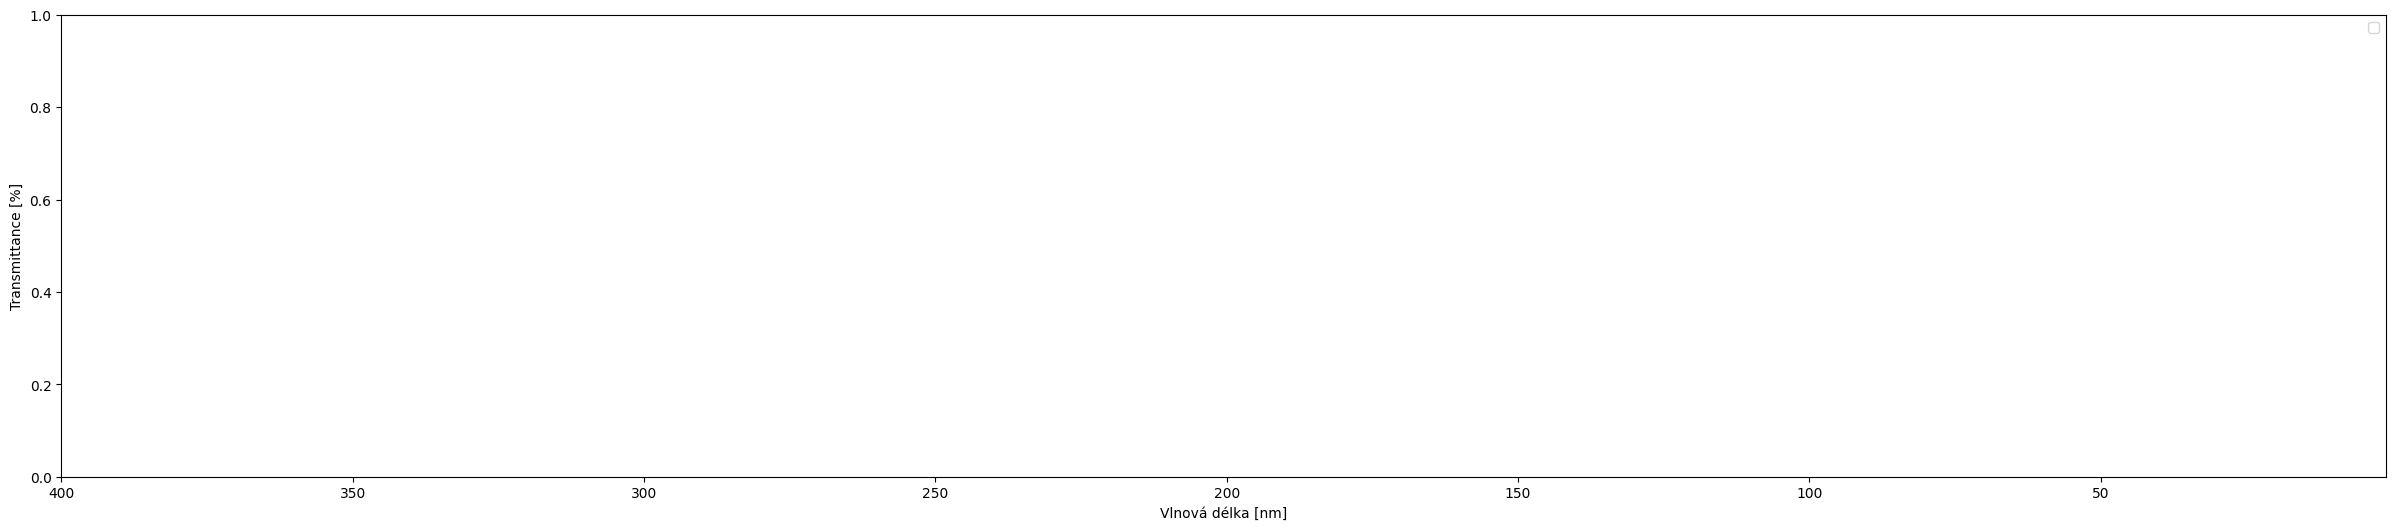

2


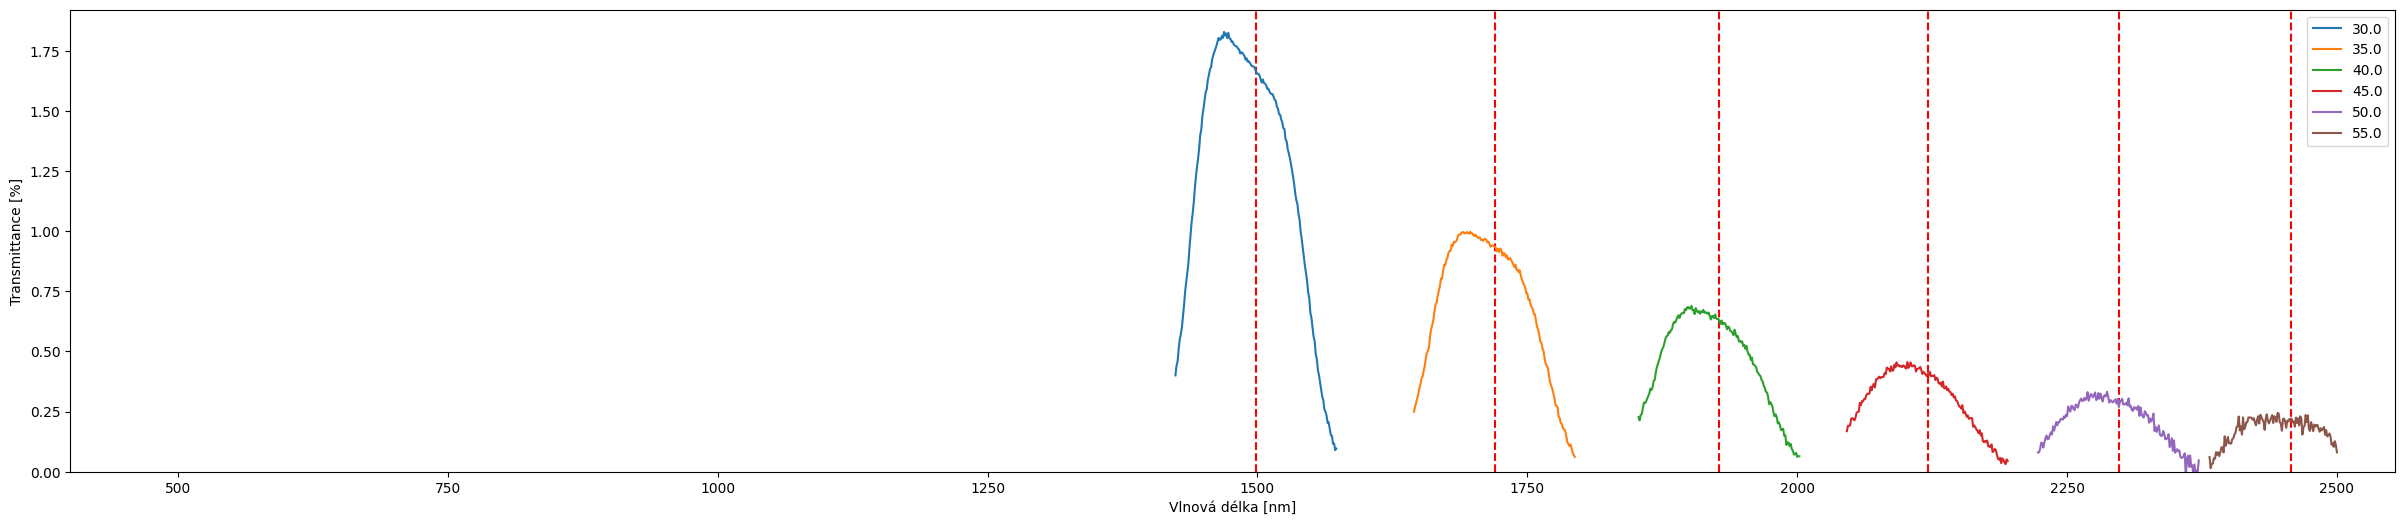

3


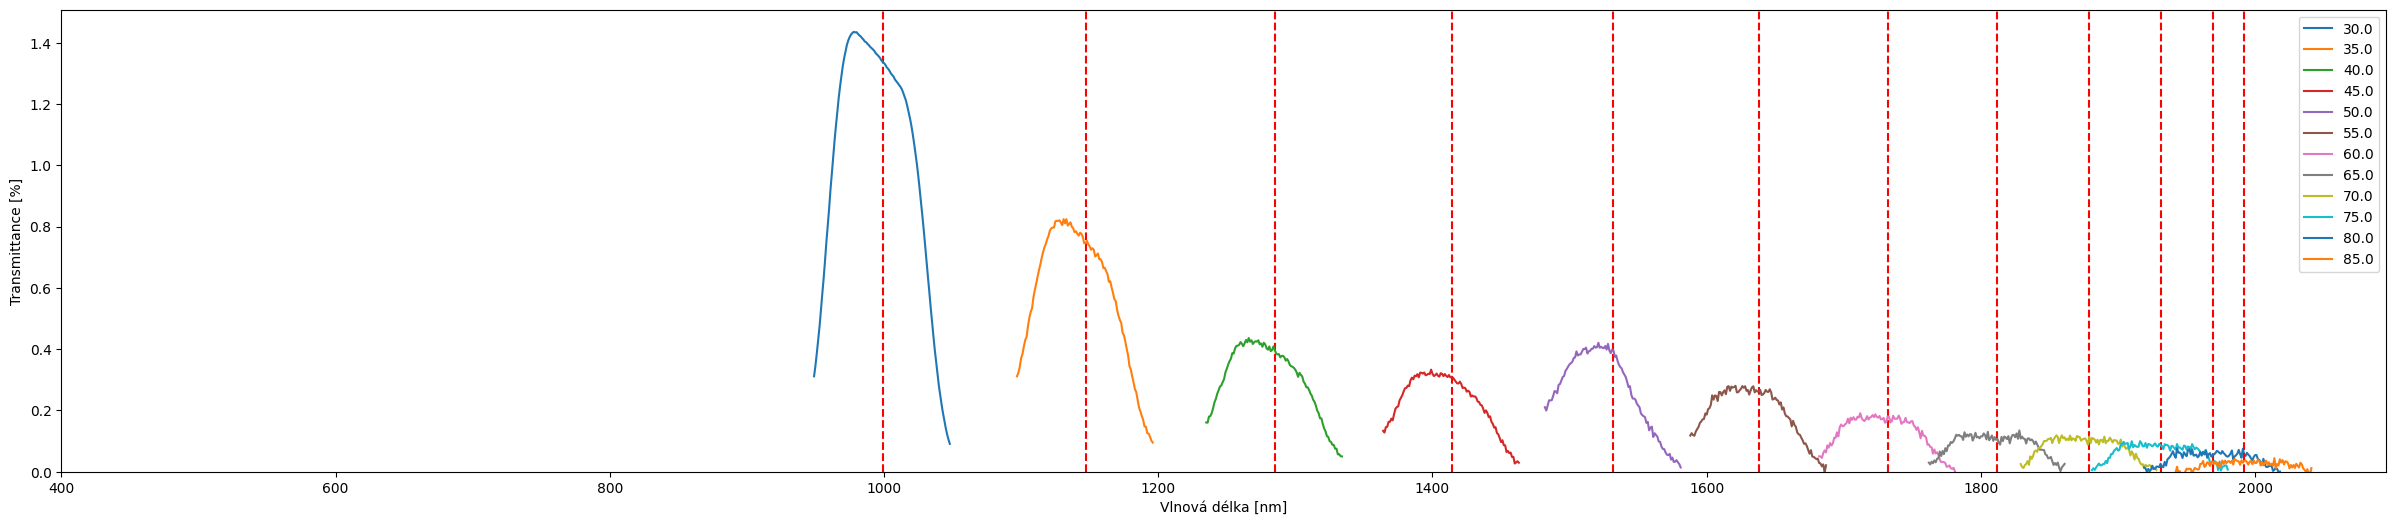

4


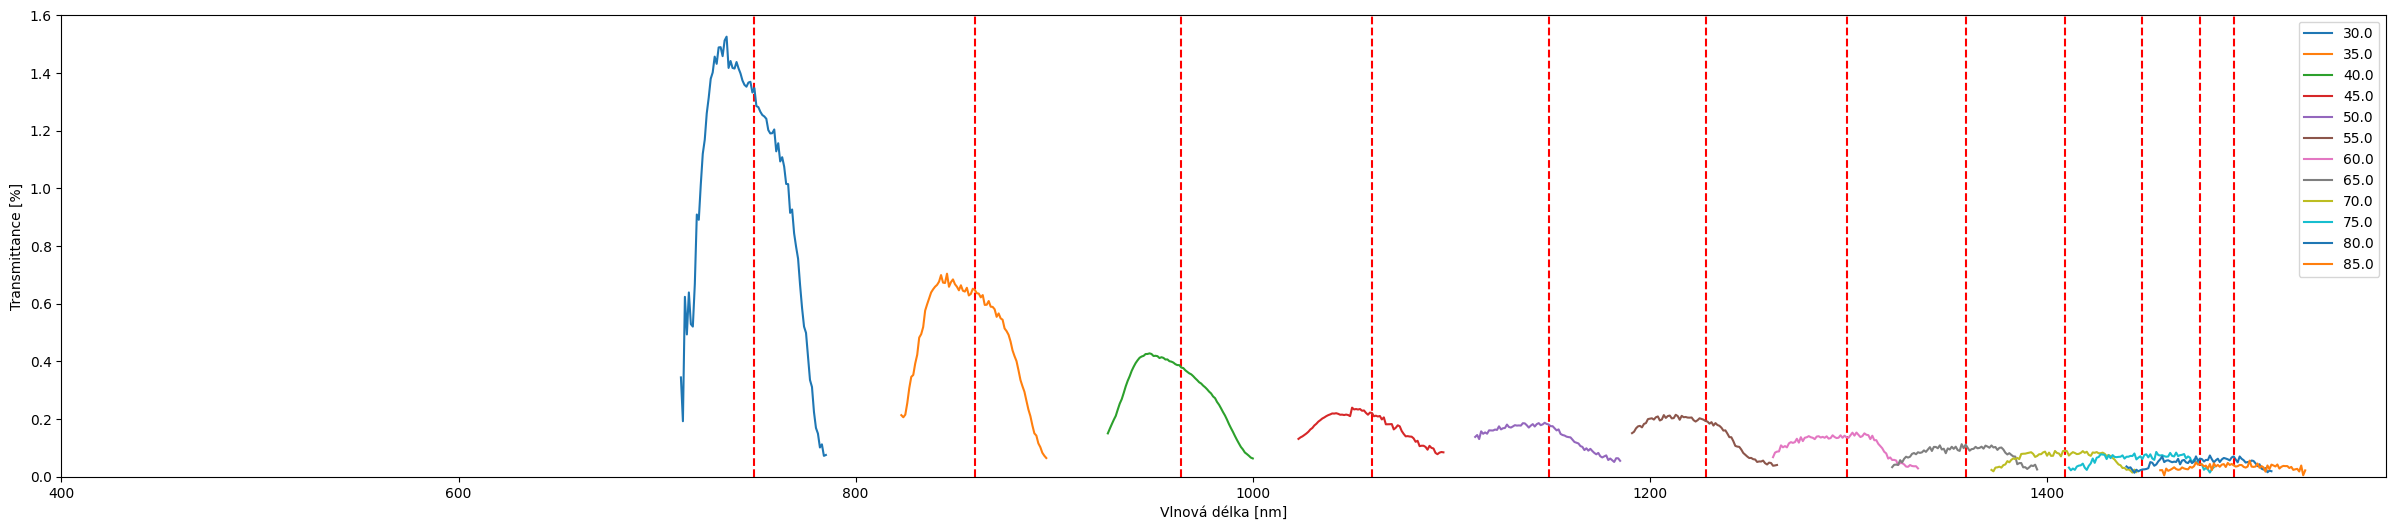

5


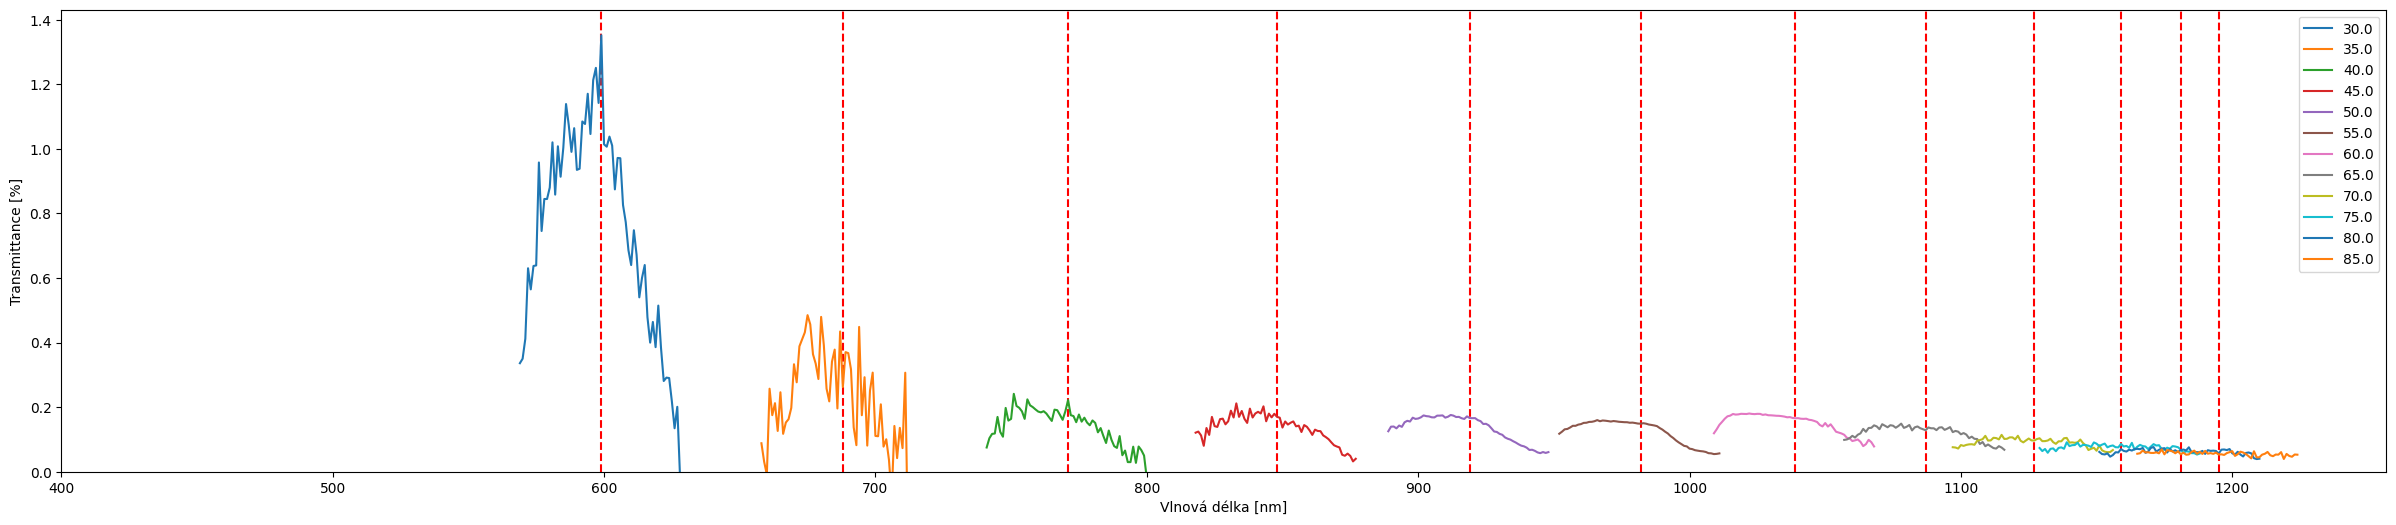

6


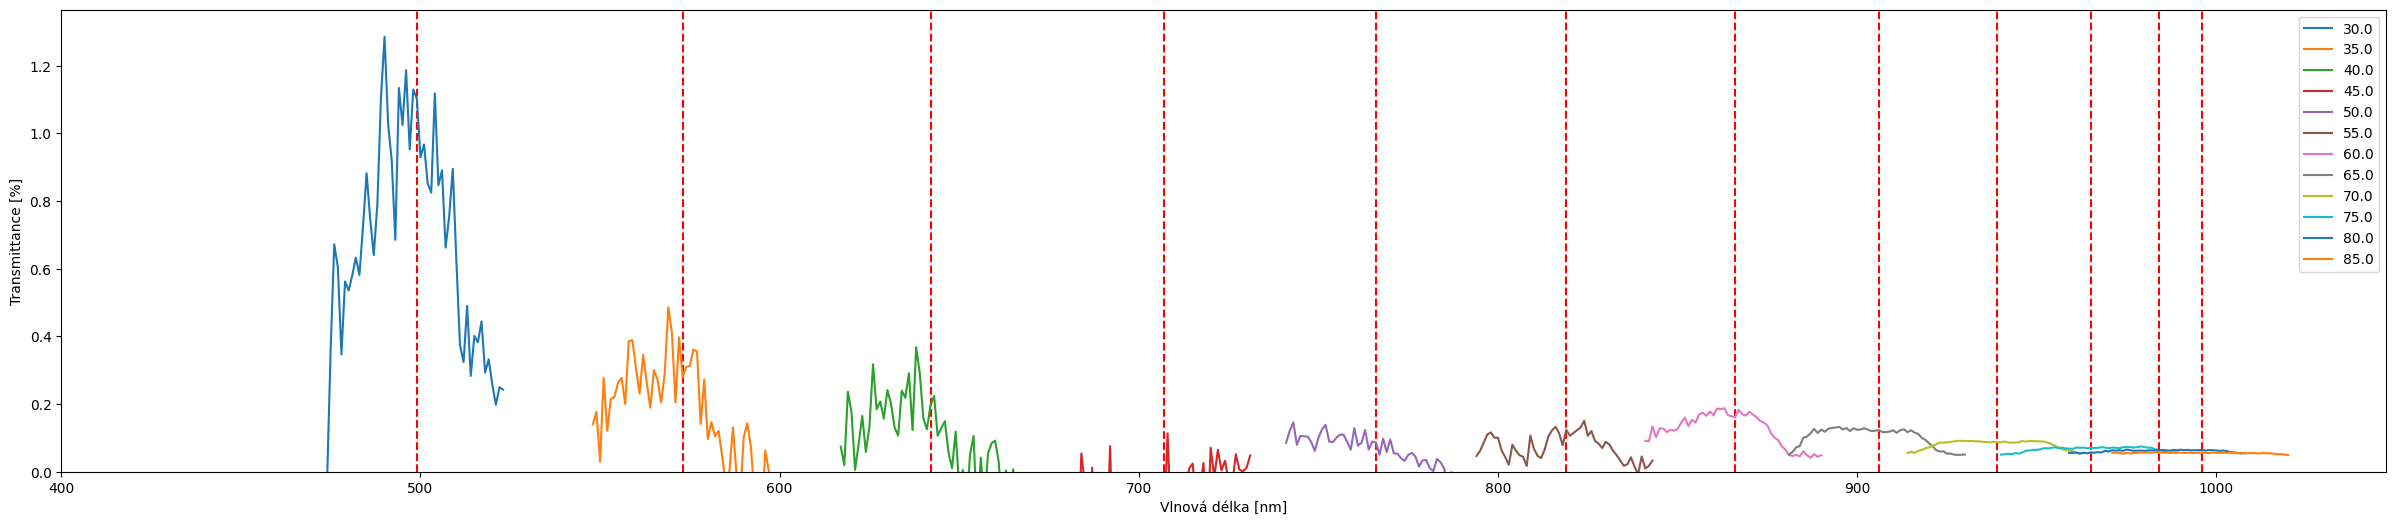

7


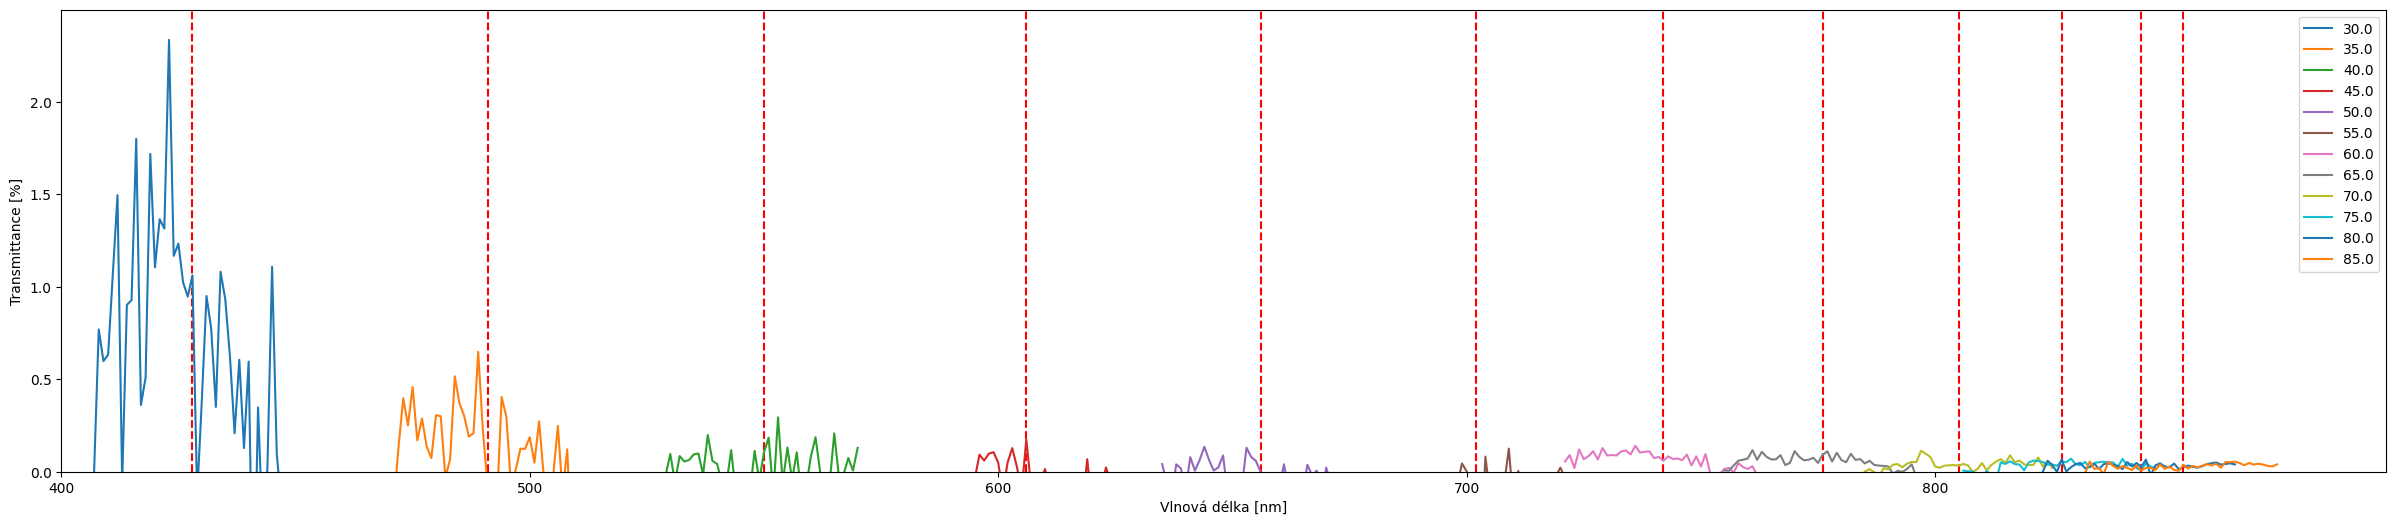

In [15]:
keys = 'Collect1{0.00{0.00{30.00{}Collect2{0.00{0.00{35.00{}Collect3{0.00{0.00{40.00{}Collect4{0.00{0.00{45.00{}Collect5{0.00{0.00{50.00{}Collect6{0.00{0.00{55.00{}Collect7{0.00{0.00{60.00{}Collect8{0.00{0.00{65.00{}Collect9{0.00{0.00{70.00{}Collect10{0.00{0.00{75.00{}Collect11{0.00{0.00{80.00{}Collect12{0.00{0.00{85.00{}Collect13{0.00{0.00{90.00{}Collect14{0.00{0.00{95.00{}Collect15{0.00{0.00{100.00{}Collect16{0.00{0.00{105.00{}Collect17{0.00{0.00{110.00{}Collect18{0.00{0.00{115.00{}Collect19{0.00{0.00{120.00{}Collect20{0.00{0.00{125.00{}Collect21{0.00{0.00{130.00{}Collect22{0.00{0.00{135.00{}Collect23{0.00{0.00{140.00{}Collect24{0.00{0.00{145.00{}Collect25{0.00{0.00{150.00{}Collect26{0.00{0.00{155.00{}Collect27{0.00{0.00{160.00{}Collect28{0.00{0.00{165.00{}Collect29{0.00{0.00{170.00{}Collect30{0.00{0.00{175.00{}Collect31{0.00{0.00{180.00{}Collect32{0.00{0.00{-175.00{}Collect33{0.00{0.00{-170.00{}Collect34{0.00{0.00{-165.00{}Collect35{0.00{0.00{-160.00{}Collect36{0.00{0.00{-155.00{}Collect37{0.00{0.00{-150.00{}Collect38{0.00{0.00{-145.00{}Collect39{0.00{0.00{-140.00{}Collect40{0.00{0.00{-135.00{}Collect41{0.00{0.00{-130.00{}Collect42{0.00{0.00{-125.00{}Collect43{0.00{0.00{-120.00{}Collect44{0.00{0.00{-115.00{}Collect45{0.00{0.00{-110.00{}Collect46{0.00{0.00{-105.00{}Collect47{0.00{0.00{-100.00{}Collect48{0.00{0.00{-95.00{}Collect49{0.00{0.00{-90.00{}Collect50{0.00{0.00{-85.00{}Collect51{0.00{0.00{-80.00{}Collect52{0.00{0.00{-75.00{}Collect53{0.00{0.00{-70.00{}Collect54{0.00{0.00{-65.00{}Collect55{0.00{0.00{-60.00{}Collect56{0.00{0.00{-55.00{}Collect57{0.00{0.00{-50.00{}Collect58{0.00{0.00{-45.00{}Collect59{0.00{0.00{-40.00{}Collect60{0.00{0.00{-35.00{}'
keys = keys.split('{}')[:-1]
angles = [float((x.split('{')[-1])) for x in keys]
print(angles)
trans_angles = [float((x.split('{')[-1])) for x in keys if np.abs(float((x.split('{')[-1])))>90]
trans_angles = [x+180 if x<0 else x-180 for x in trans_angles]
reflx_angles = [float((x.split('{')[-1])) for x in keys if np.abs(float((x.split('{')[-1])))<90]
trans_keys = [x.split('{')[0] for x in keys if np.abs(float((x.split('{')[-1])))>90]
nillt = 'Collect31'
print(nillt)
reflx_keys = [x.split('{')[0] for x in keys if np.abs(float((x.split('{')[-1])))<90]
print(trans_angles)
print(reflx_angles)
#trans spectra
for m in range(-7,8):
    print(m)
    plt.figure(figsize=(30,6))
    if m == 0: continue
    else:
        wavelengths = 6000*np.sin(np.array(reflx_angles)*np.pi/180)/m
        #print(trans_angles)
        #print(wavelengths)
        wavelengths = [int(w) if w>400 and w<2500 else 0 for w in wavelengths]
        columns = reflx_keys
        for w, column, angle in zip(wavelengths, columns, reflx_angles):
            if w == 0: continue
            i = w - 200
            start = i-int(50/(abs(m)/3))
            stop = i+int(50/(abs(m)/3))
            wave = pd.to_numeric(df[column], errors='coerce')
            plt.axvline(x=w, color='red', linestyle='--')
            wave = list(wave.dropna().astype(float))[::-1]
            wave = wave[start:stop]
            intensity = pd.to_numeric(df[column+'_intensity'], errors='coerce')
            intensity = list(intensity.dropna().astype(float))[::-1]
            intensity = intensity[start:stop]
            plt.plot(wave, intensity,label = angle)
            #envelope = reflectances[m+3]
            #plt.plot(envelope.wave, envelope.intens*100, 'o-', color = 'black',)
    plt.xlim(400,None)
    plt.ylim(0,None)
    plt.ylabel('Transmittance [%]')
    plt.xlabel('Vlnová délka [nm]')
    plt.legend()
    #plt.savefig('Trans'+str(m))
    plt.show()

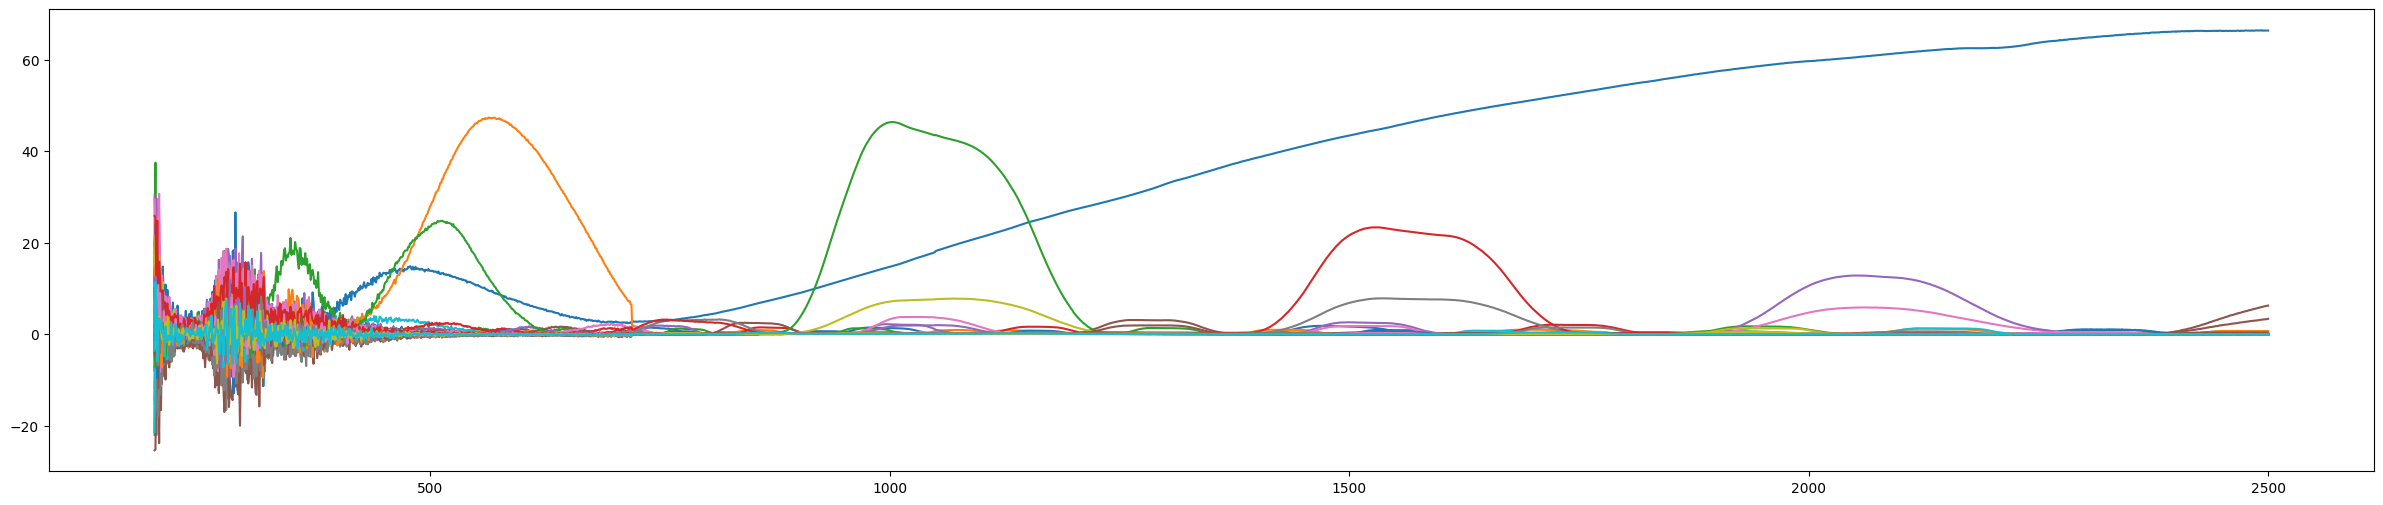

In [16]:
columns = df.columns
plt.figure(figsize=(30,6))
for i in range(0,len(columns),2):
    wave = pd.to_numeric(df[columns[i]], errors='coerce')
    wave = wave.dropna().astype(float)
    intensity = pd.to_numeric(df[columns[i+1]], errors='coerce')
    intensity = intensity.dropna().astype(float)
    plt.plot(wave, intensity)